In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pickle
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor

In [2]:
pd_cars = pd.read_csv('cars.csv')

# Amostragem simples (25%)

In [3]:
# Esta amostra sempre começa pelo index 456056
# Optei pela amostragem simples, extrai 25% do DataFrame, implementei uma semente para manter os mesmos dados
np.random.seed(1)
cars_amos = pd_cars.sample(frac=0.25)
cars_amos.head(1)

manufacturer                          model  year  mileage engine  \
456056   Land Rover  Range Rover Sport HSE Dynamic  2018  33585.0     V6   

       transmission        drivetrain fuel_type    mpg   exterior_color  \
456056    Automatic  Four-wheel Drive  Gasoline  17-23  Santorini Black   

       interior_color  accidents_or_damage  one_owner  personal_use_only  \
456056          Ebony                  0.0        1.0                0.0   

            seller_name  seller_rating  driver_rating  driver_reviews_num  \
456056  Schaumburg Ford            4.1            4.0                45.0   

        price_drop    price  
456056       500.0  53950.0

In [4]:
# Como no desafio, foram separados por volta de 190 mil registros
cars_amos.shape

(190523, 20)

In [5]:
# Para melhor eficiência na analise exploratória e tratamentos futuros, vou transformar todos os dados em letras minusculas
cars_amos = cars_amos.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

In [6]:
# Retirando registros duplicados do dataframe
cars_amos = cars_amos.drop_duplicates()

In [7]:
# Eliminamos alguns dados duplicados
cars_amos.shape

(189975, 20)

# Análise Exploratória

## Coluna 1 'manufacturer' (Fabricante)

Manufacturer (Variável Categórica Nominal)

In [8]:
# Variaveis Categóricas Nominal - Dados não mensuráveis e sem ordem específica
# Dados da coluna manufacturer normais
cars_amos.manufacturer.unique()

array(['land rover', 'nissan', 'toyota', 'mercedes-benz', 'gmc', 'bmw',
       'ford', 'jeep', 'chevrolet', 'honda', 'audi', 'chrysler', 'dodge',
       'kia', 'subaru', 'ram', 'cadillac', 'volkswagen', 'volvo', 'mazda',
       'lexus', 'porsche', 'jaguar', 'infiniti', 'mitsubishi', 'buick',
       'hyundai', 'lincoln', 'acura', 'tesla'], dtype=object)

In [9]:
# Nenhum erro de digitação
# Todos os fabricantes sem nenhuma repetição que precise mexer
# Dados normalizados 
cars_amos['manufacturer'].value_counts()

manufacturer
ford             19782
toyota           14858
chevrolet        13868
nissan           12092
jeep             10433
mercedes-benz    10130
honda             9386
bmw               9234
kia               8800
gmc               7300
dodge             6291
subaru            6147
volkswagen        6142
hyundai           5478
lexus             5265
ram               4929
audi              4463
cadillac          4451
mazda             3878
buick             3610
infiniti          3178
chrysler          3134
land rover        3043
porsche           2964
lincoln           2648
volvo             2533
acura             2078
mitsubishi        1492
tesla             1481
jaguar             887
Name: count, dtype: int64

In [10]:
# Analisando se há nomes repetidos na lista acima
manufacturers = [
    "ford", "toyota", "chevrolet", "nissan", "jeep", "mercedes-benz", 
    "honda", "bmw", "kia", "gmc", "dodge", "subaru", "volkswagen", 
    "hyundai", "lexus", "ram", "audi", "cadillac", "mazda", "buick", 
    "infiniti", "chrysler", "land rover", "porsche", "lincoln", "volvo", 
    "acura", "mitsubishi", "tesla", "jaguar"
]

if len(manufacturers) == len(set(manufacturers)):
    print("Não há nomes repetidos na lista.")
else:
    print("Há nomes repetidos na lista.")


Não há nomes repetidos na lista.


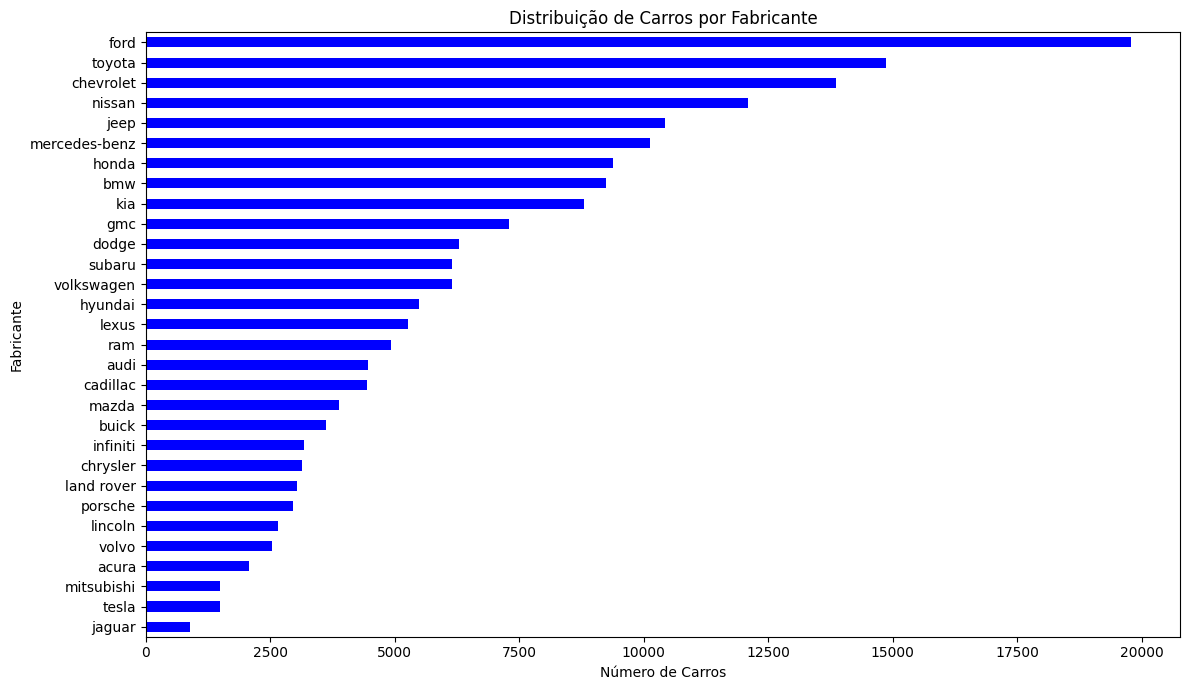

In [11]:
# Criando um dataframe para analisar a coluna manufacturer
manufacturer = cars_amos['manufacturer'].value_counts()

# Criando um DataFrame com as contagens
manufacturer_df = pd.DataFrame({'manufacturer': manufacturer.index, 'count': manufacturer.values})

# Construindo um gráfico de barras para melhor visualização dos fabricantes
plt.figure(figsize=(12, 7))
manufacturer.plot(kind='barh', color='blue')
plt.xlabel('Número de Carros')
plt.ylabel('Fabricante')
plt.title('Distribuição de Carros por Fabricante')
plt.gca().invert_yaxis()  # Inverter eixo y para exibir o fabricante com mais carros no topo
plt.tight_layout()
plt.show()

Podemos observar que o Fabricante Ford é o maior distribuidor de carros conforme esses dados, seguido da Toyota e Chevrolet. O menor distribuidor é o fabricante Jaguar, seguido do fabricante Tesla e Mitsubishi. Observa-se 30 fabricantes de veículos.

## Coluna 2 'model' (Modelo do Carro)

Model (Variável Categórica Nominal)

In [12]:
# Variavel Categórica Nominal - dados não mensuráveis e inespecificos
# Aparentemente, não existem modelos iguais escritos de forma diferente ou com algum erro de digitação
cars_amos.model.value_counts().head(60)

model
fusion se                    774
corolla le                   742
sportage lx                  689
sentra sv                    681
glc 300 base 4matic          656
optima lx                    644
explorer xlt                 632
sorento lx                   632
tundra sr5                   618
rx 350 base                  617
rogue sv                     615
renegade latitude            611
wrangler sport               597
odyssey ex-l                 595
edge sel                     587
forte lxs                    575
encore preferred             571
focus se                     565
f-150 xlt                    563
escape se                    536
highlander xle               519
tiguan 2.0t se               512
pacifica touring-l           500
grand caravan sxt            496
grand cherokee limited       491
frontier sv                  488
ranger xlt                   483
rav4 xle                     481
cx-5 touring                 475
wrangler unlimited sahara    475
tran

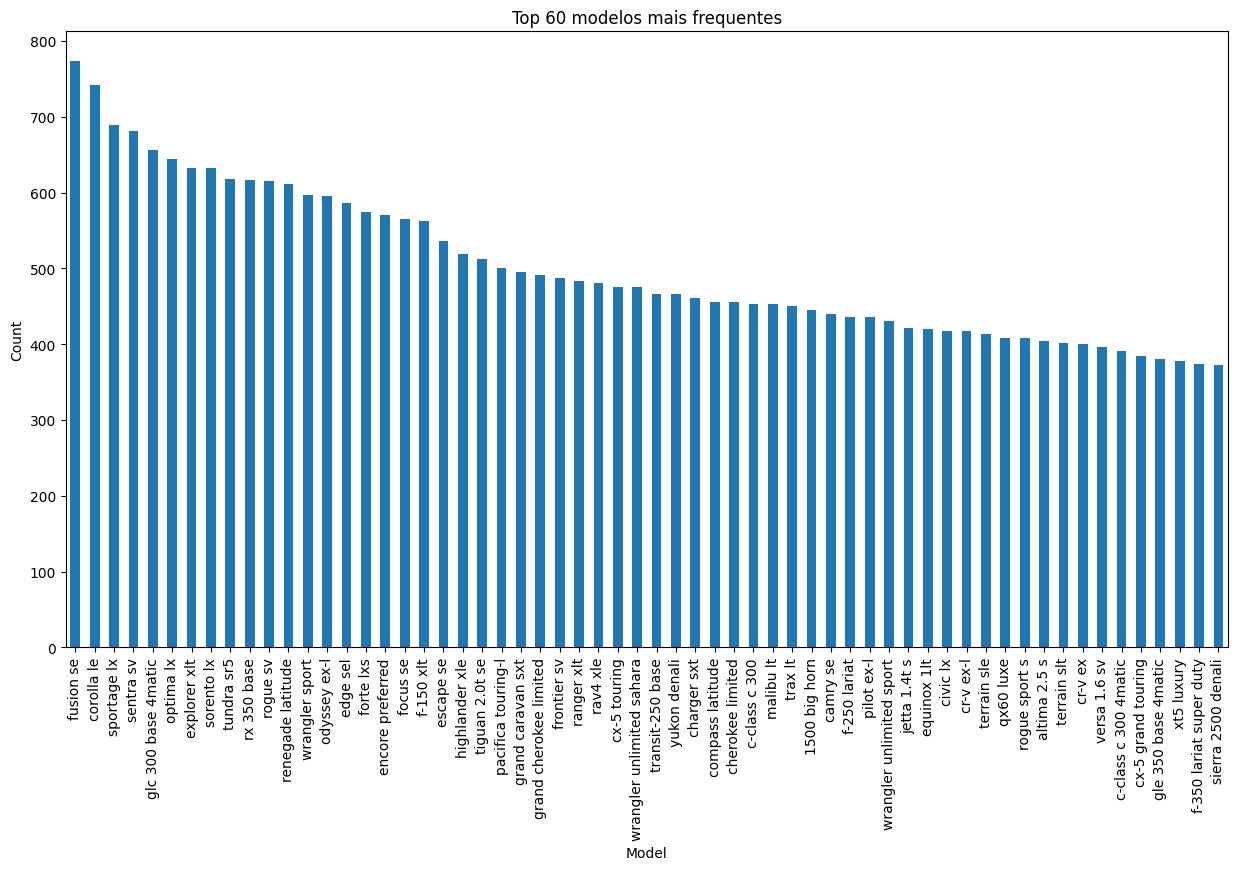

In [13]:
# Separando a coluna model para analise
model = cars_amos['model'].value_counts()

# Construindo um gráfico dos 60 modelos mais frequentes
plt.figure(figsize=(15, 8))
model.head(60).plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Top 60 modelos mais frequentes')
plt.show()


In [14]:
# Modelos com apenas um registro ou poucos registros
cars_amos['model'].value_counts().tail(7000)

model
pacifica hybrid touring l                               59
ats 2.0l turbo                                          58
glk-class glk 350                                       58
ridgeline black edition                                 58
rogue select s                                          58
                                                        ..
corolla hatchback up camera bluetooth compatible!        1
xj8 4dr sdn                                              1
santa fe sport sport                                     1
transit-250 t-250 148 med rf 9000 gvwr sliding rh dr     1
s-type 4.0                                               1
Name: count, Length: 7000, dtype: int64

In [15]:
# Usei o chatgpt para separar os modelos em categorias mais amplas, pois eram muitos modelos
# Com certeza, existe maneiras mais eficientes de categorização, tentei usar bibliotecas, mas não fui bem sucedido
# Aceito sugestões
# Transformei em categorias mais amplas para simplificar o modelo de regressão e não ter problemas futuramente
# Definir o mapeamento dos modelos para categorias amplas
model_mapping = {
    'electric': ['model 3', 'leaf', 'electric', 'bolt', 'i3', 'volt', 'taycan', 'model s', 'id.4', 'e-tron', 'ev6', 'supra'],
    'suv': [
        '4runner', 'acadia', 'ascent', 'atlas', 'bronco', 'cayenne', 'cherokee', 'compass', 'cr-v', 'cx-5',
        'durango', 'edge', 'enclave', 'envision', 'escape', 'explorer', 'forester', 'glc', 'gle', 'glk',
        'grand cherokee', 'highlander', 'journey', 'kona', 'nautilus', 'outback', 'pathfinder', 'pilot',
        'q5', 'qx60', 'qx80', 'rav4', 'renegade', 'rogue', 'santa fe', 'sorento', 'sportage', 'suburban',
        'tahoe', 'terrain', 'tiguan', 'traverse', 'trax', 'tucson', 'venza', 'wrangler', 'x1', 'x3', 'x5',
        'yukon', 'sportage', 'rogue', 'renegade', 'edge', 'grand cherokee', 'frontier', 'cherokee', 'compass',
        'trax', 'equinox', 'xt5', 'murano', 'expedition', 'gx', 'ecosport', 'blazer', 'bronco', 'kicks',
        'pathfinder', 'armada', 'hr-v', 'rogue', 'suburban', 'gla', 'sportage', 'rogue', 'renegade', 'edge',
        'grand cherokee', 'frontier', 'cherokee', 'compass', 'trax', 'equinox', 'xt5', 'murano', 'expedition',
        'gx', 'ecosport', 'blazer', 'bronco', 'kicks', 'pathfinder', 'armada', 'hr-v', 'rogue', 'suburban', 'gla',
        'taos', 'outlander', 'seltos',  'glb 250', 'cx-9', 'k5', 'xt6', 'leaf', 'ridgeline', 'xc40', 'q7', 'dart', 'cx-30'
        'xt4', 'rdx', 'sequoia', 'x2', 'q3', 'x6', 'insight', 'veloster', 'niro','xt4', 'f-pace', 'id.4', 'rc', 'lr4', 
        'cx-3', 'f-pace', 'e-tron', 'brz', 'juke', 'maverick', 'model x', 'x4', 'aviator', 'qx80', 'crosstour', 'xterra', 
        'eclipse', 'navigator', 'q8', 'q60', 'eclipse'
    ],
    'sedan': [
        'accord', 'altima', 'camry', 'charger', 'civic', 'corolla', 'elantra', 'es', 'fusion', 'impala', 'jetta',
        'malibu', 'mazda3', 'optima', 'passat', 'sentra', 'sonata', 'taurus', 'focus', 'cruze','encore', '300', 
        'mustang', 'soul', 'challenger', 'camaro', 'crosstrek', 'colorado', 'encore', '300', 'mustang', 'soul', 
        'challenger', 'camaro', 'crosstrek', 'colorado', 'maxima', 'corvette', 'mkz', 'avalon', 'c-hr', 'prius',
        'impreza', 'legacy', '330', '200', 'carrera', 'cts', 'mx-5', '911', 'fit', 'shelby', '228', 'corsair', 'sedona', 'dart'
        '530', '750', 'm4', 'gs', '430', 'tlx', 'g37x', '335', '320', '740', '530', '528', 'm5', 'lc', 'ilx', 'avenger', '428'
        'ats', 'boxster', 'verano', 'tl', 'cadenza', 'sl'
    ],
    'truck': [
        '1500', '2500', '3500', 'canyon', 'colorado', 'f-150', 'f-250', 'f-350', 'gladiator', 'ranger',
        'sierra', 'silverado', 'tacoma', 'titan', 'tundra','frontier', 'ridgeline', 'town & country', 'sedona', 'flex', 'maverick',
        'f-450'
    ],
    'luxury': [
        'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'cla', 'cls', 'e-class', 'es', 'g-class', 'gls', 'is', 'ls',
        'macan', 'panamera', 'qx50', 'qx80', 'rx', 's-class', 's4', 's5', 's6', 's7', 's8', 'x3', 'x5', 'x7',
        'xt5', 'mustang', 'gla', 'model y', 'range rover', 'xc60', 'xc90', 'telluride', 'amg', 'xts', 'xt4', 
        'lc', 'm5', 'stinger', 'model s', 'rc', 'm550', 'lc', 'e-tron', 'mkx', 'm850', 'rs', 'm340', 'ct6', 's3',
        'q60', 'boxster', 'q8', 'z4', 'sl', 'gt-r', 'supra', 'navigator', 'q60', 'eclipse', '370z'
    ],
    'van/minivan': [
        'caravan', 'express', 'nv', 'odyssey', 'pacifica', 'promaster', 'sienna', 'sprinter', 'transit',
        'voyager', 'passport', 'utility', 'c-max'
    ],
    'compact': [
        'fiesta', 'focus', 'forte', 'golf', 'mazda3', 'rio', 'sonic', 'spark', 'versa', 'yaris', 'glb 250', 'q7', 'cx-30', 'fit', 'dart'
         'veloster', 'niro', 'beetle', 'brz', 'juke', 'c-max', 'accent', 'verano', 'mks', 'ct5', 'cascada', 'tl', 'boxster', 'q60', 'z4',
        '370z', 'eclipse'
    ]
}

# Função para categorizar modelos com base no mapeamento
def categorize_model(model):
    model = model.lower()
    for category, models in model_mapping.items():
        if any(keyword in model for keyword in models):
            return category
    return 'others'
    
# Aplicar a função de categorização
cars_amos['model'] = cars_amos['model'].apply(categorize_model)

In [16]:
# Agora temos menos modelos de veiculos
cars_amos.model.value_counts().head(8)

model
suv            80708
sedan          53469
luxury         17797
truck          17102
others          7581
van/minivan     6999
compact         3503
electric        2816
Name: count, dtype: int64

## Coluna 3 'year' (Ano de Produção)

Year (Variável Numérica Discreta)

In [17]:
# Variavel Numérica Discreta - Valores inteiros
# Veículos antigos, são carros de coleção? É possível prever valores para estes veículos?
np.sort(cars_amos['year'].unique())

array([1923, 1926, 1928, 1929, 1930, 1931, 1932, 1937, 1939, 1940, 1941,
       1942, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int64)

In [18]:
# A maior quantidade de dados são encontrados após ano 2000
# HIPÓTESE 1 - Analisar a previsão de veículos por um período, pois veículos antigos são artigos de colecionadores
cars_amos[cars_amos['year'] <= 2000].shape, cars_amos[cars_amos['year'] >= 2000].shape

((1588, 20), (188577, 20))

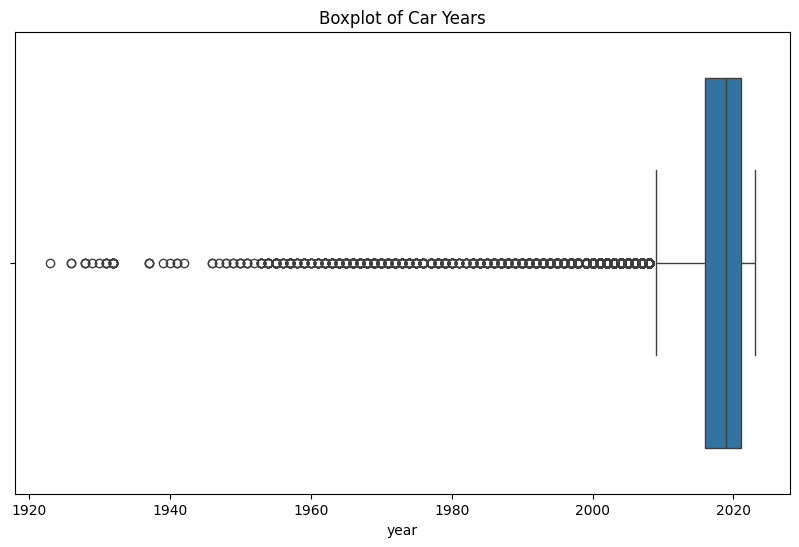

In [19]:
# Maior parte dos dados estão nos ultimos anos
# Criação do gráfico de caixa
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', data=cars_amos)
plt.title('Boxplot of Car Years')
plt.show()

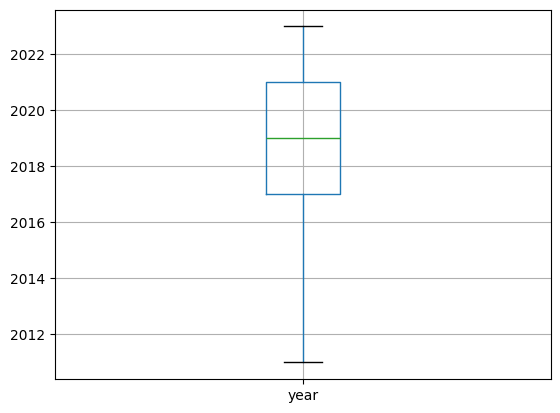

In [20]:
# Filtrando os dados a partir de 2011, sem outiliers
# Maior quantidade de dados surgem a partir de 2011
# Posso utilizar este período para previsão?
cars_amos[cars_amos['year'] >= 2011].boxplot(column=['year'])
plt.show()

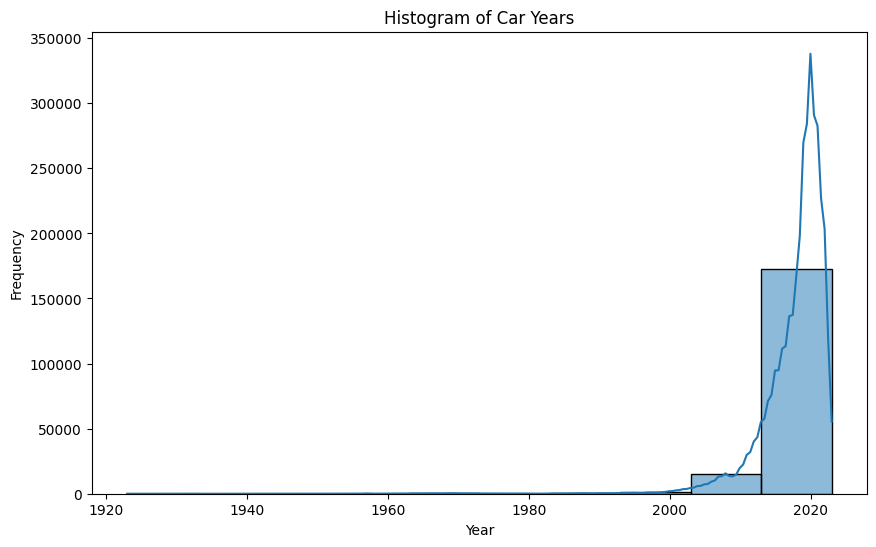

In [21]:
# Histograma confirma os dados acima
# Criação do histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=cars_amos, x='year', bins=10, kde=True)
plt.title('Histogram of Car Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Podemos observar veículos antigos que possivelmente são artigos de colecionador ou que estão fora de circulação
# Esses veículos (outliears) poderão prejudicar a regressão
cars_menor_2011 = cars_amos[cars_amos['year'] < 2011]
cars_menor_2011.year.value_counts().tail(50)

year
1968    27
1979    26
1971    26
1967    26
1978    26
1986    25
1957    24
1965    24
1989    21
1976    20
1964    20
1983    20
1955    18
1985    17
1973    17
1974    17
1977    16
1984    16
1963    14
1975    14
1980    12
1962    11
1932    10
1954    10
1959     9
1961     8
1982     7
1956     6
1958     6
1953     6
1981     5
1960     5
1931     4
1951     3
1937     3
1950     3
1928     3
1926     2
1948     2
1946     2
1949     2
1941     2
1942     1
1947     1
1952     1
1929     1
1930     1
1939     1
1940     1
1923     1
Name: count, dtype: int64

In [23]:
# Descrição desses veículos
cars_amos[cars_amos['year'] <=2011]

manufacturer   model  year   mileage  \
103334      chevrolet   sedan  2010   51536.0   
169845          dodge   truck  2007  200291.0   
544244  mercedes-benz  luxury  2007   92363.0   
100226      chevrolet   sedan  2007   58113.0   
577779         nissan     suv  2009  131737.0   
...               ...     ...   ...       ...   
728550     volkswagen   sedan  2006   80585.0   
616002        porsche   sedan  1996   73763.0   
103737      chevrolet   sedan  2011   82291.0   
687872         toyota     suv  2002  208085.0   
215668           ford   truck  2007  104460.0   

                                                   engine       transmission  \
103334                               6.2l v8 16v mpfi ohv     6-speed manual   
169845                               5.7l v8 16v mpfi ohv          automatic   
544244                              5.0l v8 24v mpfi sohc  7-speed automatic   
100226                               6.0l v8 16v mpfi ohv  6-speed automatic   
577779                              2.5l i4 16v mpfi dohc      automatic cvt   
...                                                   ...                ...   
728550                              2.5l i5 20v mpfi dohc     5-speed manual   
616002                         3.6l h-6 engine with 282hp      manual, 6-spd   
103737  3.6l v-6 gasoline direct injection, dohc, vari...          automatic   
687872                              4.7l v8 32v mpfi dohc  4-speed automatic   
215668            5.4l sohc 24-valve efi triton v8 engine          automatic   

               drivetrain fuel_type    mpg       exterior_color  \
103334   rear-wheel drive  gasoline    NaN                black   
169845   four-wheel drive  gasoline    NaN                white   
544244    all-wheel drive  gasoline  14-19                black   
100226   rear-wheel drive  gasoline    NaN         arctic white   
577779    all-wheel drive  gasoline  21-26           silver ice   
...                   ...       ...    ...                  ...   
728550  front-wheel drive  gasoline  22-30                 blue   
616002    all-wheel drive  gasoline  15-21     grand prix white   
103737   rear-wheel drive  gasoline  18-30                black   
687872   four-wheel drive  gasoline  14-17  silver sky metallic   
215668   four-wheel drive  gasoline    0-0         oxford white   

           interior_color  accidents_or_damage  one_owner  personal_use_only  \
103334                red                  0.0        0.0                1.0   
169845                NaN                  1.0        0.0                0.0   
544244                NaN                  1.0        0.0                0.0   
100226              ebony                  0.0        0.0                1.0   
577779               gray                  0.0        0.0                1.0   
...                   ...                  ...        ...                ...   
728550               gray                  0.0        0.0                1.0   
616002  marble grey/black                  0.0        0.0                1.0   
103737              black                  1.0        0.0                0.0   
687872                tan                  0.0        0.0                1.0   
215668         dark flint                  NaN        NaN                NaN   

                                       seller_name  seller_rating  \
103334                                  lkl motors            3.0   
169845                            hubler chevrolet            4.7   
544244  integrity chicago auto repair express inc.            NaN   
100226                           defouw automotive            4.8   
577779                       greg's automotive llc            NaN   
...                                            ...            ...   
728550                     texas giants automotive            NaN   
616002                        amador motorcars llc            NaN   
103737                            dream auto group            NaN   
687

In [24]:
# Notamos que a maior parte dos registros estão entre 2011 a 2023
cars_maior_2011 = cars_amos[cars_amos['year'] >= 2011]
cars_maior_2011.year.value_counts(ascending=False)

year
2020    33384
2021    27168
2019    26292
2022    20091
2018    15619
2017    13153
2016    10687
2015     9223
2014     6853
2013     5352
2023     4588
2012     3875
2011     2922
Name: count, dtype: int64

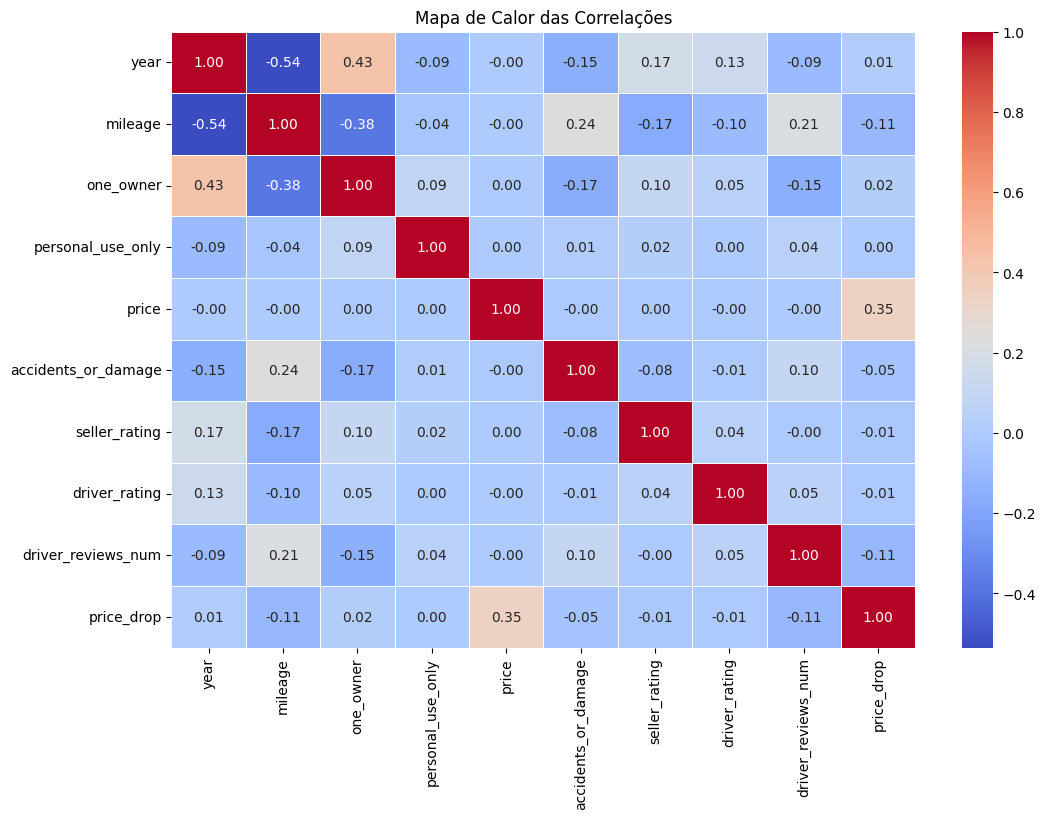

In [25]:
# Correlação entre a coluna Year e Mileage possuem uma correlação negativa moderada
# Carros mais novos tendem a ter menor quilometragem, o que faz sentido, pois carros mais antigos tiveram mais tempo para acumular mais quilômetros.
# Correlação entre a coluna Year e One Ower possuem uma correlação positiva moderada
# Existe uma correlação positiva moderada entre o ano do carro e se ele teve apenas um proprietário.
# Carros mais novos são mais propensos a terem tido apenas um proprietário


# Calcular a matriz de correlação
correlation_matrix = cars_amos[['year', 'mileage', 'one_owner', 'personal_use_only',
                                'price', 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop']].corr()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das Correlações')
plt.show()

In [26]:
# Eliminando todos os registros menores que o ano de 2011, continuamos com a maioria dos dados do dataframe 
cars_maior_2011.shape, cars_amos.shape

((179207, 20), (189975, 20))

In [27]:
# Eliminação dos registros cujo o ano é inferior a 2011
# Motivo 1 - Esses registros causam outliears
# Motivo 2 - Outliears podem prejudicar minha regressão, distorcendo, causando imprecisão, variações, etc.
# Motivo 3 - Continuo com a maior parte dos registros, mesmo eliminando os outliears
# Motivo 4 - Variedade de condições: Carros mais antigos podem variar muito em termos de condição, manutenção e desgaste.
# Motivo 5 - Menor disponibilidade de dados: Para carros mais antigos, pode haver menos dados disponíveis, o que dificulta a construção da previsão
# Motivo 6 - Tendências de mercado específicas, influência por tendências específicas de colecionadores, eventos históricos e mudanças na demanda
cars_amos1 = cars_amos[cars_amos['year'] >= 2011]

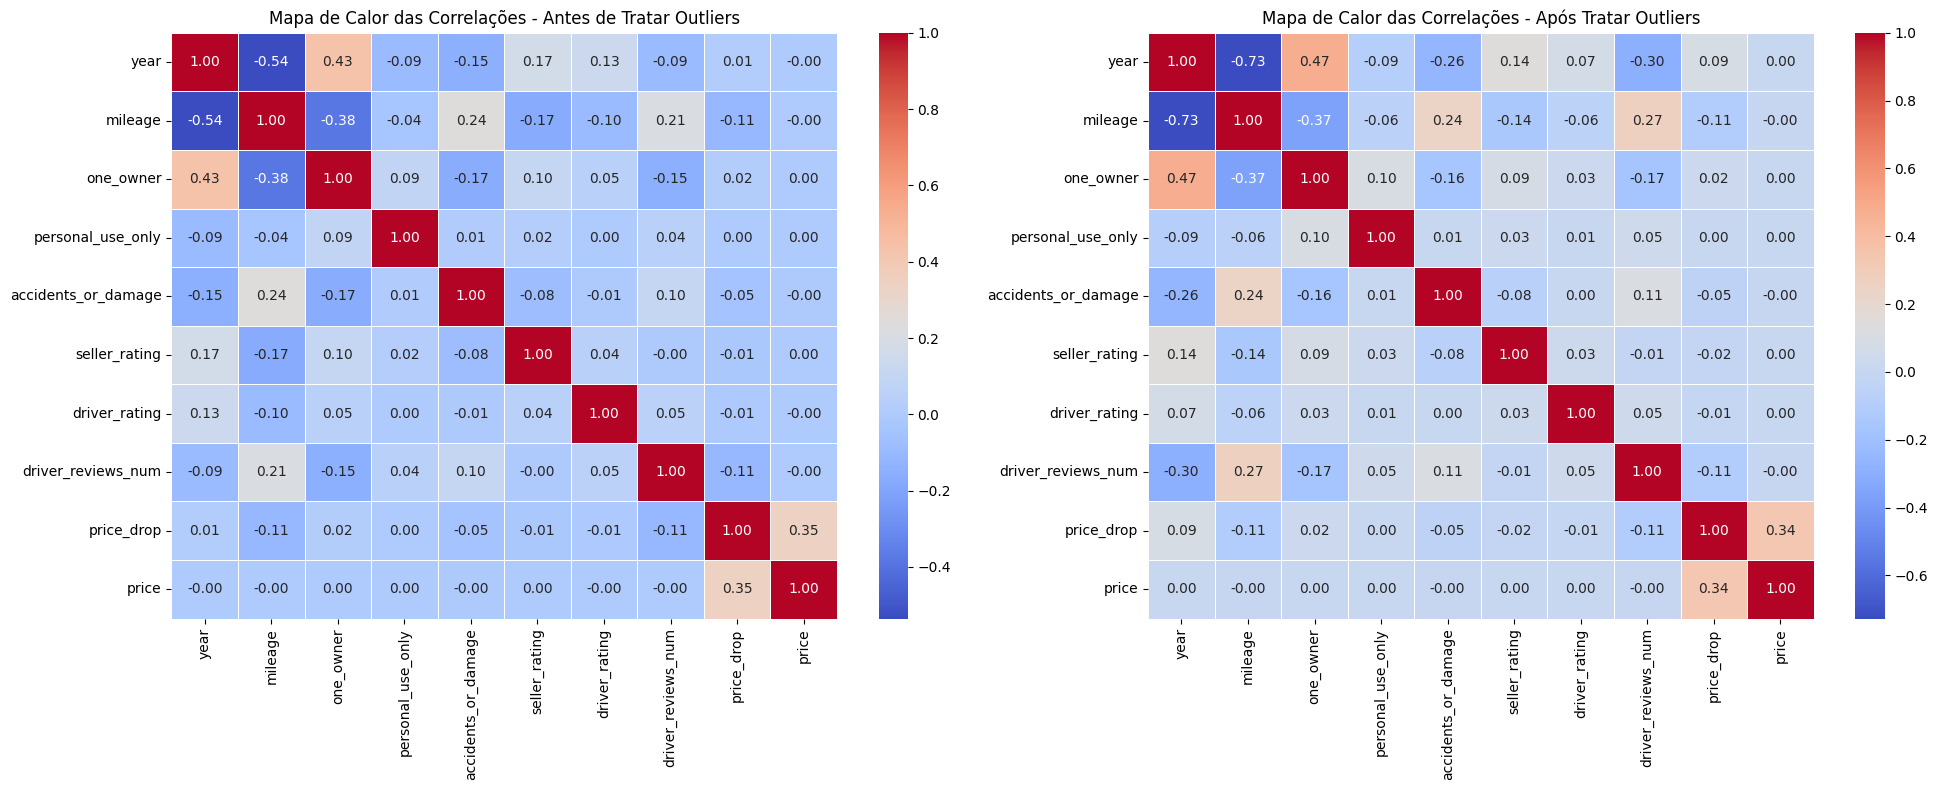

In [28]:
# Análise da Variavel 'year' antes e depois da exclusão (Correlação de Pearson)
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = cars_amos[['year', 'mileage', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = cars_amos1[['year', 'mileage', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Outliers')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Outliers')

plt.tight_layout()
plt.show()

 Conclusão sobre a correlação entre a variável 'year' e outras variáveis no conjunto de dados:

1. A correlação negativa forte entre 'year' e 'mileage' (-0.727) indica que carros mais novos tendem a ter menor quilometragem. Este é o fator mais influente relacionado à idade do carro.

2. A correlação positiva moderada entre 'year' e 'one_owner' (0.474) sugere que carros mais novos são mais propensos a terem tido apenas um proprietário. Isso pode indicar uma manutenção mais cuidadosa e menos transferências de propriedade.

3. A correlação negativa fraca a moderada entre 'year' e 'accidents_or_damage' (-0.261) indica que carros mais novos têm um histórico ligeiramente menor de acidentes ou danos.

4. A correlação negativa fraca a moderada entre 'year' e 'driver_reviews_num' (-0.300) sugere que carros mais novos tendem a ter menos avaliações de motoristas. 

5. A correlação positiva fraca entre 'year' e 'seller_rating' (0.144) indica que carros mais novos tendem a ser vendidos por vendedores com classificações ligeiramente melhores.

Em geral, a idade do carro está mais fortemente relacionada com a quilometragem e o número de proprietários.

## Coluna 4 'mileage' (Número de Milhas Percorridas)¶

Mileage (Variável Numérica Contínua)

In [29]:
# Variavel Numérica Continua - Dados float 
cars_amos1['mileage'].dtype

dtype('float64')

In [30]:
cars_amos1.mileage.unique()

array([ 33585.,  63009.,  51316., ..., 107328.,  64580., 181953.])

In [31]:
# Dados inconcistentes
# Carro com alta km
# Carros 0 km podem ser ausencia de dados
cars_amos1.mileage.describe()

count    179116.000000
mean      51939.377130
std       39108.544849
min           0.000000
25%       22289.750000
50%       43236.000000
75%       73202.250000
max      754680.000000
Name: mileage, dtype: float64

In [32]:
# Alguns valores nulos
# O quanto afeta as análises?
cars_amos1['mileage'].isnull().value_counts()

mileage
False    179116
True         91
Name: count, dtype: int64

In [33]:
# Veículos com km alto
# Dados inconsistentes?
cars_amos1[cars_amos1['mileage'] >= 300000].shape

(41, 20)

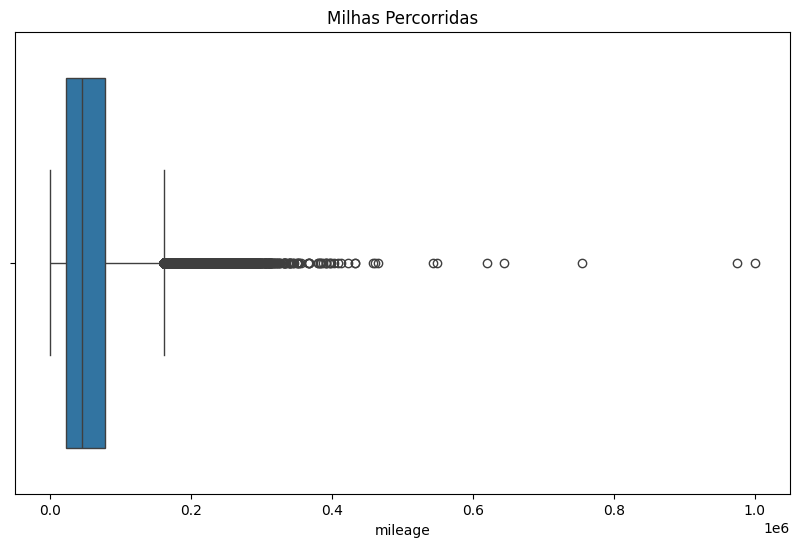

In [34]:
# Outliears em grande quantidade
# Criação do gráfico de caixa
plt.figure(figsize=(10, 6))
sns.boxplot(x='mileage', data=cars_amos)
plt.title('Milhas Percorridas')
plt.show()

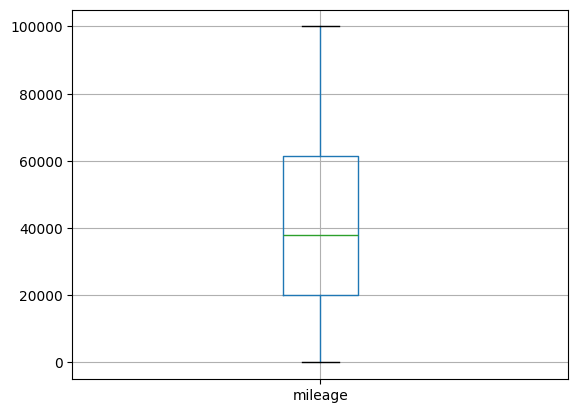

In [35]:
# Para não ter outiliers seria necessário remover dados com km acima de 100 mil
cars_amos1[cars_amos1['mileage'] <= 100000].boxplot(column=['mileage'])
plt.show()

In [36]:
# 17 mil registros que causam outliears, não posso exclui-los
cars_maior_100km = cars_amos1[cars_amos1['mileage'] > 100000]
cars_maior_100km.mileage.value_counts().shape

(17636,)

In [37]:
# Alguns valores nulos
# O quanto afeta as análises?
cars_amos1['mileage'].isnull().value_counts()

mileage
False    179116
True         91
Name: count, dtype: int64

In [38]:
# Veículos com km alto
# Dados inconsistentes?
cars_amos1[cars_amos1['mileage'] >= 300000].shape

(41, 20)

### Tratando dados nulos e zeros (mileage)

In [39]:
# Analisando os valores 0 da coluna mileage e relacionando-os com a coluna ano
# Fazer isso me ajudará a analisar se são dados reais (Dificilmente existe um carro 0km com ano mais antigo)
years = cars_amos1[cars_amos1['mileage'] == 0]
years_mileage = years[['year', 'mileage']]

In [40]:
# Podemos ver que todos esses veículos possivelmente são inconsistentes devio ao seu ano
years_mileage.value_counts()

year  mileage
2023  0.0        42
2022  0.0        39
2021  0.0        33
2020  0.0        24
2019  0.0        16
2018  0.0        14
2017  0.0        11
2015  0.0        10
2011  0.0         9
2013  0.0         9
2012  0.0         8
2014  0.0         8
2016  0.0         6
Name: count, dtype: int64

In [41]:
# Temos 229 registros no valor 0
cars_amos1[cars_amos1['mileage'] == 0].shape

(229, 20)

In [42]:
# Alterando esses registros para valores nulos, pois valores 0 podem afetar os dados ao substitui-los
# Substituir os valores zero por NaN
cars_amos1.loc[cars_amos1['mileage'] == 0, 'mileage'] = np.nan

In [43]:
# Temos atualmente 320 regsistros nulos
cars_amos1.mileage.isnull().sum()

320

In [44]:
# Calculando a mediana da coluna "mileage"
# Optei usar mediana por não ser influenciada pelos outliears
mediana_mileage = cars_amos1['mileage'].median()

# Substituindo valores nulos pela mediana 
cars_amos1.loc[:, 'mileage'] = cars_amos1['mileage'].fillna(mediana_mileage)

In [45]:
# Não mais valores nulos, porem, temos outliears em valores extremos
cars_amos1.mileage.describe()

count    179207.000000
mean      51990.315747
std       39056.178976
min           1.000000
25%       22402.000000
50%       43297.000000
75%       73182.000000
max      754680.000000
Name: mileage, dtype: float64

### Outliears (mileage)

In [46]:
# Como vimos na analise da coluna anteriormente, existem mais de 21 mil registros que causam outliears
cars_amos1[cars_amos1['mileage'] > 100000].shape

(21334, 20)

In [47]:
cars_amos1.mileage.describe()

count    179207.000000
mean      51990.315747
std       39056.178976
min           1.000000
25%       22402.000000
50%       43297.000000
75%       73182.000000
max      754680.000000
Name: mileage, dtype: float64

In [48]:
# Digamos que os valores abaixo de 1000 fazem sentido para os carros mais novos referentes ao ano de 2023 
# E o ano de 2022 ou antes, faz sentido?
cars_amos1[cars_amos1['mileage'] <= 1000].shape

(2723, 20)

In [49]:
# Vamos criar um dataframe com valores na coluna mileage menores que 1000
mileage = cars_amos1[cars_amos1['mileage'] <= 1000]

In [50]:
mileage[mileage['year'] <=2022]

manufacturer     model  year  mileage  \
231570         ford       suv  2022    867.0   
590376       nissan     sedan  2022    399.0   
500891        mazda       suv  2021    975.0   
589704       nissan       suv  2022     14.0   
746742   volkswagen  electric  2022    168.0   
...             ...       ...   ...      ...   
8542           audi  electric  2022    818.0   
188221        dodge       suv  2022    136.0   
250064         ford     truck  2022     86.0   
632096          ram     truck  2022    255.0   
173293        dodge     sedan  2022    614.0   

                                   engine        transmission  \
231570         2.0l i4 16v gdi dohc turbo           automatic   
590376              2.0l i4 16v mpfi dohc       automatic cvt   
500891         2.5l i4 16v gdi dohc turbo   6-speed automatic   
589704              1.6l i4 16v mpfi dohc       automatic cvt   
746742                           electric   1-speed automatic   
...                                   ...                 ...   
8542                                  NaN              manual   
188221               6.4l v8 16v mpfi ohv   8-speed automatic   
250064   6.7l v8 32v ddi ohv turbo diesel  10-speed automatic   
632096               6.4l v8 16v mpfi ohv   8-speed automatic   
173293  6.2l v8 16v mpfi ohv supercharged   8-speed automatic   

               drivetrain fuel_type    mpg             exterior_color  \
231570    all-wheel drive  gasoline    NaN                    area 51   
590376  front-wheel drive  gasoline  29-39               gun metallic   
500891    all-wheel drive  gasoline  22-30  soul red crystal metallic   
589704  front-wheel drive  gasoline  31-36               gun metallic   
746742   rear-wheel drive  electric    NaN             moonstone gray   
...                   ...       ...    ...                        ...   
8542      all-wheel drive  electric    NaN      mythos black metallic   
188221    all-wheel drive  gasoline  13-19         db black clearcoat   
250064   four-wheel drive    diesel    NaN   carbonized gray metallic   
632096   four-wheel drive  gasoline    NaN     bright white clearcoat   
173293   rear-wheel drive  gasoline  13-22                 smoke show   

             interior_color  accidents_or_damage  one_owner  \
231570               desert                  0.0        1.0   
590376                 gray                  0.0        NaN   
500891                white                  0.0        1.0   
589704                  NaN                  0.0        1.0   
746742         galaxy black                  0.0        1.0   
...                     ...                  ...        ...   
8542                    NaN                  0.0        1.0   
188221                black                  0.0        1.0   
250064           black onyx                  0.0        1.0   
632096  diesel gray / black                  1.0        1.0   
173293                black                  0.0        1.0   

        personal_use_only                                      seller_name  \
231570                0.0                               james collins ford   
590376                1.0                               hayward mitsubishi   
500891                1.0                                  jeff haas mazda   
589704                0.0                         carvision of maple shade   
746742                1.0                                irvine alfa romeo   
...                   ...                                              ...   
8542                  1.0                                 bosco auto group   
188221                1.0                                 dan deery motors   
250064                1.0                                     huntley ford   
632096                0.0                    pacific auto center - fontana   
173293                1.0  tom o'brien chrysler jeep dodge ram - greenwood   

        seller_rating  driver_rating  driver_reviews_num  price_drop     price

#### Testes Coluna Mileage

##### Análise Transformação Logarítmica (mileage)

Vamos testar a transformação logaritmica na variavel 'mileage' para analisar como os registros vão reagir

In [51]:
# Criar um novo DataFrame chamado mileage_log
mileage_log = cars_amos1.copy()

# Calcular a transformação logarítmica da coluna 'mileage'
mileage_log['mileage'] = np.log(mileage_log['mileage'] + 1)  # Adicionar 1 para evitar log(0)

In [52]:
mileage_log.mileage.describe()

count    179207.000000
mean         10.455222
std           1.174201
min           0.693147
25%          10.016950
50%          10.675862
75%          11.200718
max          13.534050
Name: mileage, dtype: float64

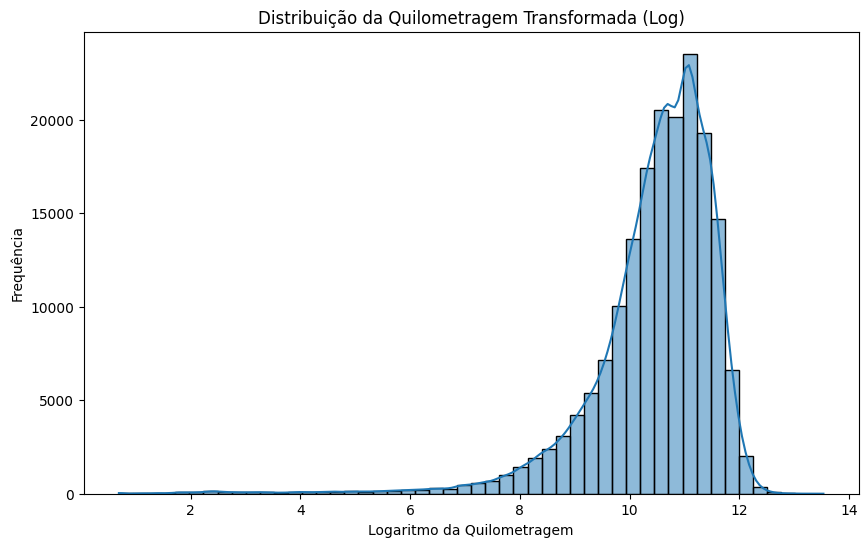

In [53]:
# Histograma da coluna transformada
plt.figure(figsize=(10, 6))
sns.histplot(mileage_log['mileage'], bins=50, kde=True)
plt.xlabel('Logaritmo da Quilometragem')
plt.ylabel('Frequência')
plt.title('Distribuição da Quilometragem Transformada (Log)')
plt.show()

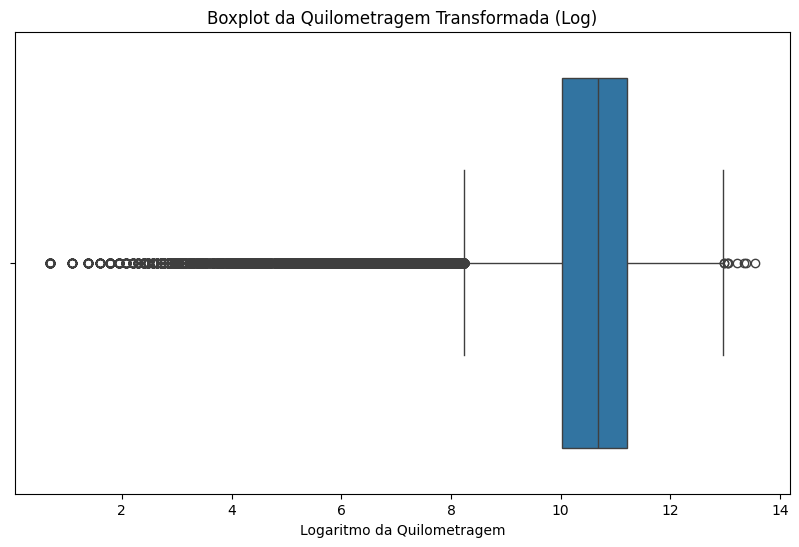

In [54]:
# Boxplot da coluna transformada
plt.figure(figsize=(10, 6))
sns.boxplot(x=mileage_log['mileage'])
plt.xlabel('Logaritmo da Quilometragem')
plt.title('Boxplot da Quilometragem Transformada (Log)')
plt.show()


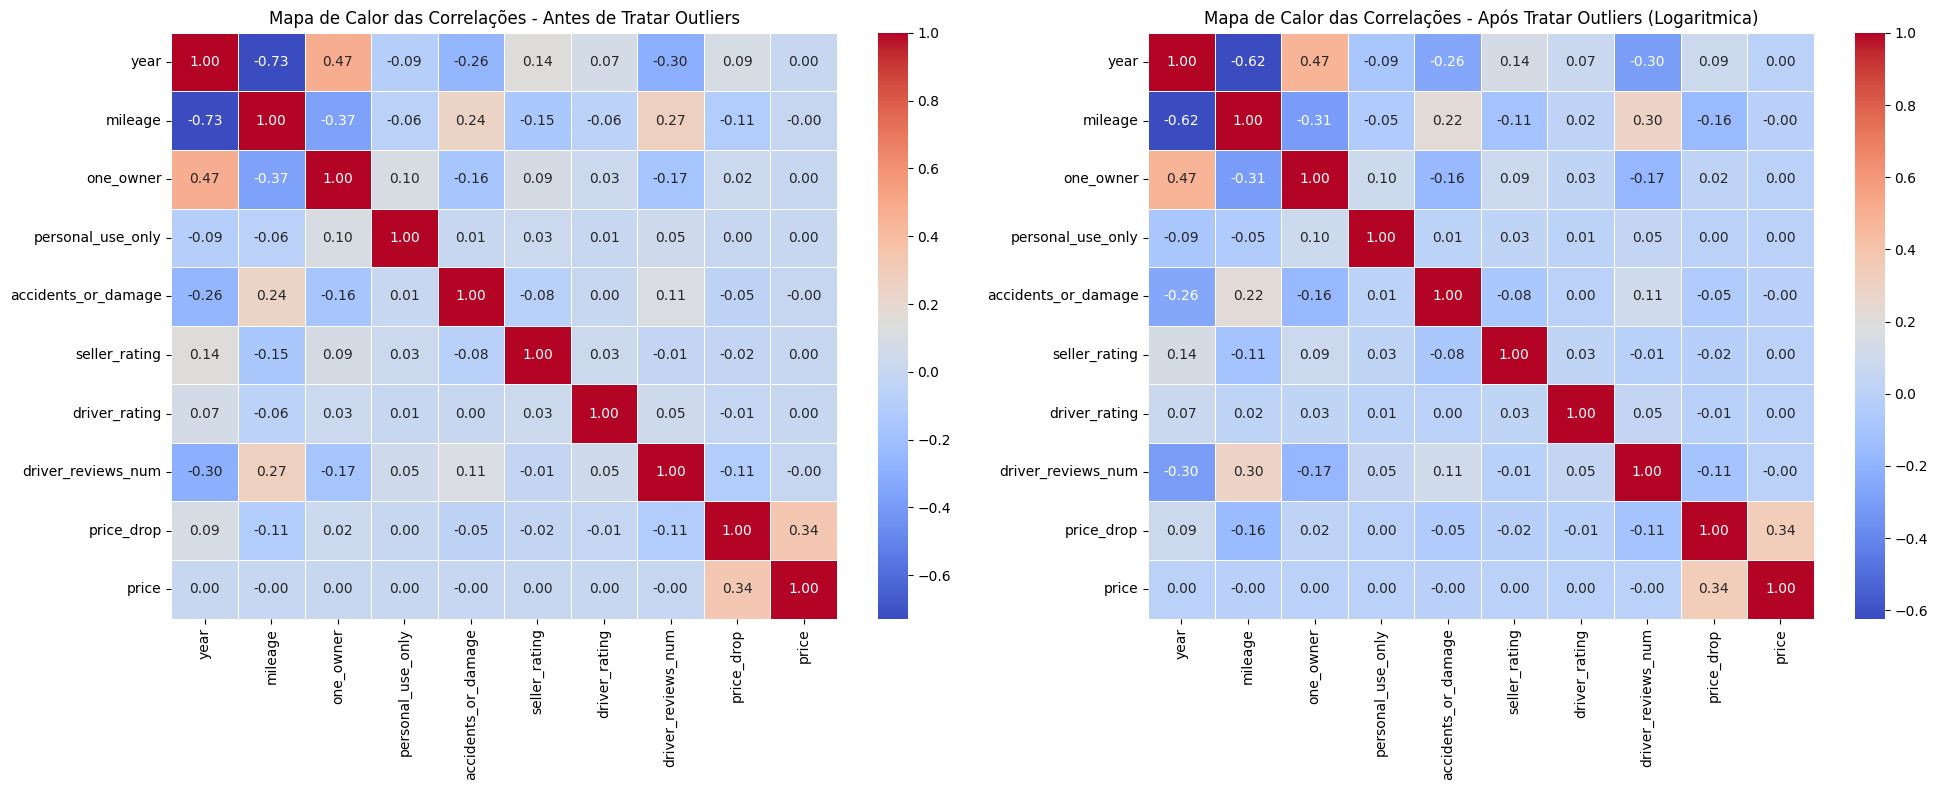

In [55]:
# Usando o Tratamento Logaritmico eu tive uma queda na correlação entre as demais variaveis
# Vamos abordar outro método
correlation_matrix_before = cars_amos1[['year', 'mileage', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = mileage_log[['year', 'mileage', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Outliers')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Outliers (Logaritmica)')
plt.tight_layout()
plt.show()

##### Análise Tratamento Percentil (mileage)

In [56]:
mileage_percentil = cars_amos1.copy()

In [57]:
mileage_percentil.mileage.describe()

count    179207.000000
mean      51990.315747
std       39056.178976
min           1.000000
25%       22402.000000
50%       43297.000000
75%       73182.000000
max      754680.000000
Name: mileage, dtype: float64

In [58]:
# Definindo os percentis 
lower_percentile = 5
upper_percentile = 95

# Cálculo doa valores de corte
lower_cutoff = np.percentile(mileage_percentil['mileage'], lower_percentile)
upper_cutoff = np.percentile(mileage_percentil['mileage'], upper_percentile)

# Substituindo valores extremos 
mileage_percentil['mileage'] = np.where(mileage_percentil['mileage'] < lower_cutoff, lower_cutoff, cars_amos1['mileage'])
mileage_percentil['mileage'] = np.where(mileage_percentil['mileage'] > upper_cutoff, upper_cutoff, cars_amos1['mileage'])


In [59]:
# Tivemos dados excluidos
mileage_percentil.shape

(179207, 20)

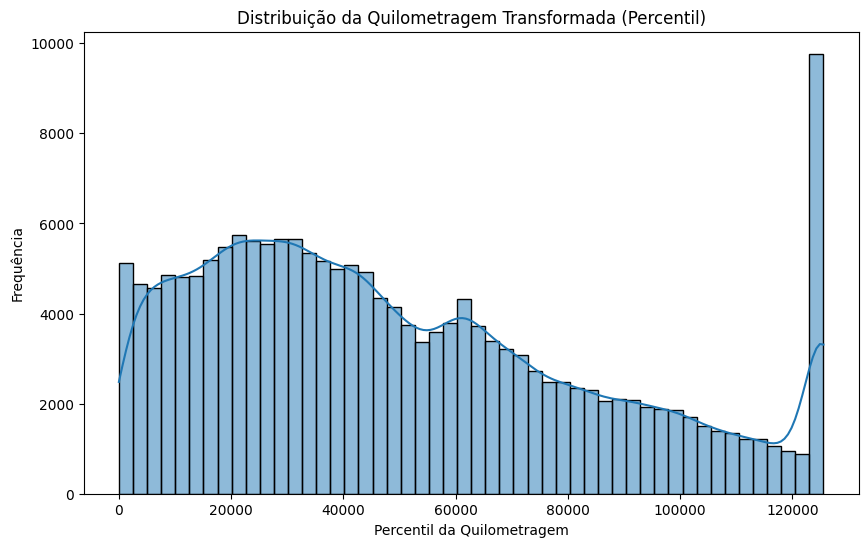

In [60]:
# Ainda não temos dados normalizados
# Valores minimos ainda atrapalham
# Histograma da coluna transformada
plt.figure(figsize=(10, 6))
sns.histplot(mileage_percentil['mileage'], bins=50, kde=True)
plt.xlabel('Percentil da Quilometragem')
plt.ylabel('Frequência')
plt.title('Distribuição da Quilometragem Transformada (Percentil)')
plt.show()

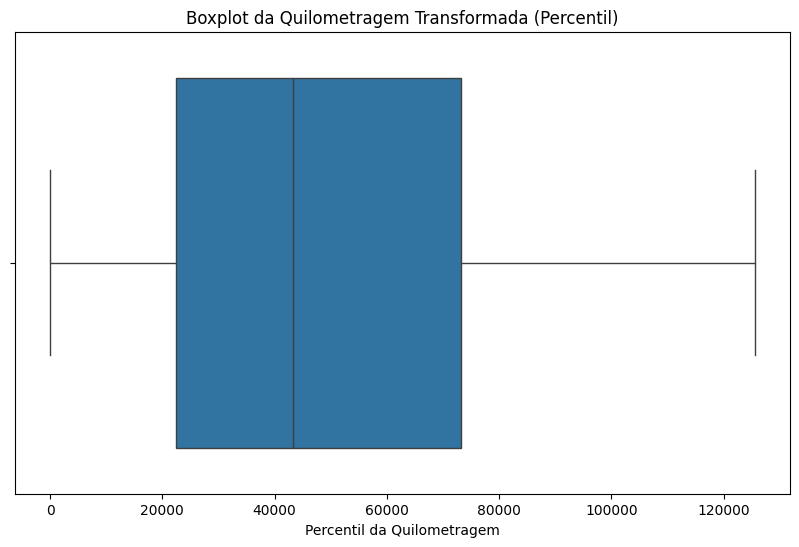

In [61]:
# Sem outilears
# Boxplot da coluna transformada
plt.figure(figsize=(10, 6))
sns.boxplot(x=mileage_percentil['mileage'])
plt.xlabel('Percentil da Quilometragem')
plt.title('Boxplot da Quilometragem Transformada (Percentil)')
plt.show()

In [62]:
# Valor 1 continuam 
mileage_percentil.mileage.describe()

count    179207.000000
mean      50550.883470
std       34916.262005
min           1.000000
25%       22402.000000
50%       43297.000000
75%       73182.000000
max      125520.000000
Name: mileage, dtype: float64

In [63]:
# Valores inconsistentes
mileage_percentil[mileage_percentil['mileage'] <= 1000].shape

(2723, 20)

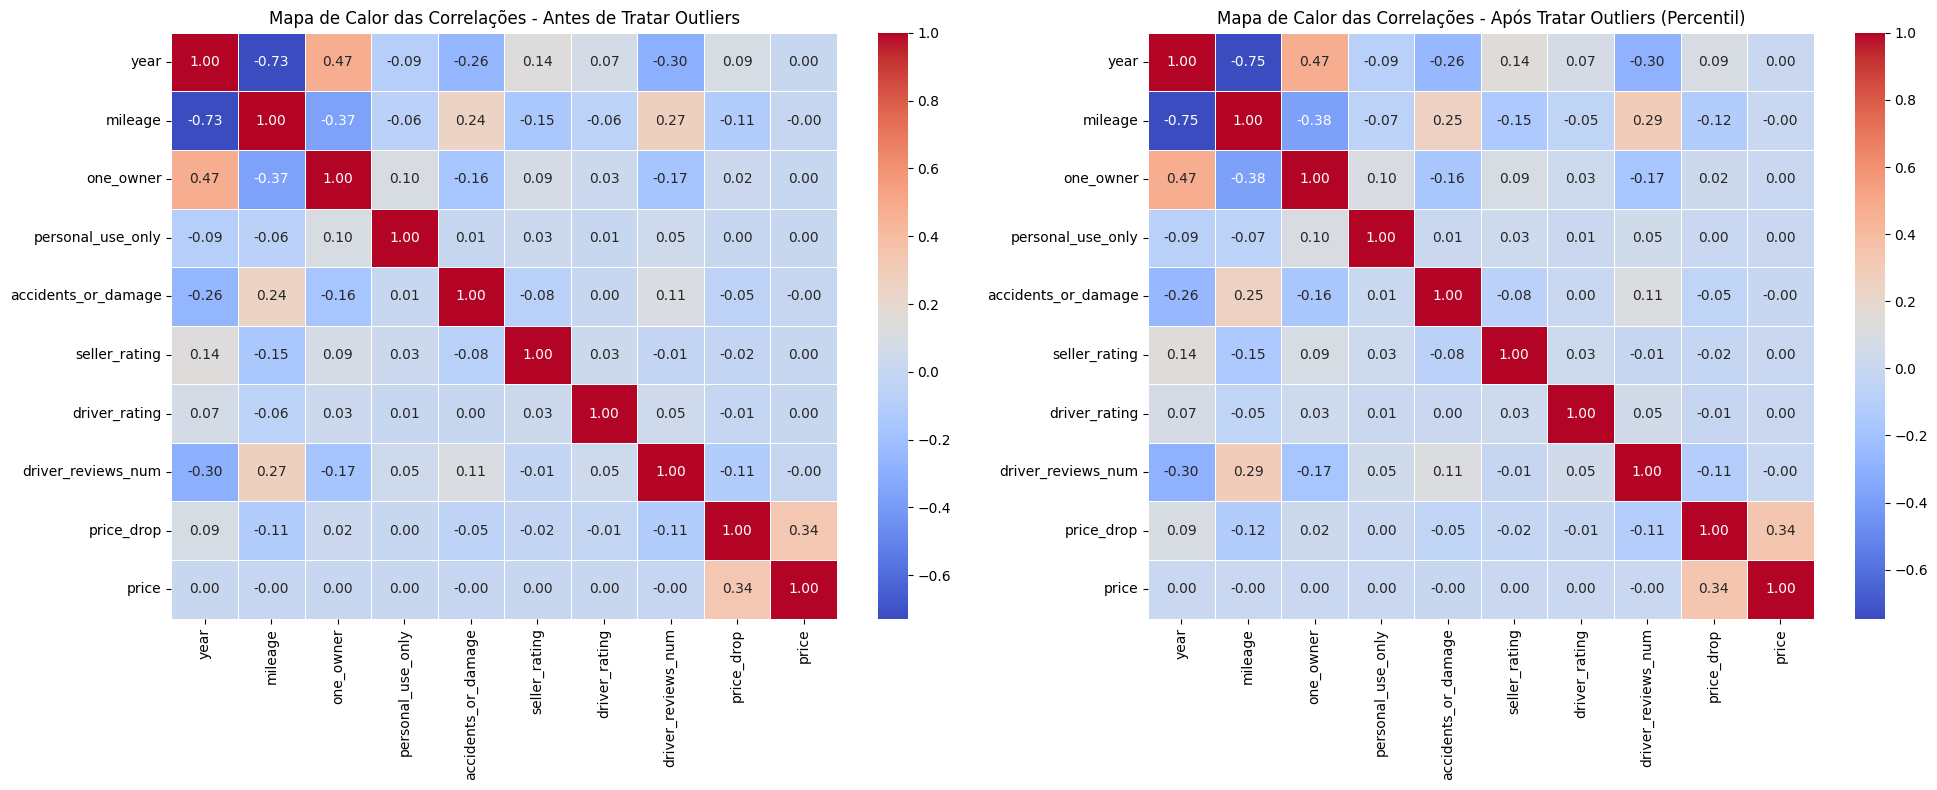

In [64]:
# Usando o tratamentento percentil tivemos um leve aumento na correlação entre as demais colunas
# O preocupante são os valores minimos existentes ainda na variavel mileage
correlation_matrix_before = cars_amos1[['year', 'mileage', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = mileage_percentil[['year', 'mileage', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Outliers')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Outliers (Percentil)')

plt.tight_layout()
plt.show()

##### Excluindo Registros (mileage)

In [65]:
# Excluindo todos os registros abaixo de 1000 na variavel e vamos fazer um teste 
mileage_excluir = mileage_percentil[mileage_percentil['mileage'] >= 1000]

In [66]:
mileage_excluir.shape

(176532, 20)

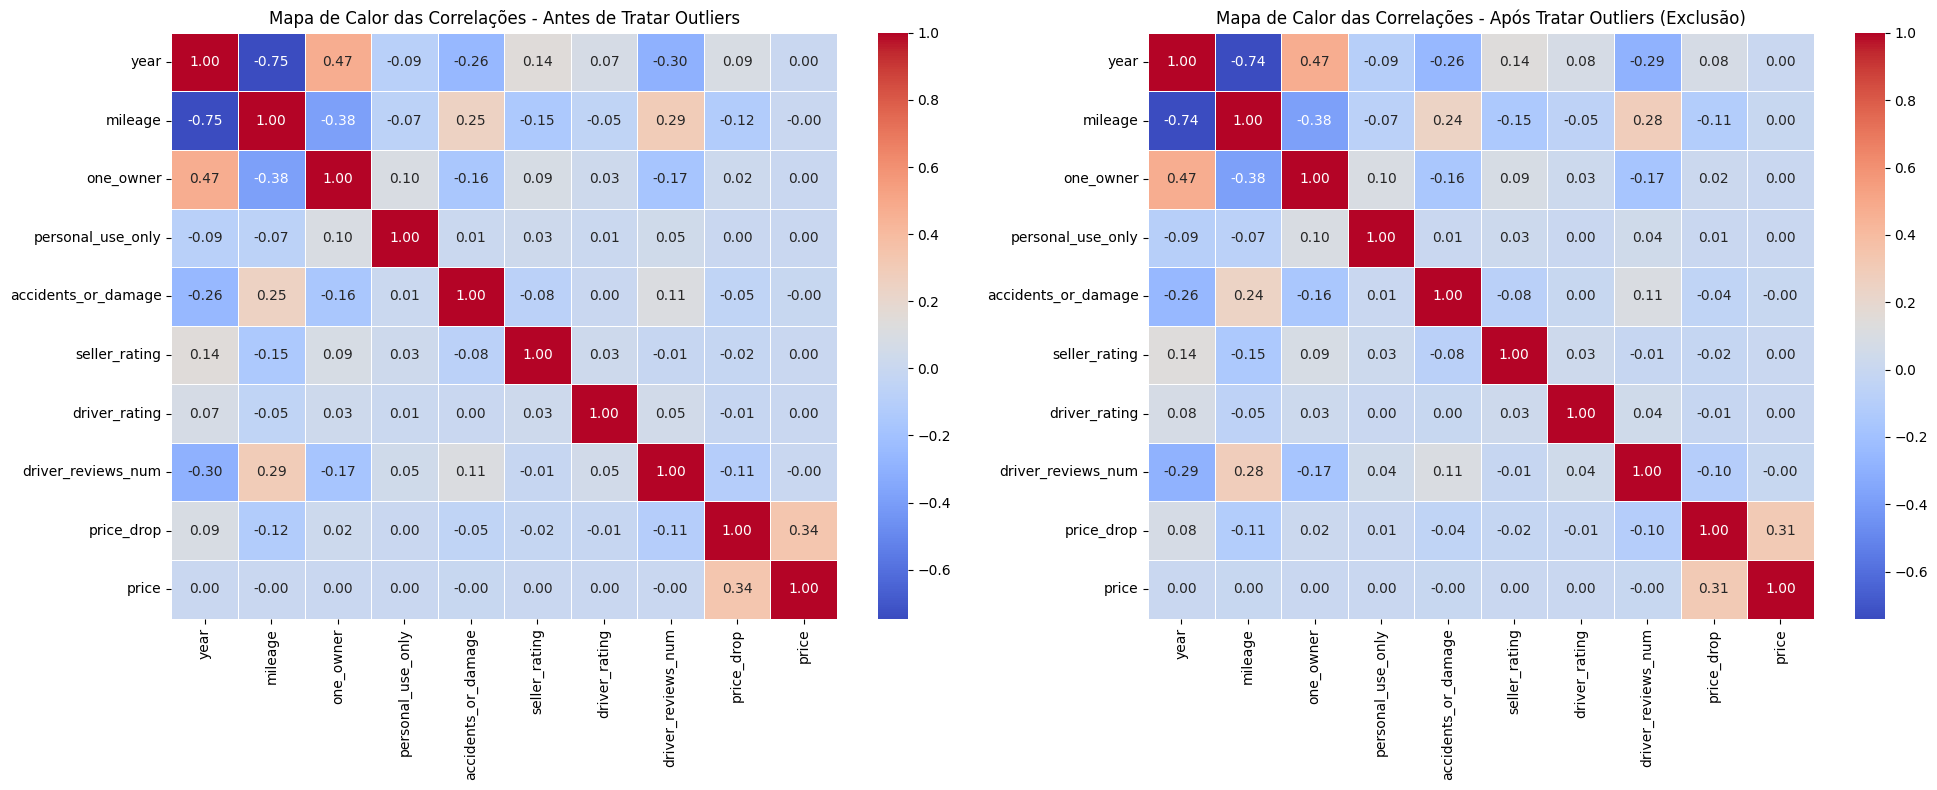

In [67]:
# A correlação após exclusão dos registros teve uma leve queda na relação
correlation_matrix_before = mileage_percentil[['year', 'mileage', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = mileage_excluir[['year', 'mileage', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Outliers')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Outliers (Exclusão)')

plt.tight_layout()
plt.show()

##### Tratamento Iterquartil (mileage)

In [68]:
# Vamos fazer a ultima análise e ver os resultados 
# Calcular o primeiro quartil (Q1) e o terceiro quartil (Q3)
Q1 = cars_amos1['mileage'].quantile(0.25)
Q3 = cars_amos1['mileage'].quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

# Definir limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Filtrar os dados
mileage_interquartil = cars_amos1[(cars_amos1['mileage'] >= lower_bound) & (cars_amos1['mileage'] <= upper_bound)]

In [69]:
# Perdemos mais de 14 mil registros
mileage_interquartil.shape

(175344, 20)

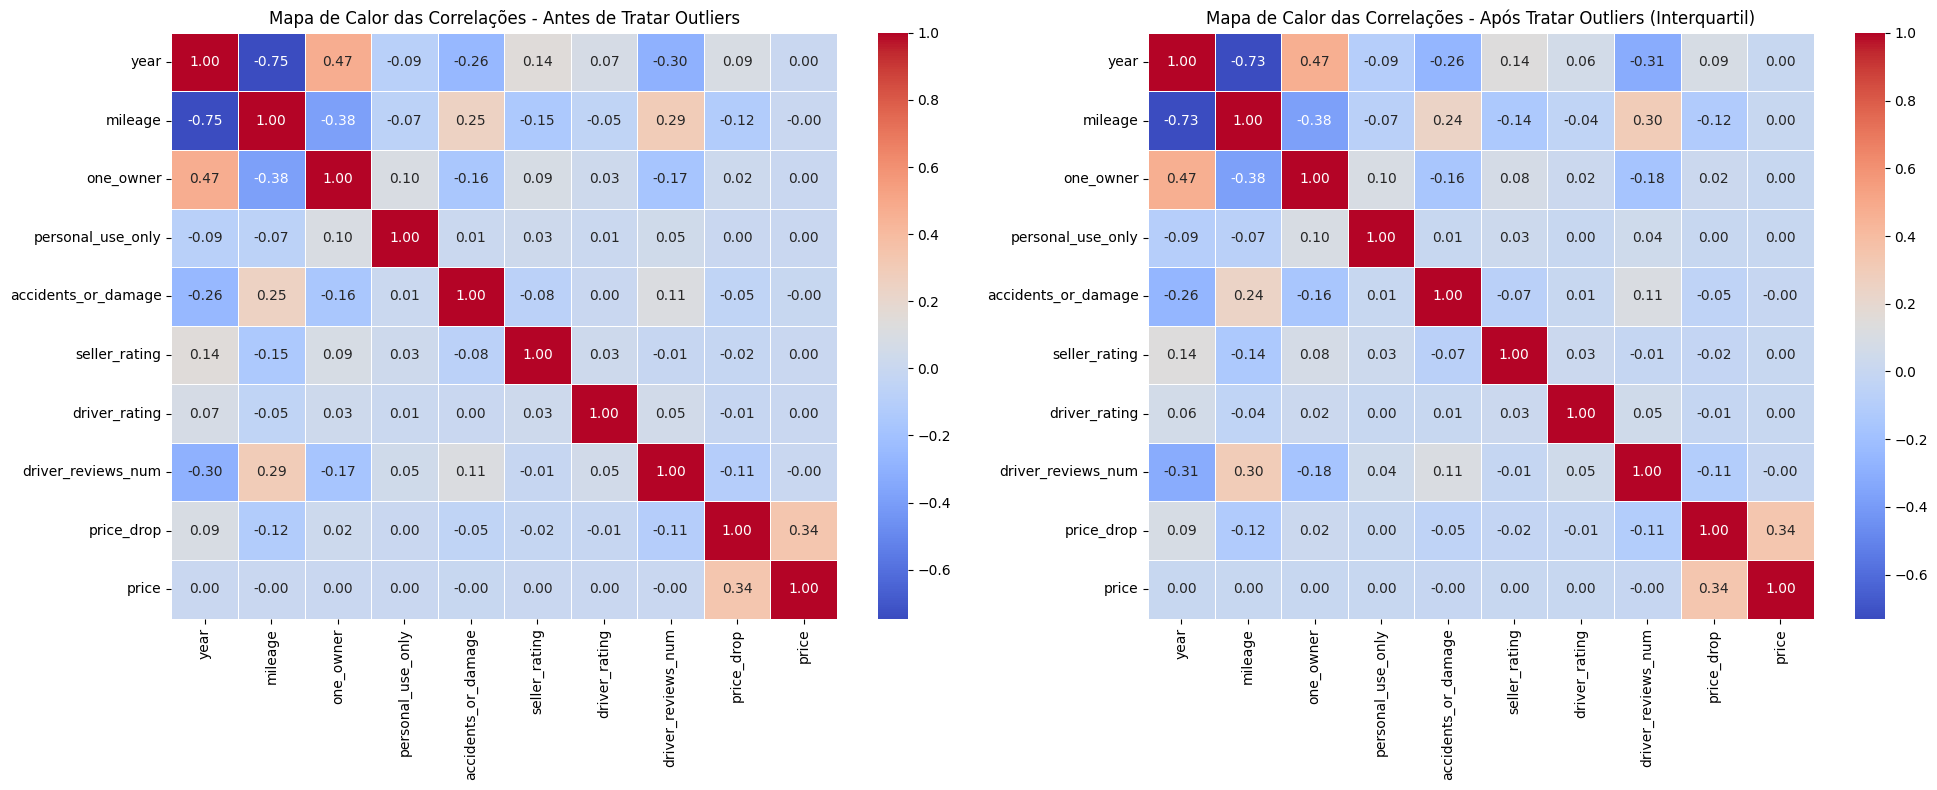

In [70]:
# A correlação após o interquartil dos registros teve uma leve queda na relação com as demais variaveis
# Não é vantajoso, perdemos registros e não melhorou a correlação entre mileage e demais variaveis
correlation_matrix_before = mileage_percentil[['year', 'mileage', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = mileage_interquartil[['year', 'mileage', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Outliers')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Outliers (Interquartil)')

plt.tight_layout()
plt.show()

##### Usando Percentil (mileage)

Optei por usar Percentil por ter dado um desempenho na correlação com outras variaveis maior e por não excluir registros

In [71]:
# Definindo os percentis 
lower_percentile = 5
upper_percentile = 95

# Cálculo dos valores de corte
lower_cutoff = np.percentile(cars_amos1['mileage'], lower_percentile)
upper_cutoff = np.percentile(cars_amos1['mileage'], upper_percentile)

# Substituindo os valores extremos 
cars_amos1.loc[:,'mileage'] = np.where(cars_amos1['mileage'] < lower_cutoff, lower_cutoff, cars_amos1['mileage'])
cars_amos1.loc[:,'mileage'] = np.where(cars_amos1['mileage'] > upper_cutoff, upper_cutoff, cars_amos1['mileage'])

In [72]:
# Vamos excluir valor 1
cars_amos1.mileage.describe()

count    179207.000000
mean      50675.288244
std       34745.896183
min        4595.300000
25%       22402.000000
50%       43297.000000
75%       73182.000000
max      125520.000000
Name: mileage, dtype: float64

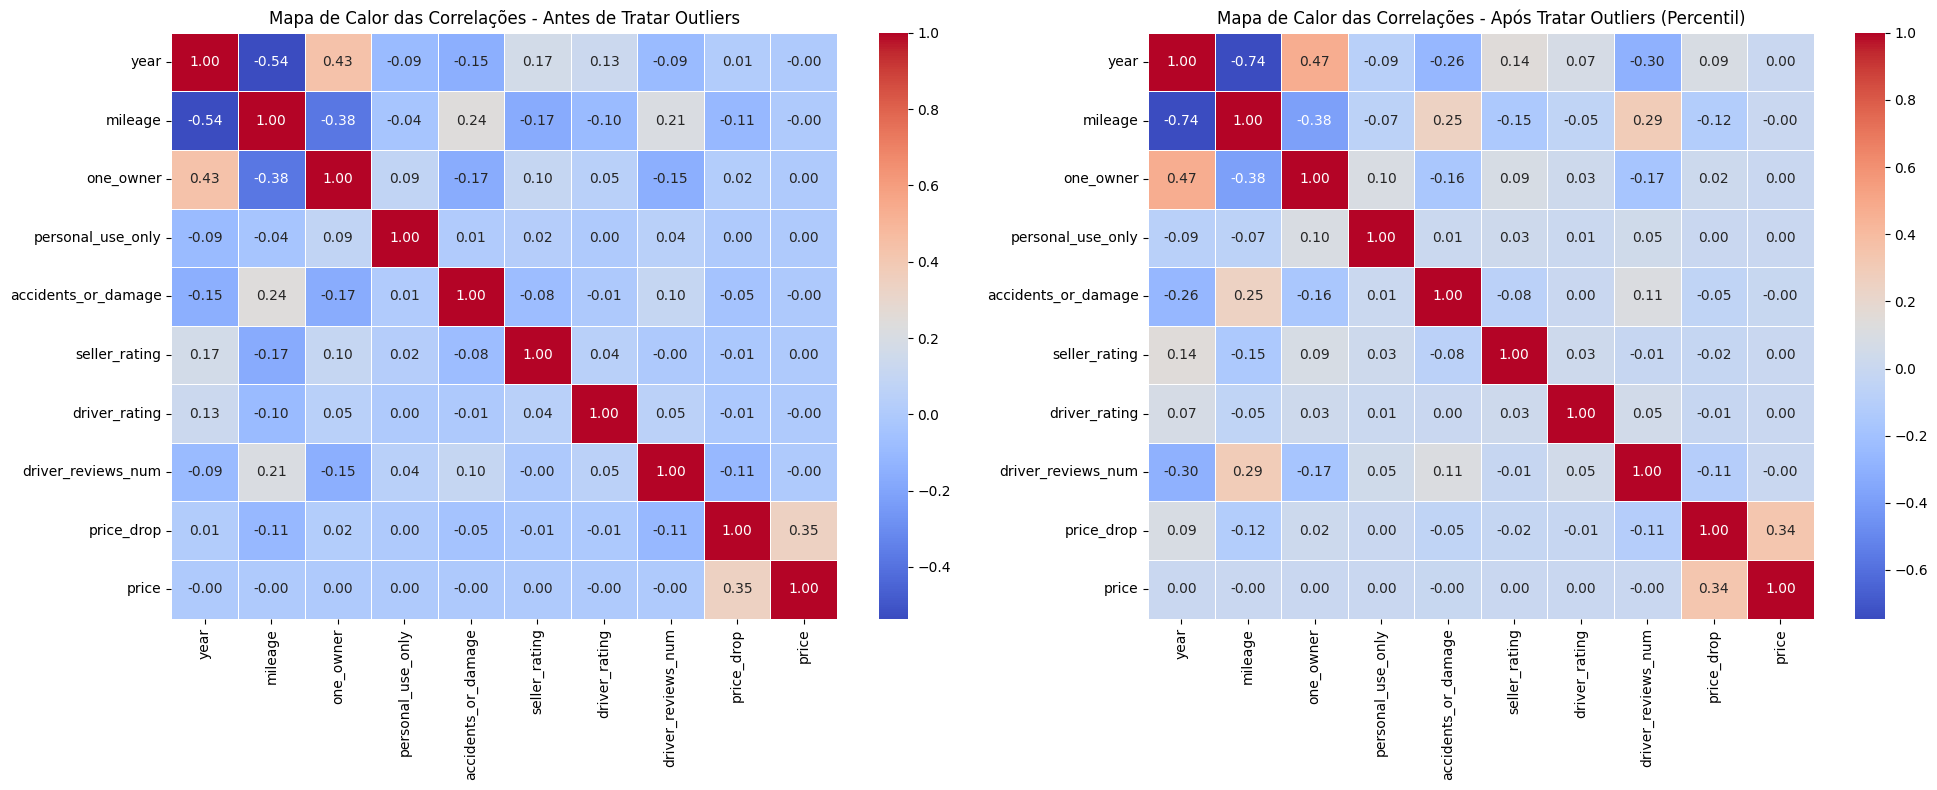

In [73]:
# Todos os valores extremos foram substituidos, possibilitando o aumento da correlação entre mileage e demais variaveis
correlation_matrix_before = cars_amos[['year', 'mileage', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = cars_amos1[['year', 'mileage', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Outliers')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Outliers (Percentil)')

plt.tight_layout()
plt.show()

## Coluna 5 'engine' (Descrição do Motor)

Engine (Variável Categórica Nominal)

In [74]:
# Variavel Categorica Nominal - Dados não mensuráveis e sem ordem
cars_amos1.engine.dtype

dtype('O')

In [75]:
# Normalizando os dados para obter maior consistência
cars_amos1.loc[:, 'engine'] = cars_amos1['engine'].astype(str)

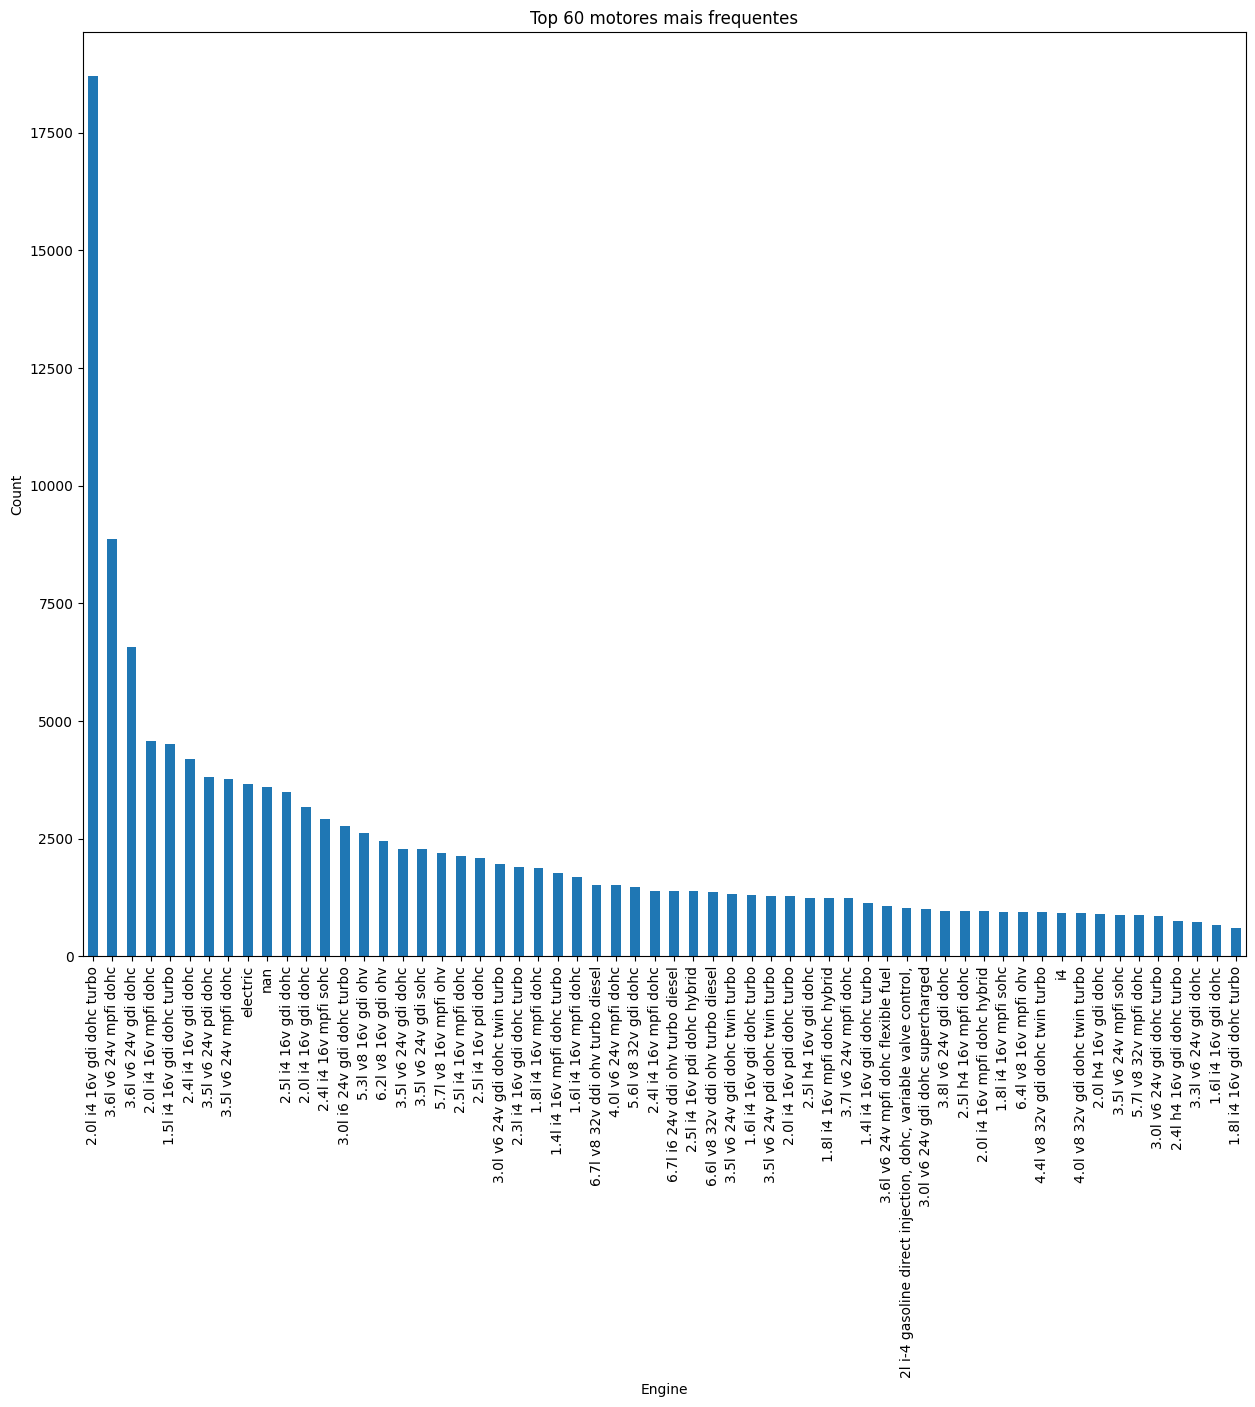

In [76]:
# Existe um modelo específico (2.0l i4 16v gdi dohc turbo) que sai fora da média dos motores, normal?
# Motor i4 tem pouca descrição
# Separando a coluna engine para analise
cars_engine = cars_amos1['engine'].value_counts()

# Construindo um gráfico dos 60 motores mais frequentes
plt.figure(figsize=(15, 12))
cars_engine.head(60).plot(kind='bar')
plt.xlabel('Engine')
plt.ylabel('Count')
plt.title('Top 60 motores mais frequentes')
plt.show()

In [77]:

# Vou substituir todos os registros que possuem algum valor referente a cilindrada apenas por cilindrada e descartar outras descrições
# Motivo: Preciso simplificar meus dados para poder trabalhar com a regressão

# Buscar os registros onde o valor na coluna 'engine' seja igual a '2.0l'
cars_amos1[cars_amos1['engine'].str.contains('2.0l', case=False)].shape

(33967, 20)

In [78]:
# Notamos que os regitros não são uniformes e podem prejudicar a regressão
cars_amos1.engine.value_counts()

engine
2.0l i4 16v gdi dohc turbo                      18702
3.6l v6 24v mpfi dohc                            8867
3.6l v6 24v gdi dohc                             6582
2.0l i4 16v mpfi dohc                            4578
1.5l i4 16v gdi dohc turbo                       4503
                                                ...  
5.7l flex fuel v8 381hp 401ft. lbs.                 1
225.0hp electric motor electric fuel system         1
1.3l                                                1
vortec 6l v-8 engine with 279hp                     1
450.0hp 4.0l 8 cylinder engine gasoline fuel        1
Name: count, Length: 2533, dtype: int64

In [79]:
# Vou transformar todos os valores da coluna fuel_type e engine em veiculos elétricos
# Motivo: A maioria dos dados da coluna engine possui motor com cilindrada, carros elétricos não possuem cilindros
# Portanto, a mesma quantidade de carros eletricos que tem na coluna engine, tem que ter na coluna fuel_type
cars_amos1.loc[cars_amos1['fuel_type'] == 'electric', 'engine'] = 'electric'
cars_amos1.loc[cars_amos1['fuel_type'] == 'electric fuel system', 'engine'] = 'electric'

In [80]:
# Vamos transformar a coluna 'engine' em cilindradas para facilitar na regressão
# Carros com diferentes cilindradas costumam ter valores diferentes, como havia muitas caracteristicas na descrição do motor, simplifiquei
def update_engine(value):
    cilindradas = {
        '1l' : 1.0,
        '1.0': 1.0,
        '1.2': 1.2,
        '1.3': 1.3,
        '1.4': 1.4,
        '1.5': 1.5,
        '1.6': 1.6,
        '1.79l': 1.7,
        '1.8': 1.8,
        '2.0': 2.0,
        '2l' : 2.0,
        '1.99l': 2.0,
        '2.2': 2.2,
        '2.3': 2.3,
        '2.4': 2.4,
        '2.5': 2.5,
        '2.7': 2.7,
        '2.9': 2.9,
        '3.0': 3.0,
        '3l' : 3.0,
        '3' : 3.0,
        '3.2': 3.2,
        '3.3': 3.3,
        '3.5': 3.5,
        '3.6': 3.6,
        '3.7': 3.7,
        '3.8': 3.8,
        '4.0': 4.0,
        '4' : 4.0,
        '4.3': 4.3,
        '4.4': 4.4,
        '4.6': 4.6,
        '4.7': 4.7,
        '4.8': 4.8,
        '5.0': 5.0,
        '5' : 5.0,
        '5l' : 5.0,
        '5.3': 5.3,
        '5.5': 5.5,
        '5.6': 5.6,
        '5.7': 5.7,
        '5.8': 5.8,
        '6.0': 6.0,
        '6' : 6.0,
        '6.2': 6.2,
        '6.4': 6.4,
        '6.6': 6.6,
        '6.7': 6.7,
        '8' : 8.0,
        'electric motor': 'electric',
        'electric zev': 'electric',
        '91kwh usable ext battery': 'electric',
        '70kwh usable std battery' : 'electric'
        
    }
    
    if isinstance(value, str):
        value_lower = value.lower()
        for cilindrada, valor in cilindradas.items():
            if cilindrada in value_lower:
                return valor
    return value

# Aplicar a função de atualização à coluna 'engine' usando .loc
cars_amos1.loc[:, 'engine'] = cars_amos1['engine'].apply(update_engine)


In [81]:
cars_amos1.engine.value_counts().tail(60)

engine
3.0                                      65760
2.0                                      41593
2.5                                      15532
2.4                                      10665
1.5                                       6842
4.0                                       6661
1.8                                       5349
1.6                                       4616
electric                                  4132
nan                                       3567
1.4                                       3564
5.0                                       2836
2.3                                       2258
6.0                                       2146
2.7                                       1440
1.3                                        594
1.2                                        463
8.0                                        435
1.0                                        413
2.9                                        259
vortec                                      28
hybrid

In [82]:
# Fiz o processo reverso
# Se existe descrição de motores eletricos, constata-se que o combustivel(fuel_type) se encaixa na categoria dos eletricos
cars_amos1.loc[cars_amos1['engine'] == 'electric', 'fuel_type'] = 'electric'

In [83]:
cars_amos1[cars_amos1['fuel_type'] == 'electric'].shape

(4132, 20)

In [84]:
cars_amos1[cars_amos1['engine'] == 'electric'].shape

(4132, 20)

In [85]:
# Converter valores float para strings na coluna "engine" novamente por estar dando erro
cars_amos1.loc[:, 'engine'] = cars_amos1['engine'].astype(str)

# Lista das descrições a serem excluídas conforme visto acima
descricoes_excluir = ['vortec', 'hybrid', '0.0l', 'fcv', 'flexible fuel', '1.7', 'turbo ddi dohc', 'dohc', 'ohv',
                      'turbo diesel', 'mpfi', 'gasoline', 'engine: direct-injection turbocharged']

# Excluir as linhas que contêm essas descrições da coluna "engine"
# Motivo: Dados irrelevantes, poucos registros e podem afetar minhas análises
cars_amos1 = cars_amos1[~cars_amos1['engine'].str.contains('|'.join(descricoes_excluir))]


In [86]:
# Agora temos dados mais consistentes
# Trabalhar dados nulos e carros 'eletric'
cars_amos1.engine.value_counts().head(20)

engine
3.0         65760
2.0         41593
2.5         15532
2.4         10665
1.5          6842
4.0          6661
1.8          5349
1.6          4616
electric     4132
nan          3567
1.4          3564
5.0          2836
2.3          2258
6.0          2146
2.7          1440
1.3           594
1.2           463
8.0           435
1.0           413
2.9           259
Name: count, dtype: int64

In [87]:
# Substituir 'electric' por um valor numérico específico, como 0
cars_amos1['engine'] = cars_amos1['engine'].replace('electric', 0)

# Converter os valores para float, excluindo a categoria 'electric'
cars_amos1['engine'] = pd.to_numeric(cars_amos1['engine'], errors='coerce')


In [88]:
# Temos uma coluna numerica agora
cars_amos1.engine.value_counts()

engine
3.0    65760
2.0    41593
2.5    15532
2.4    10665
1.5     6842
4.0     6661
1.8     5349
1.6     4616
0.0     4132
1.4     3564
5.0     2836
2.3     2258
6.0     2146
2.7     1440
1.3      594
1.2      463
8.0      435
1.0      413
2.9      259
Name: count, dtype: int64

In [89]:
# Temos dados nulos
cars_amos1.engine.isnull().sum()

3567

In [90]:
# Preencher os valores 'nan' com a mediana dos valores não nulos
# Motivo: Mediana é menos sensivel a dados extremos, ocorrendo uma melhor distribuição
# Não posso fazer a mediana com o valor 0 incluso por ser carros eletricos
median_engine = cars_amos1['engine'].median()
cars_amos1['engine'] = cars_amos1['engine'].fillna(median_engine)

In [91]:
# Sem outliears
cars_amos1.engine.isnull().sum()

0

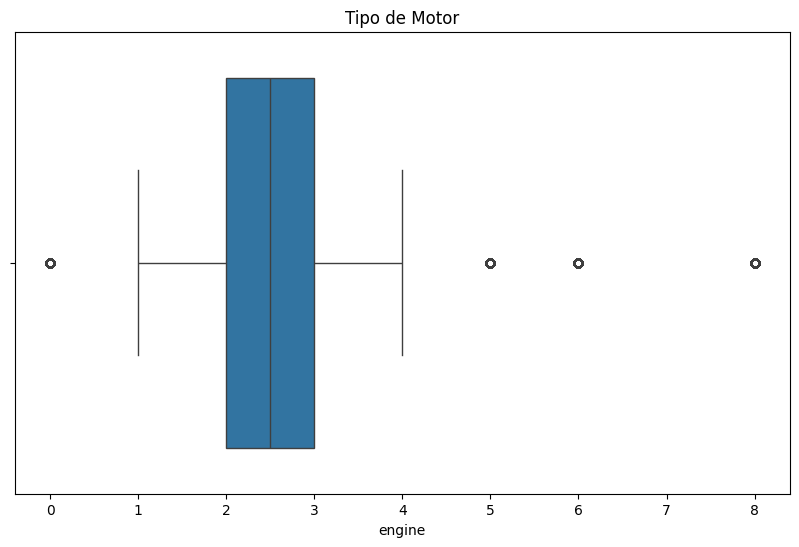

In [92]:
# Existem outliears na coluna
# Criação do gráfico de caixa
plt.figure(figsize=(10, 6))
sns.boxplot(x='engine', data=cars_amos1)
plt.title('Tipo de Motor')
plt.show()

In [93]:
# Vou mudar o nome da coluna para cilindrada
cars_amos1.rename(columns={'engine': 'cilindrada(engine)'}, inplace=True)

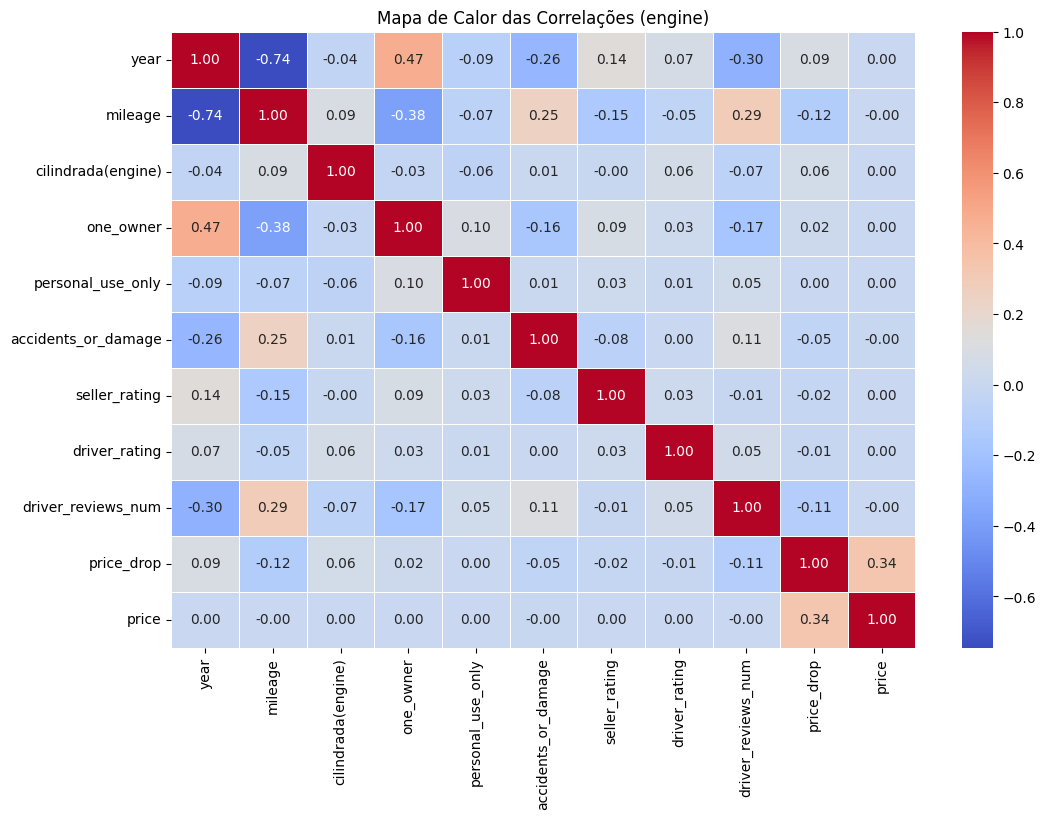

In [94]:
# Uma correlação muito Fraca com as demais variaveis
# Não compensa mantê-la, talvez
# Calcular a matriz de correlação
correlation_matrix = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das Correlações (engine)')
plt.show()

In [95]:
# Excluindo valores acima de 5 (outliears)
engine = cars_amos1.loc[cars_amos1['cilindrada(engine)'] <= 5]


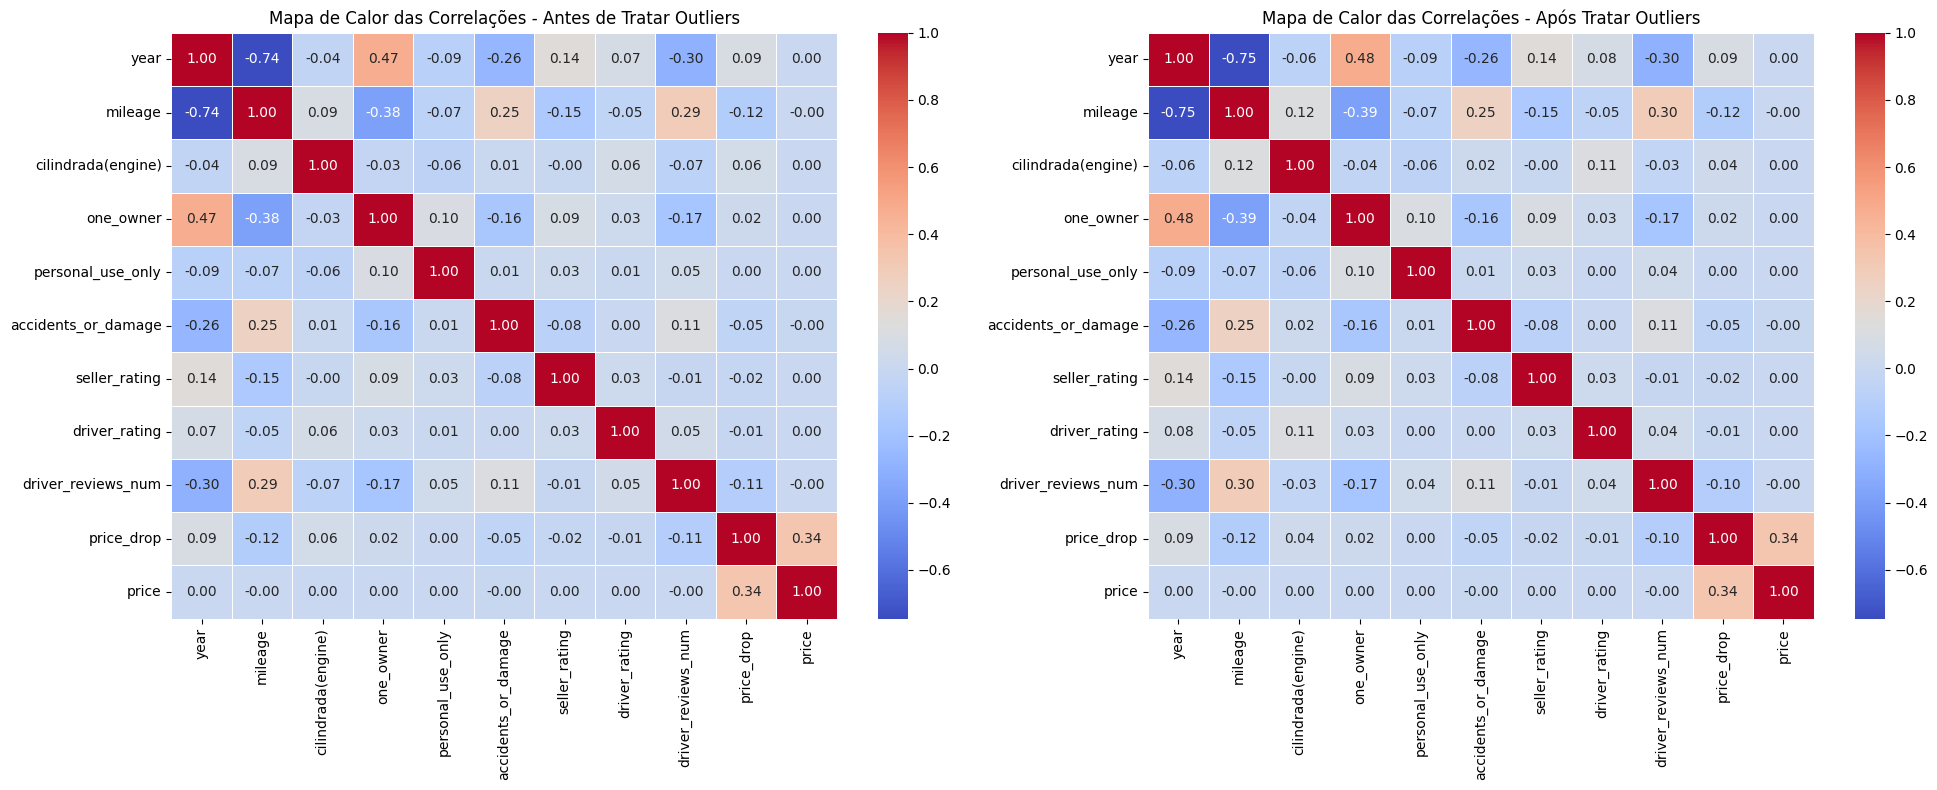

In [96]:
# Análise da Variavel antes e depois de outliears (Correlação de Pearson)
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = engine[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Outliers')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Outliers')

plt.tight_layout()
plt.show()

In [97]:
# Excluindo valor 0 e veremos se muda alguma coisa 
engine1 = cars_amos1.loc[cars_amos1['cilindrada(engine)'] != 0]

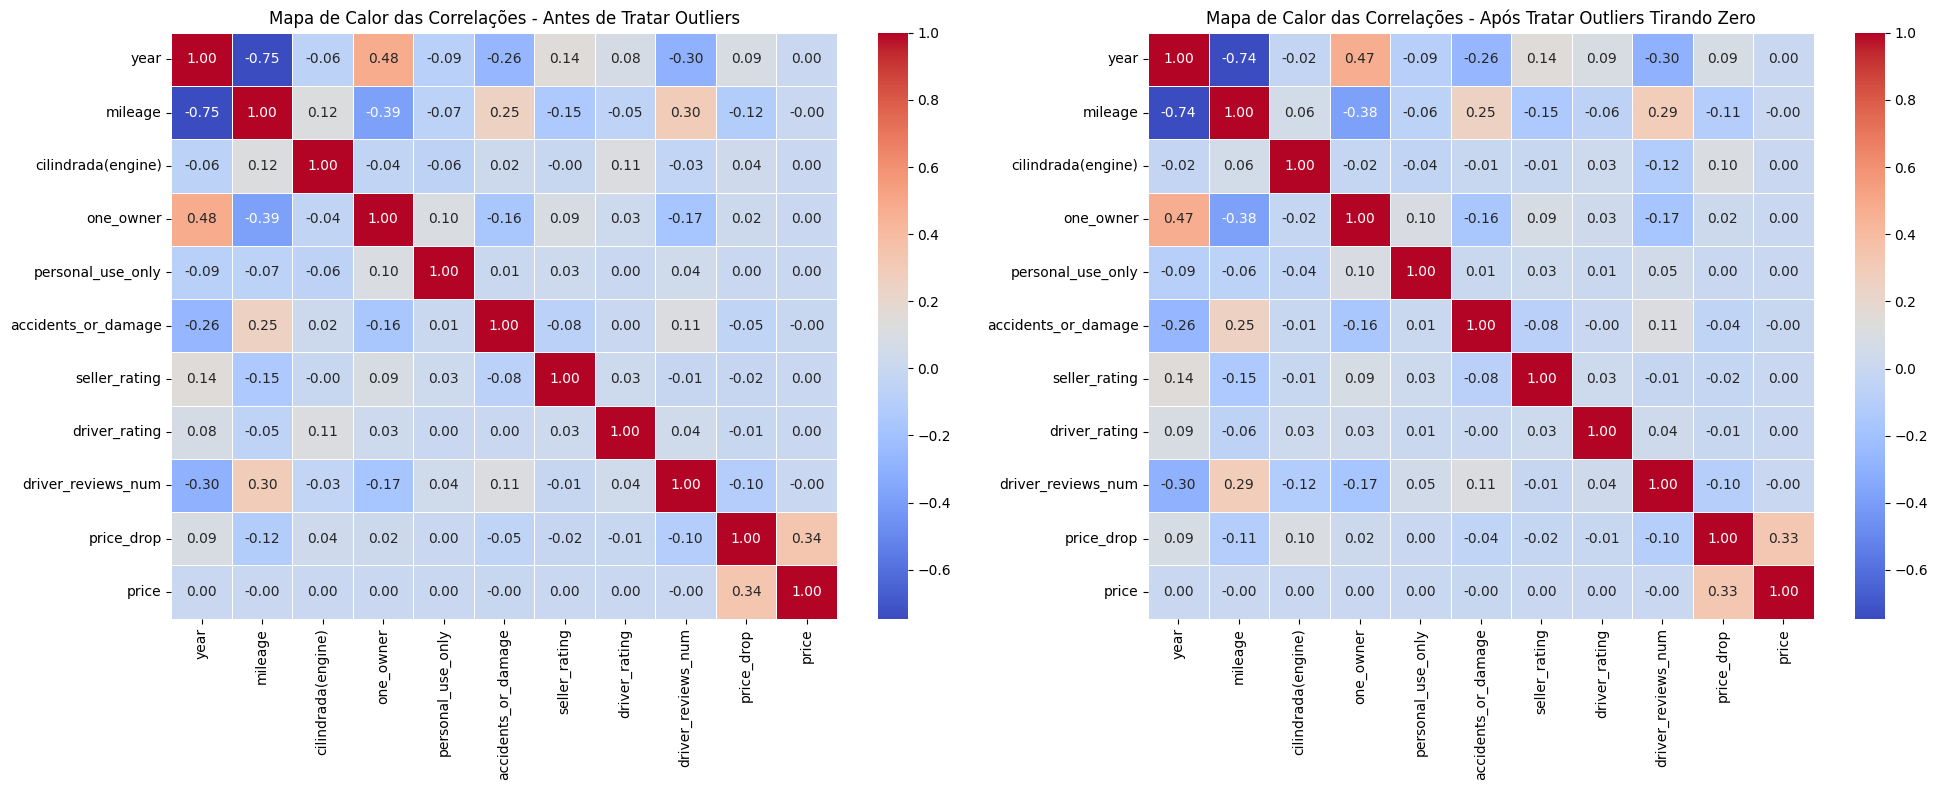

In [98]:
# Análise da Variavel antes e depois de outliears (Correlação de Pearson)
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = engine[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = engine1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Outliers')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Outliers Tirando Zero')

plt.tight_layout()
plt.show()

Conclusão:
- Mesmo fazendo alterações na coluna ainda é uma variavel que contem correlação fraca com as demais
- Podemos exclui-la, no entanto, vamos aguardar se muda alguma coisa tratando outras variaveis

## Coluna 6 'transmission' (Tipo de Transmissão)

Transmission (Variável Categorica Nominal)

In [99]:
# Variavel Categórica Nominal - Sem ordem e não mensuráveis
# Temos um padrão nos registros
cars_amos1.transmission.unique()

array(['automatic', '7-speed automatic', '6-speed automatic',
       '9-speed automatic', '8-speed automatic', '10-speed automatic',
       nan, 'automatic cvt', 'automatic with tiptronic',
       '4-speed automatic', '6-speed', '5-speed automatic',
       '7-speed automatic with auto-shift', '1-speed automatic',
       '6-speed manual', '6-speed automatic with auto-shift',
       '5-speed manual', 'ivt', '4-speed a/t', 'manual', '5-speed m/t',
       'variable', 'automatic 5-speed', '6-speed shiftable automatic',
       'continuously variable transmission', '6 speed automatic',
       '1-speed cvt with overdrive', '8-speed automatic with auto-shift',
       '8-speed automatic with shiftronic',
       '6-speed dsg automatic with tiptronic', 'automatic, 6-spd',
       'cvt transmission', '8-speed automatic with tiptronic',
       '10-speed transmission', '6-spd auto transmission',
       '6-speed automatic with sequential shift',
       '8-spd auto transmission', 'lineartronic cvt', 'a/

In [100]:
# Alguns dados nulos
cars_amos1.transmission.isnull().sum()

2238

In [101]:
# Transformei as descrições em categorias mais amplas, pois muitas descrições são iguais, só estão escritas de formas diferentes
import pandas as pd

def update_transmission(value):
    if pd.isnull(value):  # Verificar se é nulo
        return 'unspecified'  # Se for nulo, retornar 'unspecified'
    elif isinstance(value, str):  # Verificar se é uma string
        value_lower = value.lower()
        if 'manual' in value_lower:
            return 'manual'
        elif 'cvt' in value_lower:
            return 'cvt'
        elif '4-speed' in value_lower or '4-spd' in value_lower:
            return '4-speed automatic'
        elif '5-speed' in value_lower or '5 speed' in value_lower:
            return '5-speed automatic'
        elif '6-speed' in value_lower or '6-spd' in value_lower or '6 speed' in value_lower:
            return '6-speed automatic'
        elif '7-speed' in value_lower or '7 speed' in value_lower or '7-spd' in value_lower:
            return '7-speed automatic'
        elif '8-speed' in value_lower or '8-spd' in value_lower or '8 speed' in value_lower:
            return '8-speed automatic'
        elif '9-speed' in value_lower or '9-spd' in value_lower or '9speed' in value_lower:
            return '9-speed automatic'
        elif '10-speed' in value_lower or '10 speed' in value_lower or '10spd' in value_lower or '10-sp' in value_lower:
            return '10-speed automatic'
        elif 'automatic' in value_lower:
            return 'automatic'   
        else:
            return 'unspecified'
    else:  # Se não for uma string, retornar o valor original
        return value

# Aplicar a função de atualização à coluna transmission
cars_amos1['transmission'] = cars_amos1['transmission'].apply(update_transmission)


In [102]:
# Com Categorias mais amplas é mais fácil de trabalhar
cars_amos1.transmission.value_counts().tail(60)

transmission
6-speed automatic     38779
8-speed automatic     37199
cvt                   27670
automatic             26333
9-speed automatic     15530
10-speed automatic    10709
7-speed automatic      8685
unspecified            4877
manual                 4308
5-speed automatic      3943
4-speed automatic      1092
Name: count, dtype: int64

## Coluna 7 'drivetrain' (Tipo de Tração)

Drivetrain (Variável Categorica Nominal)

In [103]:
# Variável Categorica Nominal - sem ordem e não mensurável
# Também existe um padrão nos registros
cars_amos1.drivetrain.unique()

array(['four-wheel drive', 'rear-wheel drive', 'front-wheel drive',
       'all-wheel drive', nan, 'fwd', '4wd', 'awd', 'rwd',
       'four-wheel drive with locking and limited-slip differential',
       'all-wheel drive with locking and limited-slip differential',
       'all wheel drive', 'unknown', 'four wheel drive',
       'all-wheel drive with locking differential', 'front wheel drive',
       'front-wheel drive with limited-slip differential',
       'rear-wheel drive with limited-slip differential',
       'four-wheel drive with locking differential', '4x4', '4x2',
       'rear wheel drive'], dtype=object)

In [104]:
# Dados nulos
cars_amos1.drivetrain.isnull().sum()

4717

In [105]:
# Podemos diminuir as categorias 
cars_amos1.drivetrain.value_counts()

drivetrain
front-wheel drive                                              57106
all-wheel drive                                                56109
four-wheel drive                                               36974
rear-wheel drive                                               21040
fwd                                                             1475
awd                                                              871
4wd                                                              415
rwd                                                              356
four-wheel drive with locking and limited-slip differential       12
front-wheel drive with limited-slip differential                  11
unknown                                                            9
all-wheel drive with locking and limited-slip differential         7
front wheel drive                                                  6
all wheel drive                                                    3
all-wheel drive with lo

In [106]:
# Transformar a coluna drive train em categorias mais amplas para trabalhar melhor, usando esta função
def agrupar_tracao(tracao):
    if tracao in ['four-wheel drive', '4wd', 'four wheel drive', 'four-wheel drive with locking and limited-slip differential', 'all-wheel drive', 'all wheel drive', 'all-wheel drive with locking and limited-slip differential', 'all-wheel drive with locking differential']:
        return 'AWD (Tração nas quatro rodas)'
    elif tracao in ['rear-wheel drive', 'rwd', 'rear wheel drive', 'rear-wheel drive with limited-slip differential']:
        return 'RWD (Tração traseira)'
    elif tracao in ['front-wheel drive', 'fwd', 'front wheel drive', 'front-wheel drive with limited-slip differential']:
        return 'FWD (Tração dianteira)'
    else:
        return 'Other'

# Aplicar a função à coluna "drivetrain" do DataFrame
cars_amos1['drivetrain'] = cars_amos1['drivetrain'].apply(agrupar_tracao)


In [107]:
# Categorias ampliadas para melhor análise
cars_amos1.drivetrain.value_counts()

drivetrain
AWD (Tração nas quatro rodas)    93526
FWD (Tração dianteira)           58598
RWD (Tração traseira)            21399
Other                             5602
Name: count, dtype: int64

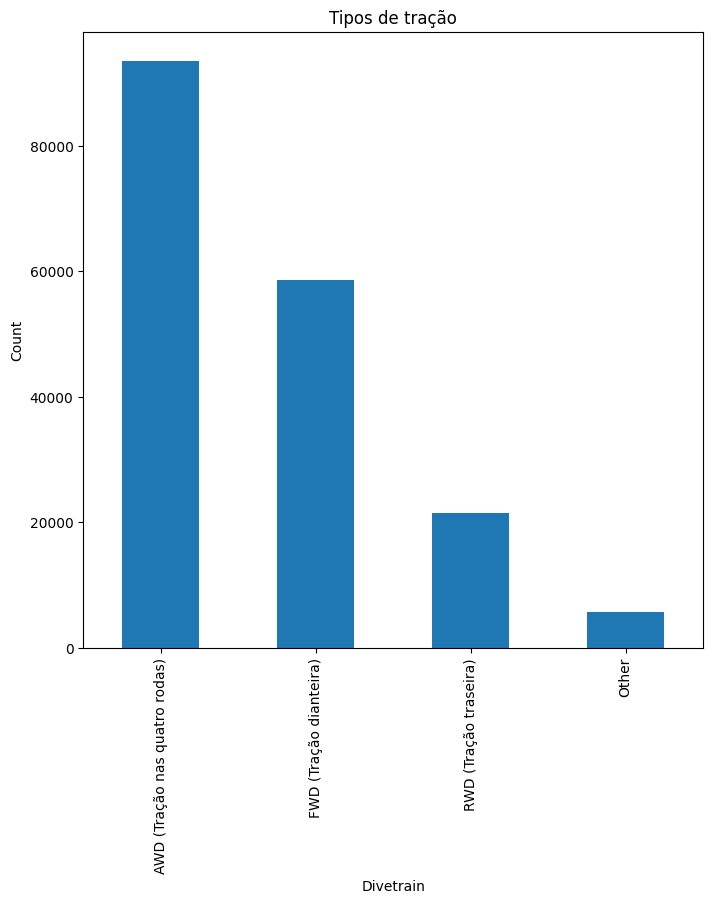

In [108]:
# Separando a coluna drivetrain para criar um gráfico
drivetrain = cars_amos1['drivetrain'].value_counts()

# Podemos observar que a maioria dos veículos são tração quatro rodas
# O tipo de tração interfere diretamente no valor do veículo
# Construindo um gráfico dos tipos de tração
plt.figure(figsize=(8, 8))
drivetrain.head().plot(kind='bar')
plt.xlabel('Divetrain')
plt.ylabel('Count')
plt.title('Tipos de tração')
plt.show()

## Coluna 8 'fuel_type' (Tipo de Combustivel) 

Fuel_type (Variavel Categorica Nominal)

In [109]:
# Variavel Categorica Nominal - sem ordem e não mensuráveis
cars_amos1.fuel_type.unique()

array(['gasoline', nan, 'diesel', 'hybrid', 'e85 flex fuel', 'electric',
       'gasoline fuel', 'b', 'plug-in hybrid', 'flexible fuel',
       'gasoline/mild electric hybrid', 'compressed natural gas',
       'regular unleaded', 'g', 'biodiesel', 'hybrid fuel',
       'premium unleaded', 'natural gas', 'gas', 'phev',
       'gas/electric hybrid', 'flex fuel capability', 'unspecified'],
      dtype=object)

In [110]:
# Dados nulos consideráveis
cars_amos1.fuel_type.isnull().sum()

5216

In [111]:
# A maioria é a gasolina
cars_amos1.fuel_type.value_counts()

fuel_type
gasoline                         151411
hybrid                             6997
diesel                             6597
e85 flex fuel                      4219
electric                           4132
b                                   320
flexible fuel                       112
plug-in hybrid                       30
gasoline fuel                        23
gasoline/mild electric hybrid        19
regular unleaded                     13
g                                    12
premium unleaded                     11
compressed natural gas                5
biodiesel                             1
hybrid fuel                           1
natural gas                           1
gas                                   1
phev                                  1
gas/electric hybrid                   1
flex fuel capability                  1
unspecified                           1
Name: count, dtype: int64

In [112]:
# Como nas outras colunas, vamos agrupar em categorias mais amplas o tipo de combustivel através de uma função
# Dicionário de mapeamento
fuel_mapping = {
    'gasoline': ['gasoline', 'gasoline/mild electric hybrid', 'premium unleaded', 'gasoline fuel', 'regular unleaded'],
    'diesel': ['diesel', 'diesel fuel'],
    'electric': ['electric', 'electric fuel system'],
    'hybrid': ['hybrid', 'e85 flex fuel', 'flexible fuel', 'plug-in hybrid', 'flex fuel capability', 'hybrid fuel'],
    'unspecified': ['b', 'unspecified', 'phev', 'g', 'biodiesel', 'hydrogen fuel cell', 'compressed natural gas', 'hybrid gas', 'gaseous',
                    'natural gas', 'gas', 'gas/electric hybrid', 'gaseoso', pd.NA]
}

# Aplicar o mapeamento
for category, fuels in fuel_mapping.items():
    cars_amos1['fuel_type'] = cars_amos1['fuel_type'].replace(fuels, category)


In [113]:
# Podemos ver que temos tipos de combustiveis padronizados
# Gasolina é de longe o mais frequente
# Tipo de combustivel pode afetar os preços?
cars_amos1.fuel_type.value_counts()

fuel_type
gasoline       151477
hybrid          11360
diesel           6597
unspecified      5559
electric         4132
Name: count, dtype: int64

In [114]:
# Sem dados nulos, agora são inespecíficos
cars_amos1.fuel_type.isnull().sum()

0

## Coluna 9 'mpg' (Milhas Por Galão)

Mpg (Variavel Numérica Discreta)

In [115]:
# Variavel Numérica Discreta - Números finitos inteiros distribuidos em classes
# Alguns dados estão em float
# Dados irregulares
cars_amos1.mpg.unique()

array(['17-23', '14-19', '13-17', '21-31', nan, '21-26', '15-21', '21-29',
       '18-25', '28-34', '26-36', '29-39', '20-28', '19-30', '17-25',
       '22-26', '20-32', '19-27', '19-28', '53-46', '16-25', '21-27',
       '26-31', '19-26', '49-47', '21-28', '19-25', '22-31', '28-39',
       '19-24', '23-32', '25-32', '20-25', '29-35', '26-33', '14-23',
       '17-21', '30-38', '24-28', '25-36', '16-23', '19-23', '27-32',
       '24-33', '24-30', '25-35', '16-18', '16-21', '18-22', '43-41',
       '30-40', '17-22', '20-29', '27-35', '20-23', '17-20', '23-29',
       '14-20', '24-31', '22-28', '18-23', '14-22', '26-38', '31-40',
       '15-20', '20-27', '16-19', '33-40', '36-36', '15-24', '48-48',
       '22-29', '21-30', '28-37', '20-26', '14-21', '23-34', '26-30',
       '27-36', '16-22', '29', '20-31', '17-28', '55-54', '35-41',
       '22-27', '25-30', '24-32', '27-31', '27-33', '25-28', '18-24',
       '24-29', '23-30', '31-36', '13-18', '25-29', '18-27', '15-19',
       '17-26', '2

In [116]:
# Os 10 intervalos mais frequentes são valores razoáveis quando se trata de milhas por galão
cars_amos1.mpg.value_counts().head(10)

mpg
19-26    3819
18-25    3701
20-27    3268
17-25    3219
16-23    2720
19-28    2673
21-28    2605
22-29    2432
17-23    2430
19-24    2230
Name: count, dtype: int64

### Correlação Com Dados Nulos

In [117]:
# Muitos registros nulos
# Compensa lidar com essa coluna?
# O quanto a coluna 'mpg' influencia nos valores do veículo
cars_amos1.mpg.isnull().sum()

33238

In [118]:
# Vamos encontrar a média dos intervalos
# Fazer uma correlação entre a coluna mpg para confirmar se ela influencia no preço do carro
# Criação de uma função para transformar em média
def interval_to_mpg(interval):
    # Verifica se o argumento é uma string
    if isinstance(interval, str):
        # Divide a string em duas partes
        parts = interval.split('-')
        # Verifica se a string foi corretamente dividida em duas partes
        if len(parts) == 2:
            # Converte as partes em números e calcula a média
            lower, upper = map(float, parts)
            return (lower + upper) / 2
    # Retorna o intervalo original se não for uma string válida
    return interval

# Aplicação da função na coluna
cars_amos1['mpg'] = cars_amos1['mpg'].apply(interval_to_mpg)

In [119]:
# Temos as médias dos intervalos dos registros
cars_amos1.mpg.unique()

array([20.0, 16.5, 15.0, 26.0, nan, 23.5, 18.0, 25.0, 21.5, 31.0, 34.0,
       24.0, 24.5, 21.0, 23.0, 49.5, 20.5, 28.5, 22.5, 48.0, 22.0, 26.5,
       33.5, 27.5, 32.0, 29.5, 18.5, 19.0, 30.5, 19.5, 27.0, 30.0, 17.0,
       42.0, 35.0, 35.5, 17.5, 36.5, 36.0, 25.5, 32.5, 28.0, 31.5, '29',
       54.5, 38.0, 29.0, 15.5, 16.0, '22', 0.0, 43.5, 33.0, 13.5, 38.5,
       '0', 34.5, 37.0, 39.5, 41.5, 42.5, '25', 43.0, 8.0, 52.5, '21',
       55.5, 14.5, 11.0, 12.0, 13.0, 7.5, 9.5, 48.5, 52.0, '24', 8.5,
       '18', 6.5, 44.0, 37.5, 58.0, 45.5, 41.0, 50.5, 14.0, '19', 40.5,
       40.0, 94.5, 7.0, 11.5, 10.0, 47.5, 9.0, 55.0, 6.0, '26', '14',
       '20', 121.0, 10.5, '16', 39.0, 12.5, 76.0, 47.0, 77.5, '31', '13',
       45.0, 59.0, 5.0, '23', 102.0, 50.0, '17', 66.0, 4.5, 73.5, '43',
       '30', 5.5, 54.0, 53.5, 77.0, '27', '34', 22.75, 49.0, 15.75, '15',
       31.75, 118.5, 26.75, 81.0, 127.5, 34.25, 28.25, 25.25, 26.25],
      dtype=object)

In [120]:
# Vamos fazer uma correlação desta coluna com dados nulos e verificar os resultados
# Criando um dataframe para o nosso objetivo
null_mpg = cars_amos1.copy()

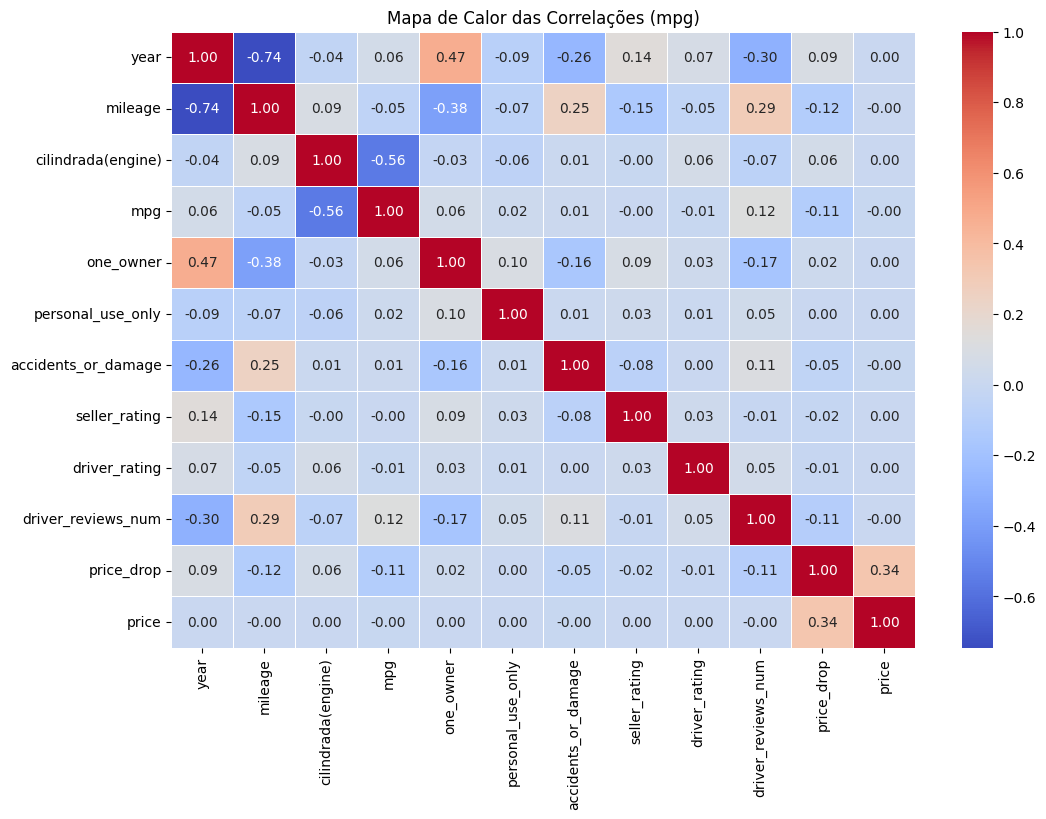

In [121]:
# Temos uma boa correlação negativa moderada com a coluna cilindrada
# Significa que quanto maior a potencia do motor, menor será a eficiência do consumo do carro, faz sentido
# Uma correlação muito Fraca com as demais variaveis
# Calcular a matriz de correlação
correlation_matrix = null_mpg[['year', 'mileage', 'cilindrada(engine)', 'mpg', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das Correlações (mpg)')
plt.show()

### Correlação Tratando 0

In [122]:
# Vamos analisar a correlação tratando oa valores 0
# Criando um dataframe
zero_mpg = cars_amos1.copy()

In [123]:
# Converter todos os valores da coluna 'mpg' para float
zero_mpg['mpg'] = pd.to_numeric(zero_mpg['mpg'], errors='coerce')

# Calculando a mediana dos valores não nulos na coluna 'mpg'
median_mpg = zero_mpg['mpg'].median()

# Substitua os valores zero na coluna 'mpg' pela mediana
zero_mpg['mpg'] = zero_mpg['mpg'].replace(0, median_mpg)

In [124]:
# Não temos valores zero mais
zero_mpg.mpg.describe()

count    145887.000000
mean         25.056926
std           5.860628
min           4.500000
25%          21.000000
50%          24.000000
75%          28.500000
max         127.500000
Name: mpg, dtype: float64

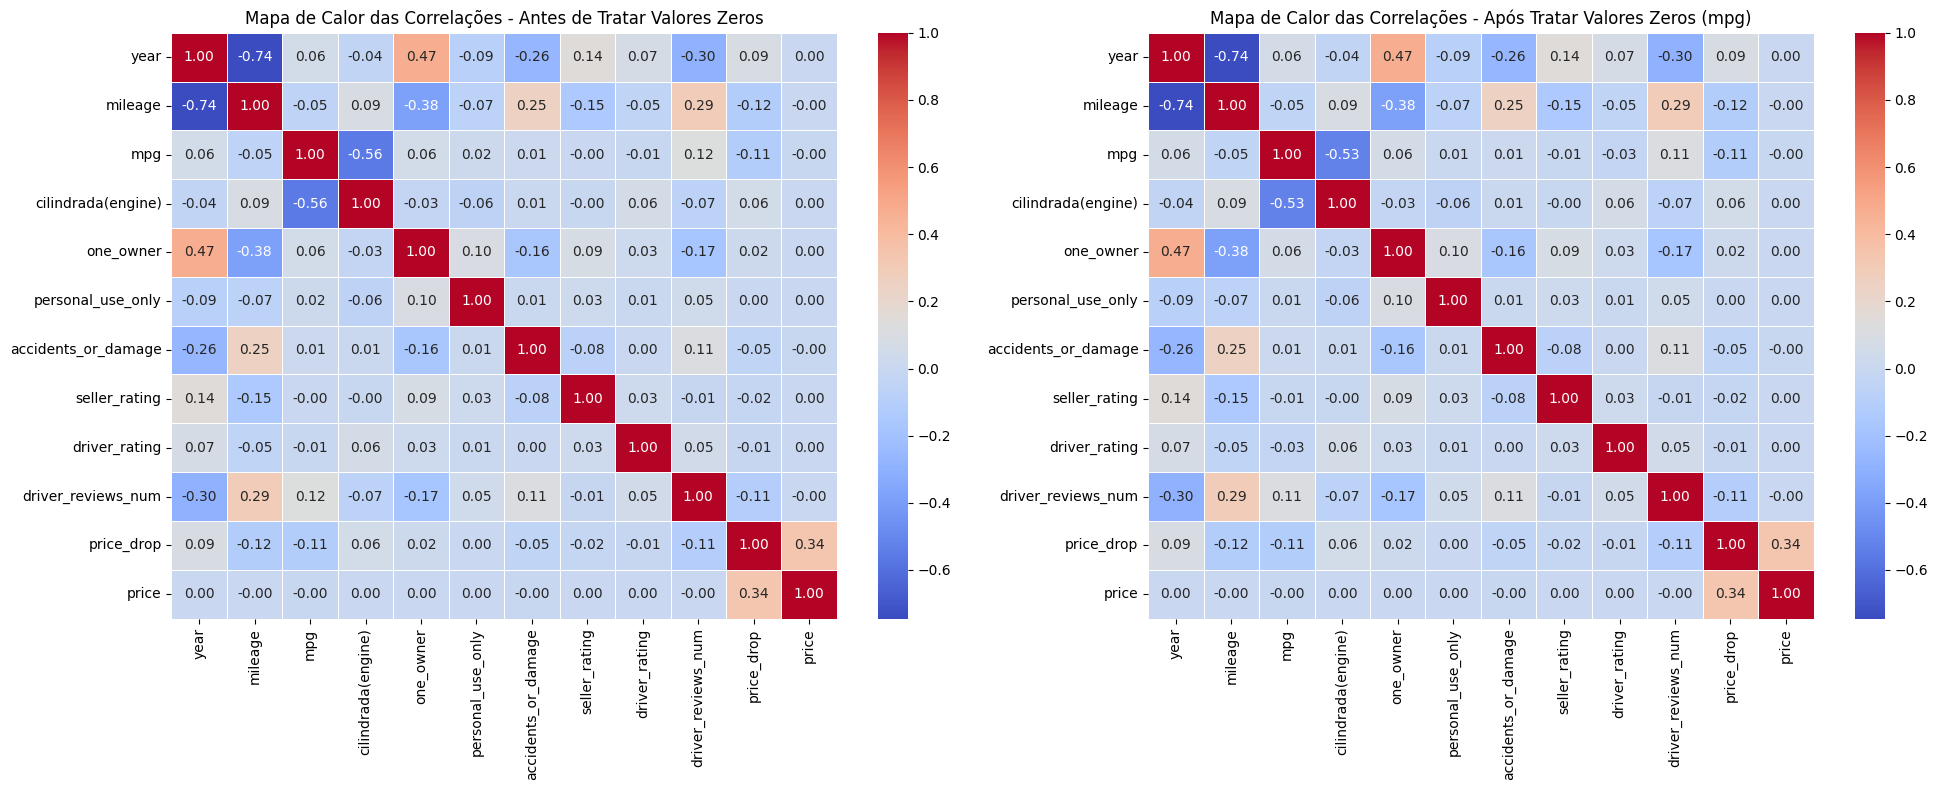

In [125]:
# Análise da Variavel antes e depois de tratar zero (Correlação de Pearson)
# Teve uma leve queda na relação entre a coluna mpg e demais variáveis com o tratamento do zero
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = null_mpg[['year', 'mileage', 'mpg', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = zero_mpg[['year', 'mileage', 'mpg', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Valores Zeros')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Valores Zeros (mpg)')
plt.tight_layout()
plt.show()

### Correlação Tratando zero e null

In [126]:
# Criando um Dataframe para não influenciar o original
null_zero = cars_amos1.copy()

In [127]:
# Eliminando dados nulos, eles serão substituidos pelo valor 0, pois já temos valores 0
# Optei por substituir por 0 devido a coluna ser uma coluna de eficiência do consumo de veículos
# Como 0 é um valor discrepante, pois não existe um carro que tenha eficiência 0, vou trabalhar com estes dados numa única vez
null_zero.mpg.isnull().value_counts()

mpg
False    145887
True      33238
Name: count, dtype: int64

In [128]:
# Substituir os valores NaN da coluna 'mpg' por 0
null_zero['mpg'] = null_zero['mpg'].fillna(0)

# Converter todos os valores da coluna 'mpg' para float
null_zero['mpg'] = pd.to_numeric(null_zero['mpg'], errors='coerce')

# Podemos ver que valores 0 aumentaram por transformar nulos em 0
null_zero[null_zero['mpg'] == 0].shape

(34547, 20)

In [129]:
# Valores na coluna mpg tem dados discrepantes no seu maximo e minimo, incomum para eficiência de um carro
null_zero.mpg.describe()

count    179125.000000
mean         20.232038
std          11.215027
min           0.000000
25%          18.000000
50%          23.000000
75%          27.000000
max         127.500000
Name: mpg, dtype: float64

In [130]:
# Os modelos dos veículos são diversos, modelos que possuem maior e menor eficiência(mpg)
# Observando a coluna mielage (km rodado) é impossível esse valor ser 0
# O fato dificulta colocar valores para os registros 0
null_zero[null_zero['mpg'] ==0].sample(2)

manufacturer   model  year  mileage  cilindrada(engine)  \
77830         buick  others  2013  92563.0                 3.0   
627828          ram   sedan  2015  95005.0                 3.0   

             transmission              drivetrain fuel_type  mpg  \
77830   6-speed automatic  FWD (Tração dianteira)  gasoline  0.0   
627828          automatic   RWD (Tração traseira)  gasoline  0.0   

                          exterior_color     interior_color  \
77830              mocha bronze metallic           cashmere   
627828  bright silver metallic clearcoat  diesel gray/black   

        accidents_or_damage  one_owner  personal_use_only  \
77830                   0.0        1.0                1.0   
627828                  0.0        0.0                0.0   

                                seller_name  seller_rating  driver_rating  \
77830                       sewell infiniti            4.7            4.8   
627828  diamond buick gmc cadillac palmdale            NaN            4.5   

        driver_reviews_num  price_drop    price  
77830                 73.0         NaN  13988.0  
627828                43.0       601.0  36995.0

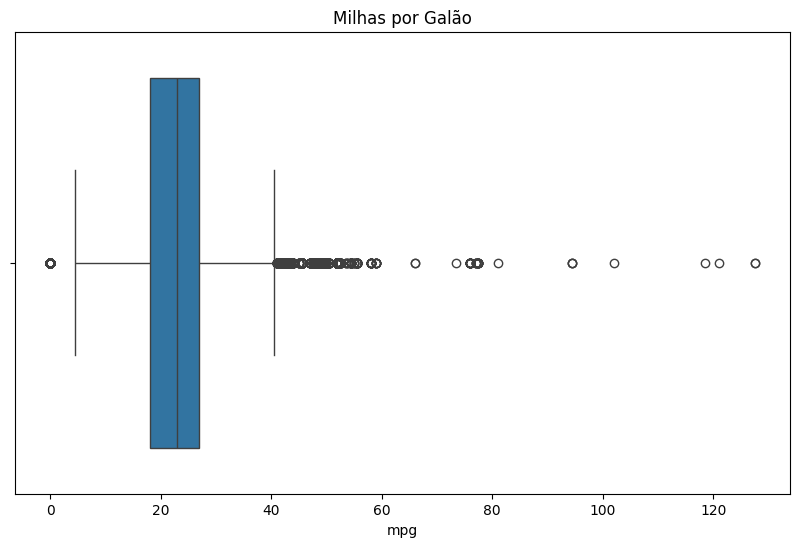

In [131]:
# Existem muitos outliears na coluna
# Criação do gráfico de caixa
plt.figure(figsize=(10, 6))
sns.boxplot(x='mpg', data=null_zero)
plt.title('Milhas por Galão')
plt.show()

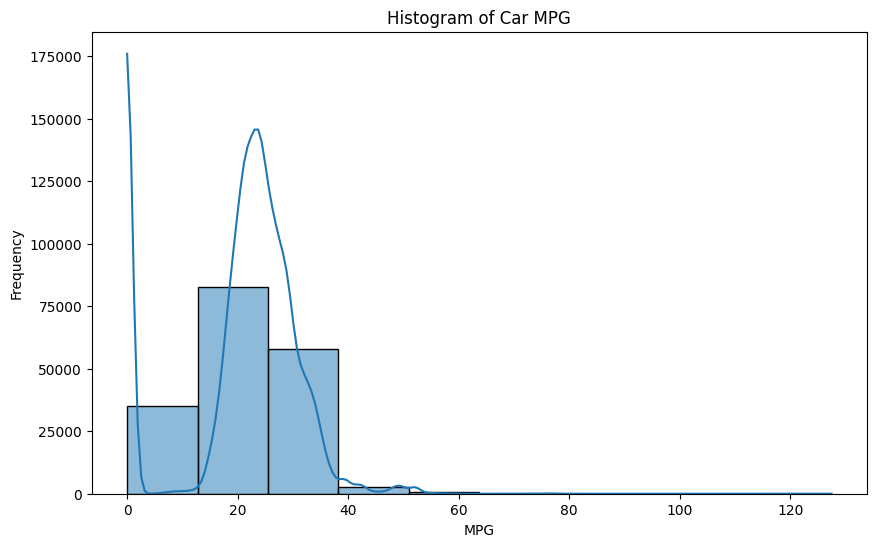

In [132]:
# Histograma confirma os dados acima
# Um histtograma razoável se não fosse o zero
# Criação do histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=null_zero, x='mpg', bins=10, kde=True)
plt.title('Histogram of Car MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

In [133]:
# Converter todos os valores da coluna 'mpg' para float
null_zero['mpg'] = pd.to_numeric(null_zero['mpg'], errors='coerce')

# Calculando a mediana dos valores não nulos na coluna 'mpg'
median_mpg = null_zero['mpg'].median()

# Substitua os valores zero na coluna 'mpg' pela mediana
null_zero['mpg'] = null_zero['mpg'].replace(0, median_mpg)

In [134]:
# Não temos mais valores 0
null_zero.mpg.describe()

count    179125.000000
mean         24.667940
std           5.350712
min           4.500000
25%          22.000000
50%          23.000000
75%          27.000000
max         127.500000
Name: mpg, dtype: float64

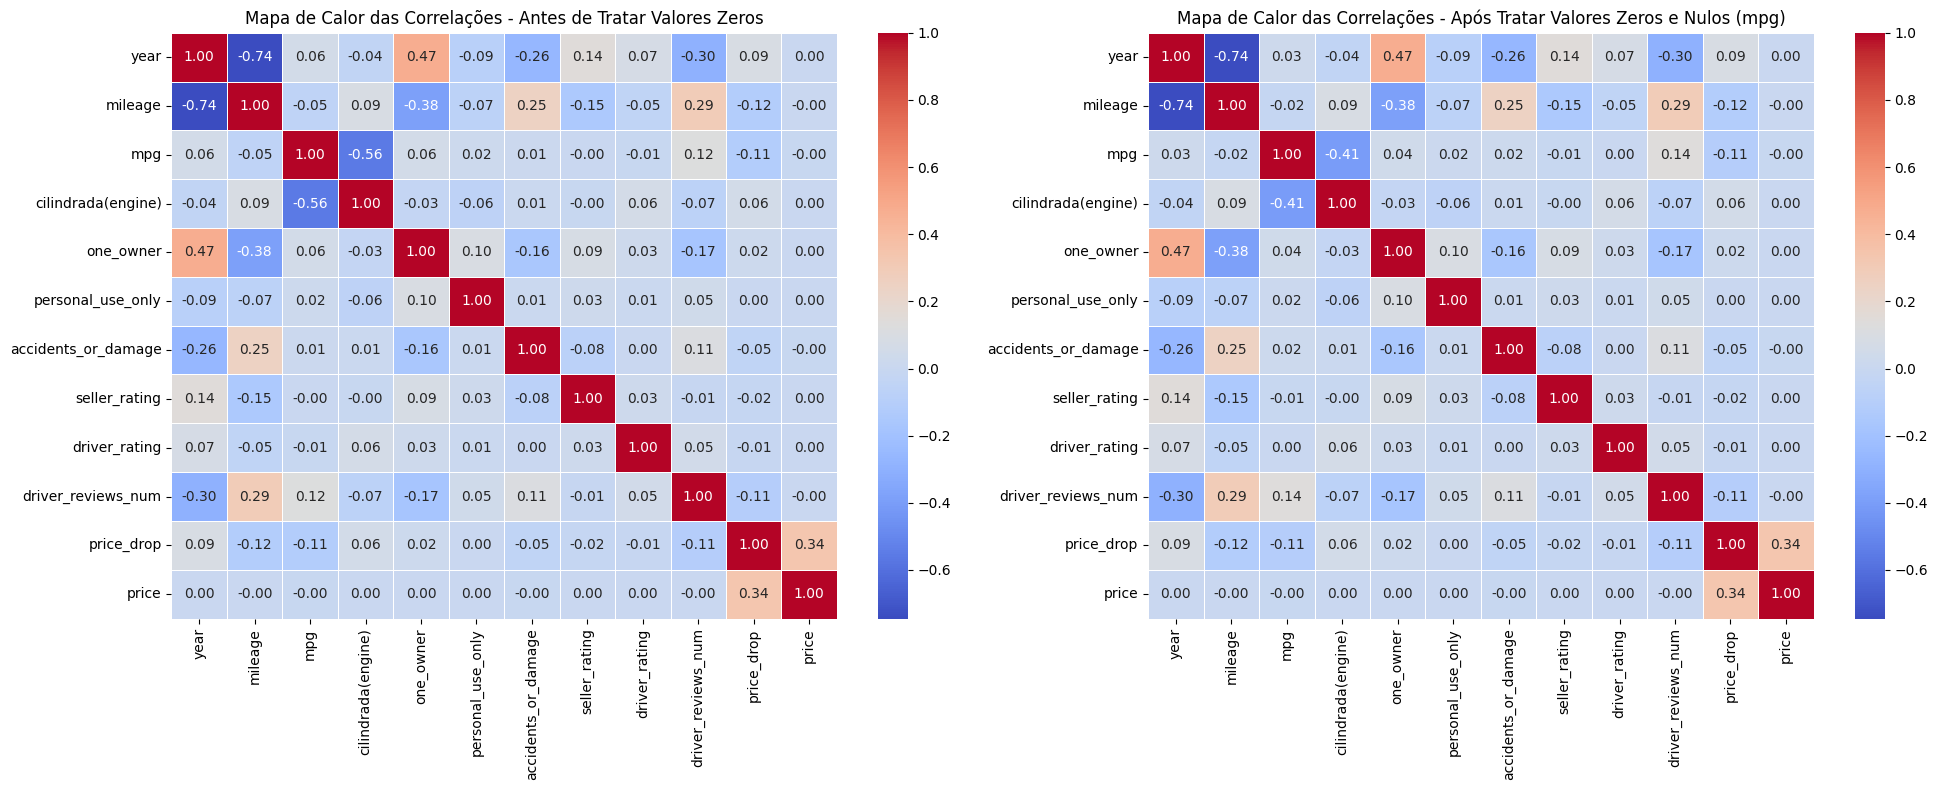

In [135]:
# Análise da Variavel antes e depois de tratar zero e nulos (Correlação de Pearson)
# Teve uma leve queda na relação entre a coluna mpg e demais variáveis com o tratamento do zero e nulos, péssimo
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = null_mpg[['year', 'mileage', 'mpg', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = null_zero[['year', 'mileage', 'mpg', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Valores Zeros')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Valores Zeros e Nulos (mpg)')

plt.tight_layout()
plt.show()

### Correlação Tratando Outliears

In [136]:
# Vamos fazer uma correlação tratando outliears e verificar se isso influência ou não nossa correlação
# Criando dataframe
outliears_mpg = null_zero.copy()

In [137]:
# Definindo os percentis 
lower_percentile = 5
upper_percentile = 95

# Cálculo doa valores de corte
lower_cutoff = np.percentile(outliears_mpg['mpg'], lower_percentile)
upper_cutoff = np.percentile(outliears_mpg['mpg'], upper_percentile)

# Substituindo valores extremos 
outliears_mpg['mpg'] = np.where(outliears_mpg['mpg'] < lower_cutoff, lower_cutoff, null_zero['mpg'])
outliears_mpg['mpg'] = np.where(outliears_mpg['mpg'] > upper_cutoff, upper_cutoff, null_zero['mpg'])

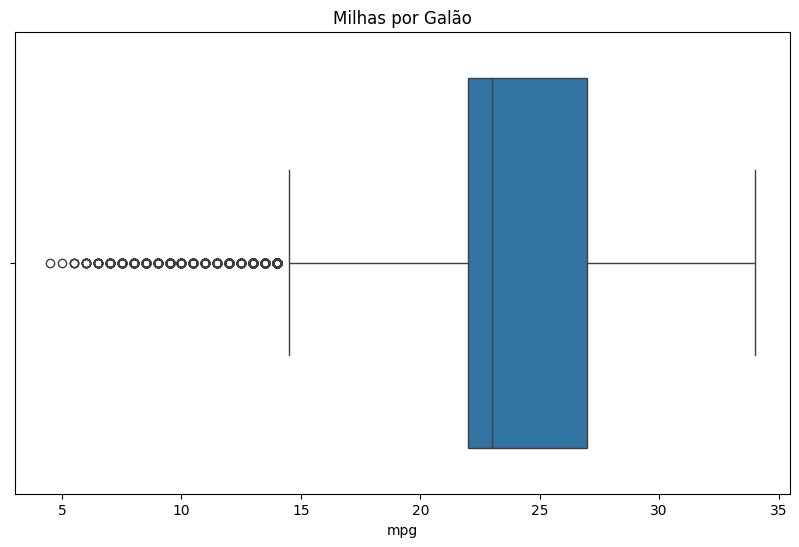

In [138]:
# Existem muitos outliears na coluna
# Criação do gráfico de caixa
plt.figure(figsize=(10, 6))
sns.boxplot(x='mpg', data=outliears_mpg)
plt.title('Milhas por Galão')
plt.show()

In [139]:
# Temos 800 registros causando outliears
outliears_mpg[outliears_mpg['mpg']<= 14].shape

(886, 20)

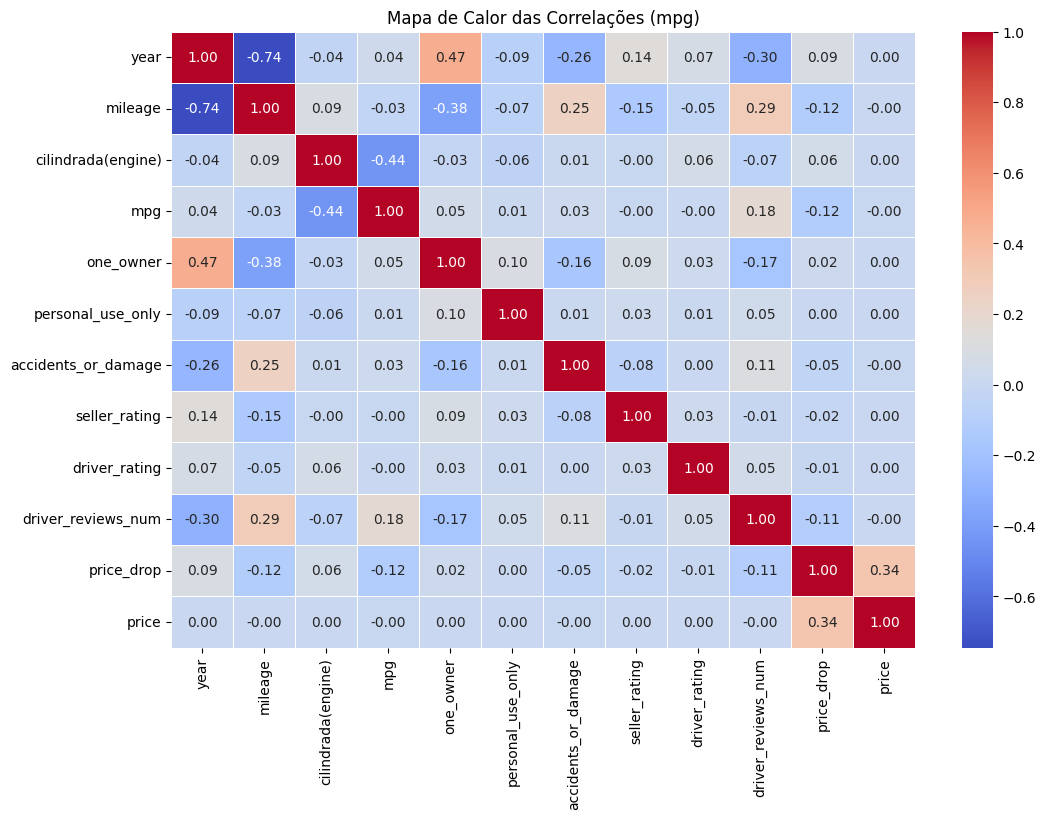

In [140]:
# Com a eliminação de alguns outliears, podemos observar um leve aumento na correlação, mas não o suficiente 
# Calcular a matriz de correlação
correlation_matrix = outliears_mpg[['year', 'mileage', 'cilindrada(engine)', 'mpg', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das Correlações (mpg)')
plt.show()

In [141]:
# Vamos eliminar os 800 registros que causam outliears
outliears_mpg1 = outliears_mpg[outliears_mpg['mpg'] >= 15]
outliears_mpg1.shape

(178022, 20)

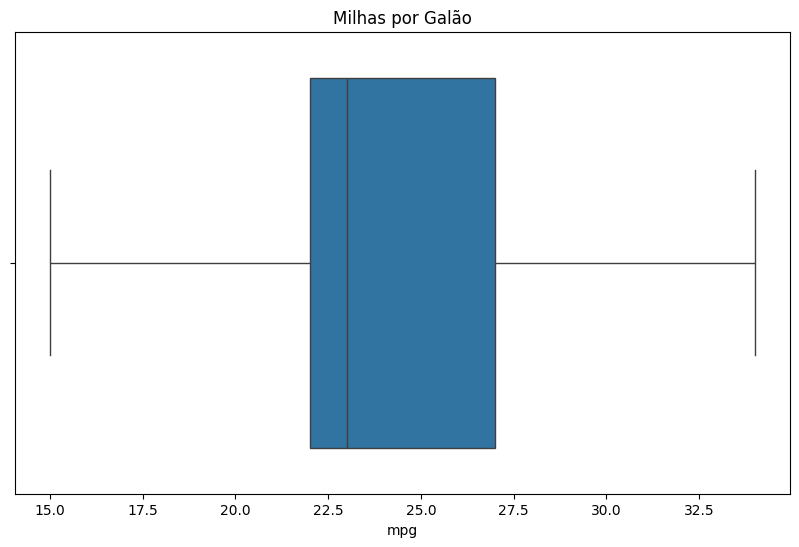

In [142]:
# Sem outliears
# Criação do gráfico de caixa
plt.figure(figsize=(10, 6))
sns.boxplot(x='mpg', data=outliears_mpg1)
plt.title('Milhas por Galão')
plt.show()

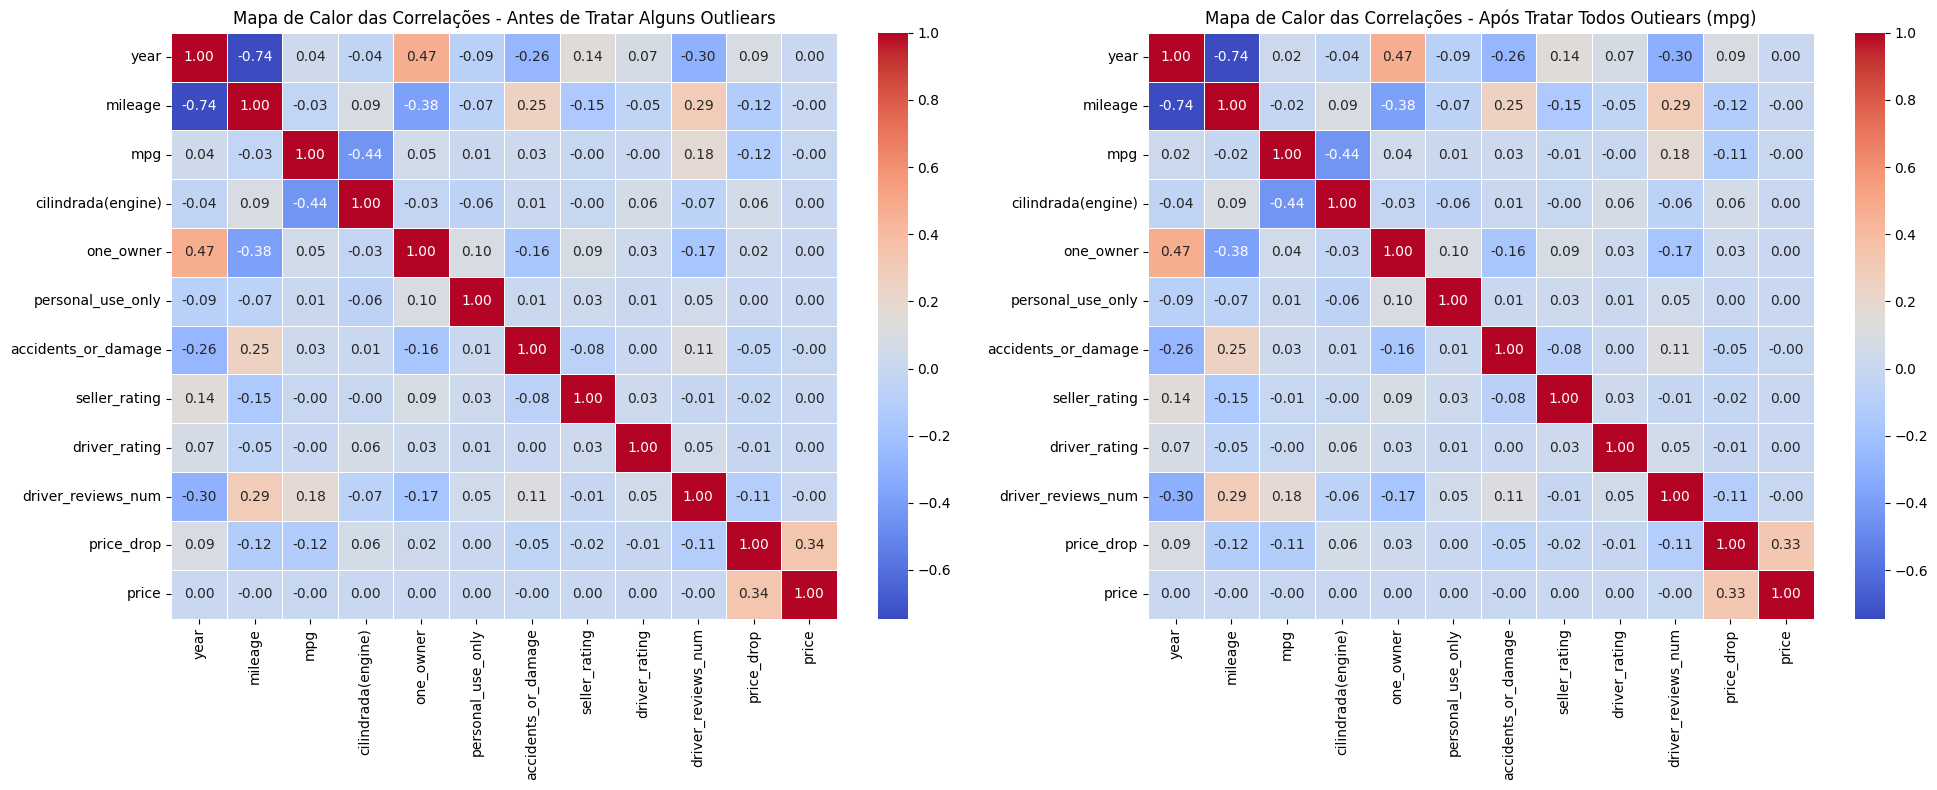

In [143]:
# Não mudou praticamente nada
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = outliears_mpg[['year', 'mileage', 'mpg', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = outliears_mpg1[['year', 'mileage', 'mpg', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Alguns Outliears')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Todos Outiears (mpg)')

plt.tight_layout()
plt.show()

### Análise minusciosa para exclusão ou não da variável 'mpg'

In [144]:
# Antes de tratar qualquer dado, vou fazer uma correlação entre coluna mpg e coluna price

# Sem tratamentos
correlation = cars_amos1['mpg'].corr(cars_amos1['price'])
print("Correlação de Pearson entre mpg e price sem tratamento:", correlation)

# Com tratamento dos zeros
correlation = zero_mpg['mpg'].corr(zero_mpg['price'])
print("Correlação de Pearson entre mpg e price com valores zero tratados:", correlation)

# Com tratamento dos valores nulos
correlation = null_mpg['mpg'].corr(null_mpg['price'])
print("Correlação de Pearson entre mpg e price com valores nulos tratados:", correlation)

# Com tratamento dos valores zeros e nulos
correlation = null_zero['mpg'].corr(null_zero['price'])
print("Correlação de Pearson entre mpg e price com valores nulos e zeros:", correlation)

# Com tratamento de outliears
correlation = outliears_mpg1['mpg'].corr(outliears_mpg1['price'])
print("Correlação de Pearson entre mpg e price com tratamento de valores nulos:", correlation)

Correlação de Pearson entre mpg e price sem tratamento: -0.003906770919309372
Correlação de Pearson entre mpg e price com valores zero tratados: -0.004071291384964279
Correlação de Pearson entre mpg e price com valores nulos tratados: -0.003906770919309372
Correlação de Pearson entre mpg e price com valores nulos e zeros: -0.0042303297189046135
Correlação de Pearson entre mpg e price com tratamento de valores nulos: -0.004735545980135231


Todas essas correlações são próximas de zero, o que indica uma correlação muito fraca entre as duas variáveis, independentemente do tratamento. Isso pode significar que não há uma relação linear significativa entre a economia de combustível (mpg) e o preço do carro (price) nos seus dados.

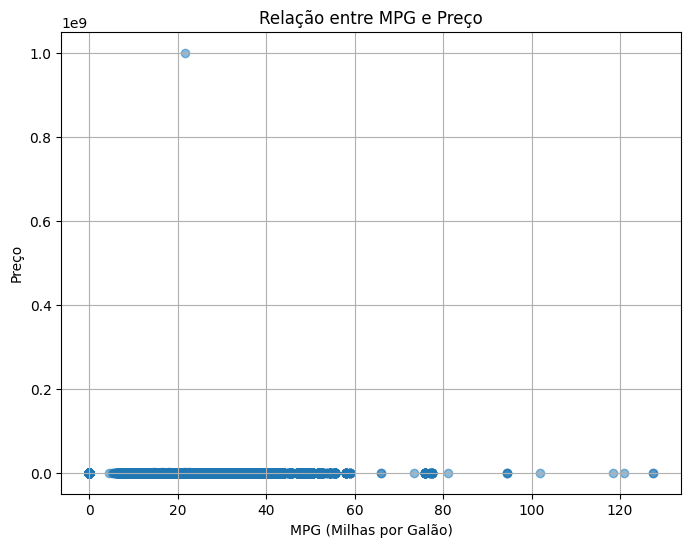

In [145]:
# Todos os valores estão próximos de zero, indicando uma correlação entre as variaveis fraca
# O resultado indica que a coluna mpg não influencia os preços ou sua influência é muito fraca
# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(cars_amos1['mpg'], cars_amos1['price'], alpha=0.5)
plt.title('Relação entre MPG e Preço')
plt.xlabel('MPG (Milhas por Galão)')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

In [146]:
# Depois de todas essas análises, cheguei a seguinte conclusão: Excluir a coluna 'mpg'
# Fatores que me levam a esta atitude
# Fator 1: Existem muitos registros nulos, o que prejudica a precisão dos valores
# Fator 2: Os valores contidos na coluna mpg são irregulares devido a seus intervalos e registros atípicos
# Fator 3: Ao substituir esses valores pela média de seus intervalos criamos muitos outliears
# Fator 4: Outliears na coluna mpg são incoerentes por se tratar da eficiência do veículo, valores extremos não representam a realidade da capacidade do carro
# Fator 5: Substituir outiliears por qualquer valor (média, mediana, etc) poderá distorcer a realidade dos veículos
# Fator 6: Com base nas análises sobre teste t, regressão, correlação, a coluna mpg só é util se tiver outras variáveis
# Fator 7: Poderia mantê-la como uma variável independente, no entanto, os fatores acima prejudicam a confiança nesta coluna
cars_amos1 = cars_amos1.drop('mpg', axis=1)

## Coluna 10 'exterior_color' (Cor Externa)

Exterior_color (Variavel Categoria Nominal)

In [147]:
# Variavel Categoria Nominal - sem ordem e não mensurável
cars_amos1.exterior_color.value_counts().head(60)

exterior_color
black                                 13890
white                                 12134
gray                                   7006
silver                                 5282
summit white                           4088
blue                                   3771
bright white clearcoat                 3334
red                                    3225
oxford white                           2040
gun metallic                           1912
granite crystal clearcoat metallic     1662
polar white                            1364
alpine white                           1325
billet silver metallic clearcoat       1305
satin steel metallic                   1166
black sapphire metallic                1114
silver ice metallic                    1099
pure white                             1090
onyx black                             1076
crystal black pearl                    1042
shadow black                           1041
crystal white pearl                    1034
modern steel meta

In [148]:
# Poucos registros nulos
cars_amos1.exterior_color.isnull().sum()

1932

In [149]:
# Função para tornar as categorias mais amplas e ver as cores mais frequentes
def update_exterior_color(value):
    if pd.isnull(value):  # Verificar se é nulo
        return 'unspecified'  # Se for nulo, retornar 'unspecified'
    
    value_lower = value.lower() if isinstance(value, str) else None
    
    color_mappings = {
        'black': ['black', 'caviar'],
        'white': ['white'],
        'red': ['red', 'burgundy', 'scarlet'],
        'grey': ['gray', 'grey', 'graphite', 'metal', 'smoke'],
        'green': ['green', 'cactus'],
        'silver': ['silver', 'platinum', 'titanium'],
        'blue': ['blue'],
        'maroon': ['maroon', 'brown', 'billet'],
        'orange': ['orange'],
        'pearl': ['pearl', 'purple'],
        'yellow': ['yellow', 'gold', 'bronze', 'tan']
    }
    
    for color, keywords in color_mappings.items():
        if any(keyword in value_lower for keyword in keywords):
            return color
    
    return 'unspecified'

# Aplicar a função de atualização à coluna 'exterior_color'
cars_amos1['exterior_color'] = cars_amos1['exterior_color'].apply(update_exterior_color)


In [150]:
# Podemos ver com mais clareza com paleta de cores mais comuns, o modelo de regressão será mais preciso
cars_amos1.exterior_color.value_counts().head(60)

exterior_color
grey           50792
white          43061
black          38359
red            14153
blue           10005
silver          9649
unspecified     7184
pearl           2424
maroon          1042
green            961
yellow           877
orange           618
Name: count, dtype: int64

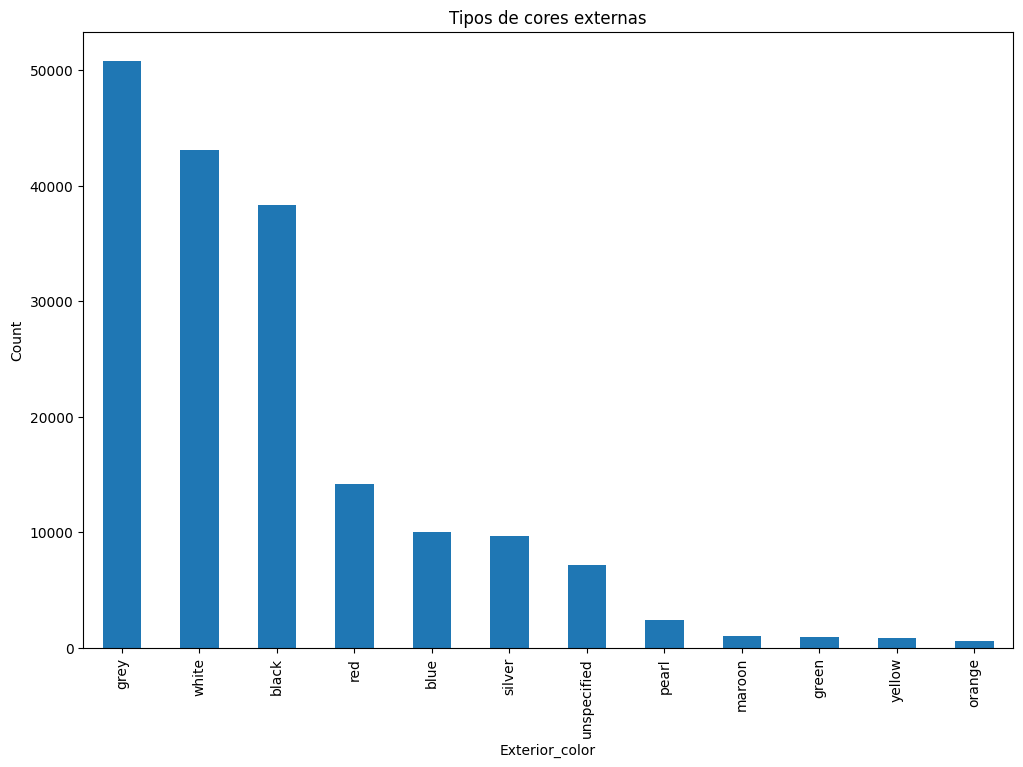

In [151]:
# Separando a coluna exterior_color para criar um gráfico
exterior_color = cars_amos1['exterior_color'].value_counts()

# Podemos observar que a maioria dos veículos tem cor cinza, preta e branca
# A cor pode influenciar o valor do carro, a cor vermelha é a que contém mais valor, outras cores valorizadas são branco, prata, preto e cinza
# As cores mais valorizadas são as mais frequentes
# Construindo um gráfico de cores
plt.figure(figsize=(12, 8))
exterior_color.head(12).plot(kind='bar')
plt.xlabel('Exterior_color')
plt.ylabel('Count')
plt.title('Tipos de cores externas')
plt.show()

## Coluna 11 'interior_color' (Cor Interna )

Interior_color (Variavel Categorica Nominal)

In [152]:
# Variavel Categoria Nominal - sem ordem e não mensurável
cars_amos1.interior_color.unique()

array(['ebony', 'almond', 'brown/black', ..., 'blue pearl',
       'designo crystal gray', 'vitra gray/black'], dtype=object)

In [153]:
# Podemos observar que as cores mais comuns predominam
cars_amos1.interior_color.value_counts().head(60)

interior_color
black                      69691
jet black                  11445
gray                       10540
ebony                       9229
charcoal                    6436
graphite                    3537
beige                       3251
titan black                 2301
tan                         1705
charcoal black              1467
diesel gray / black          934
ivory                        933
red                          927
parchment                    866
ash                          837
brown                        777
ebony black                  642
wheat                        612
light gray                   610
ebony / ebony                591
medium earth gray            585
black onyx                   549
global black                 535
cognac                       510
macchiato beige              470
medium light stone           443
black / graphite             431
black / light graystone      417
dark gray                    410
white                       

In [154]:
# Temos mais de 12 mil dados nulos, vamos substituir por valores inespecíficos
cars_amos1.interior_color.isnull().sum()

12684

In [155]:
# Tornei as categorias de cores internas mais amplas com cores mais frequentes através desta função
def categorizar_cores(value):
    if pd.isnull(value):  # Verificar se é nulo
        return 'unspecified'  # Se for nulo, retornar 'unspecified'
    
    value_lower = value.lower() if isinstance(value, str) else None
    
    color_mappings = {
        'black': ['black', 'ebony', 'charcoal'],
        'gray': ['gray', 'grey', 'graphite', 'steel', 'pewter', 'ash', 'dark galvanized', 'medium stone', 'dark atmosphere', 'dark ash'],
        'beige': ['beige', 'wheat', 'camel', 'taupe'],
        'brown': ['brown', 'cocoa', 'mocha', 'cappuccino', 'espresso', 'dark walnut'],
        'white': ['white', 'ivory', 'cream', 'almond', 'sandstone', 'oyster', 'stone', 'moonstone'],
        'blue': ['blue'],
        'red': ['red'],
        'tan': ['tan'],
        'parchment': ['parchment'],
        'cognac': ['cognac'],
        'medium light stone': ['medium light stone'],
        'sport': ['sport'],
        'cement': ['cement'],
        'cocoa / dune': ['cocoa / dune'],
        'light neutral': ['light neutral'],
        'dark palazzo': ['dark palazzo'],
        'medium pewter': ['medium pewter'],
        'dark walnut': ['dark walnut'],
        'alloy': ['alloy'],
        'cashmere': ['cashmere'],
        'cirrus': ['cirrus'],
        'dark walnut': ['dark walnut'],
        'flaxen': ['flaxen'],
        'medium soft ceramic': ['medium soft ceramic']
    }
    
    for color, keywords in color_mappings.items():
        if any(keyword in value_lower for keyword in keywords):
            return color
    
    return 'unspecified' 

# Aplicar a função de categorização à coluna 'interior_color'
cars_amos1['interior_color'] = cars_amos1['interior_color'].apply(categorizar_cores)

In [156]:
# Cor black predomina, não categorizei ainda mais devido a variação de preços
cars_amos1.interior_color.value_counts().head(60)

interior_color
black                  113724
gray                    22265
unspecified             19367
beige                    7306
brown                    4602
white                    4120
tan                      2278
red                      2106
parchment                 894
cognac                    539
sport                     433
cement                    310
light neutral             265
blue                      243
cirrus                    174
alloy                     139
medium soft ceramic       127
dark palazzo              120
flaxen                    113
Name: count, dtype: int64

## Coluna 12 'accidents_or_damage' (Envolvimento em Acidentes)

Accidents_or_damage (Variavel Categórica Ordinal)

In [157]:
# Variavel Categórica Ordinal  1 = sim e 0 = não
# Podemos confirmar que a maioria dos veículos não tiveram envolvimento em acidentes
# Dados nulos foi o menor valor
np.unique(cars_amos1['accidents_or_damage'], return_counts=True)

(array([ 0.,  1., nan]), array([135109,  38794,   5222], dtype=int64))

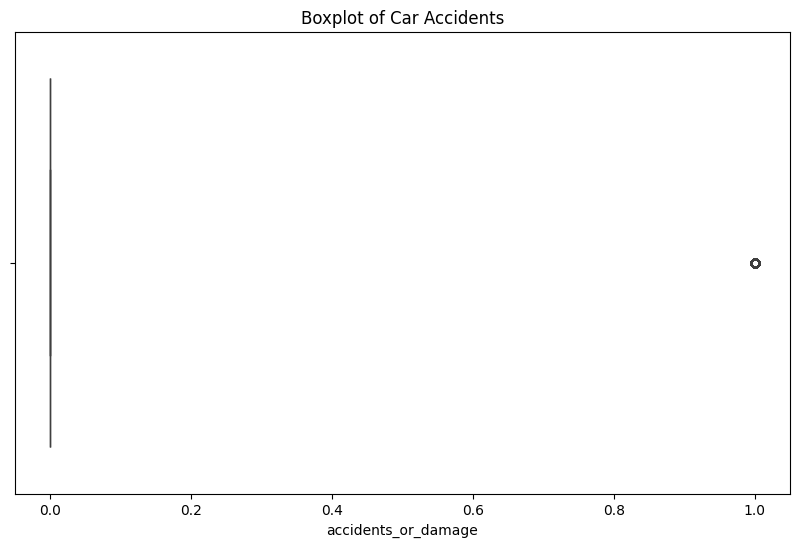

In [158]:
# A maioria dos valores são zeros (não)
# O 1 é um outlier
# Não vou remover porque a coluna representa envolvimento em acidentes e 1 (sim, se envolveu em acidentes) é um parametro para regressão
plt.figure(figsize=(10, 6))
sns.boxplot(x='accidents_or_damage', data=cars_amos1)
plt.title('Boxplot of Car Accidents')
plt.show()

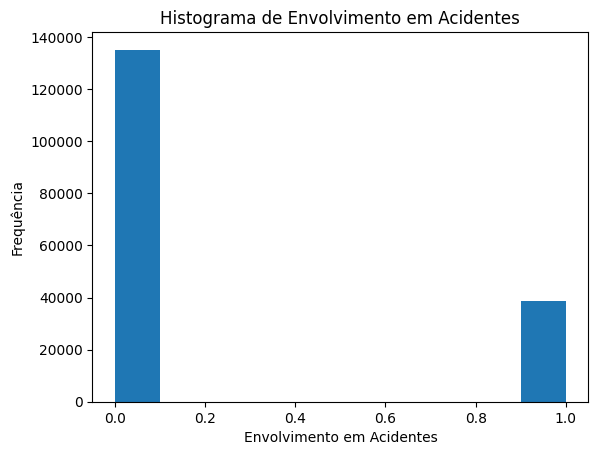

In [159]:
# Podemos ver que muitos dos veículos não sofreram acidentes, um resultado positivo
# Veículos que sofreram acidentes podem ter seus valores afetados
plt.hist(x=cars_amos1['accidents_or_damage'])
plt.xlabel('Envolvimento em Acidentes')
plt.ylabel('Frequência')
plt.title('Histograma de Envolvimento em Acidentes')

plt.show()

In [160]:
# Vou substituir valores nulos por 2, fugindo do padrão de classificação entre 0 e 1
# Futuramente, esses valores 2 serão apresentados ao meu modelo de regressão
# Não vou excluir por serem muitos
cars_amos1.accidents_or_damage.isnull().sum()

5222

### Correlação com Valores nulos

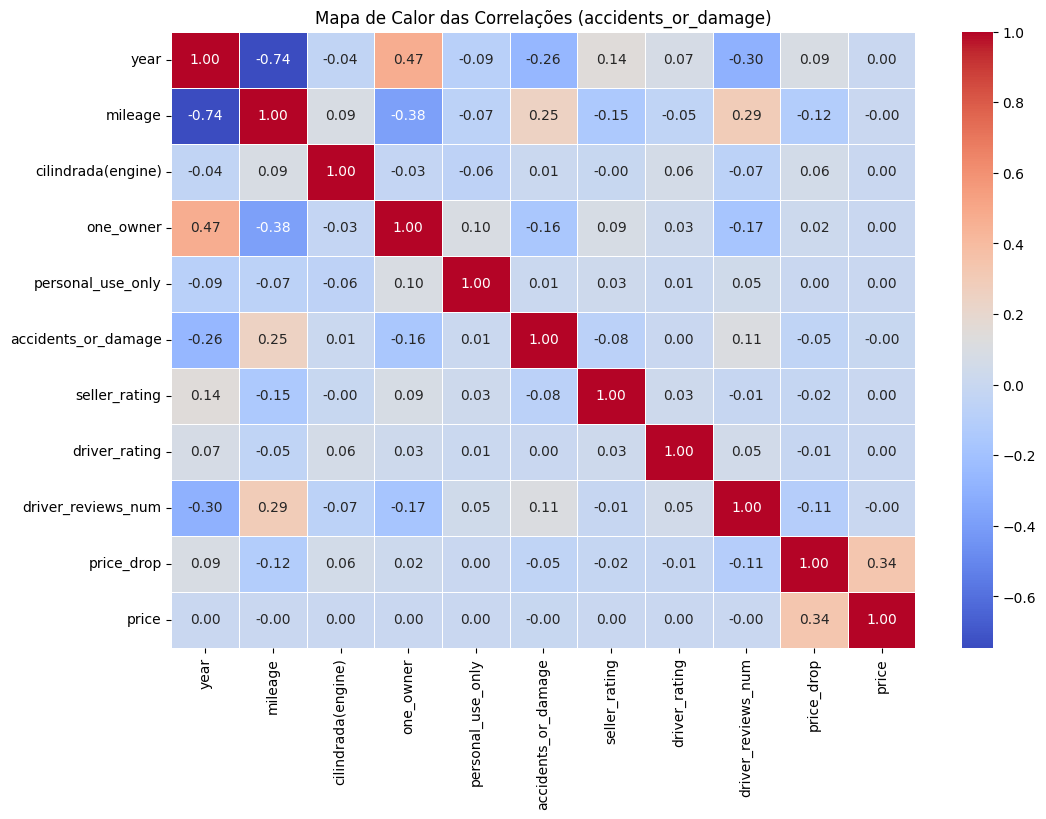

In [161]:
# Tamos uma correlação mais significativa entre a coluna accidents e year e mileage, ainda sim é fraca
# Calcular a matriz de correlação
correlation_matrix = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das Correlações (accidents_or_damage)')
plt.show()

### Correlação Tratando Valores Nulos

In [162]:
# Criando um dataframe
accidents_null = cars_amos1.copy()

In [163]:
# Substituir valores nulos por 2 na coluna 'accidents_or_damage'
accidents_null['accidents_or_damage'] = accidents_null['accidents_or_damage'].fillna(2)

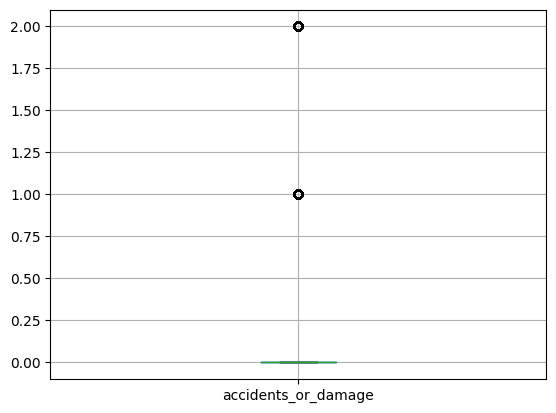

In [164]:
# 1 e 2 se tornaram outliears
accidents_null.boxplot(column=['accidents_or_damage'])
plt.show()

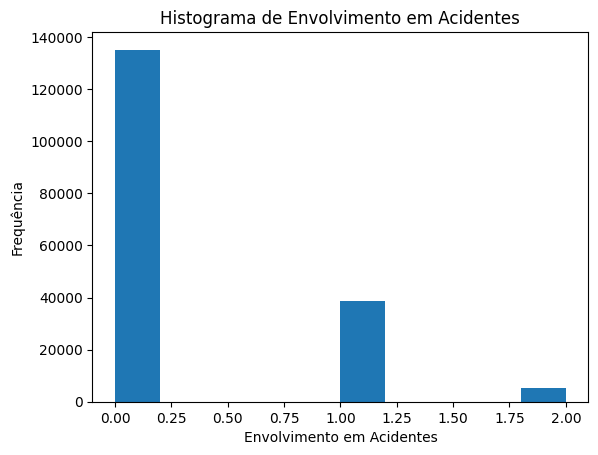

In [165]:
# Em comparação aos valores 1 e 0, o 2 representa muito pouco
plt.hist(x=accidents_null['accidents_or_damage'])
plt.xlabel('Envolvimento em Acidentes')
plt.ylabel('Frequência')
plt.title('Histograma de Envolvimento em Acidentes')
plt.show()

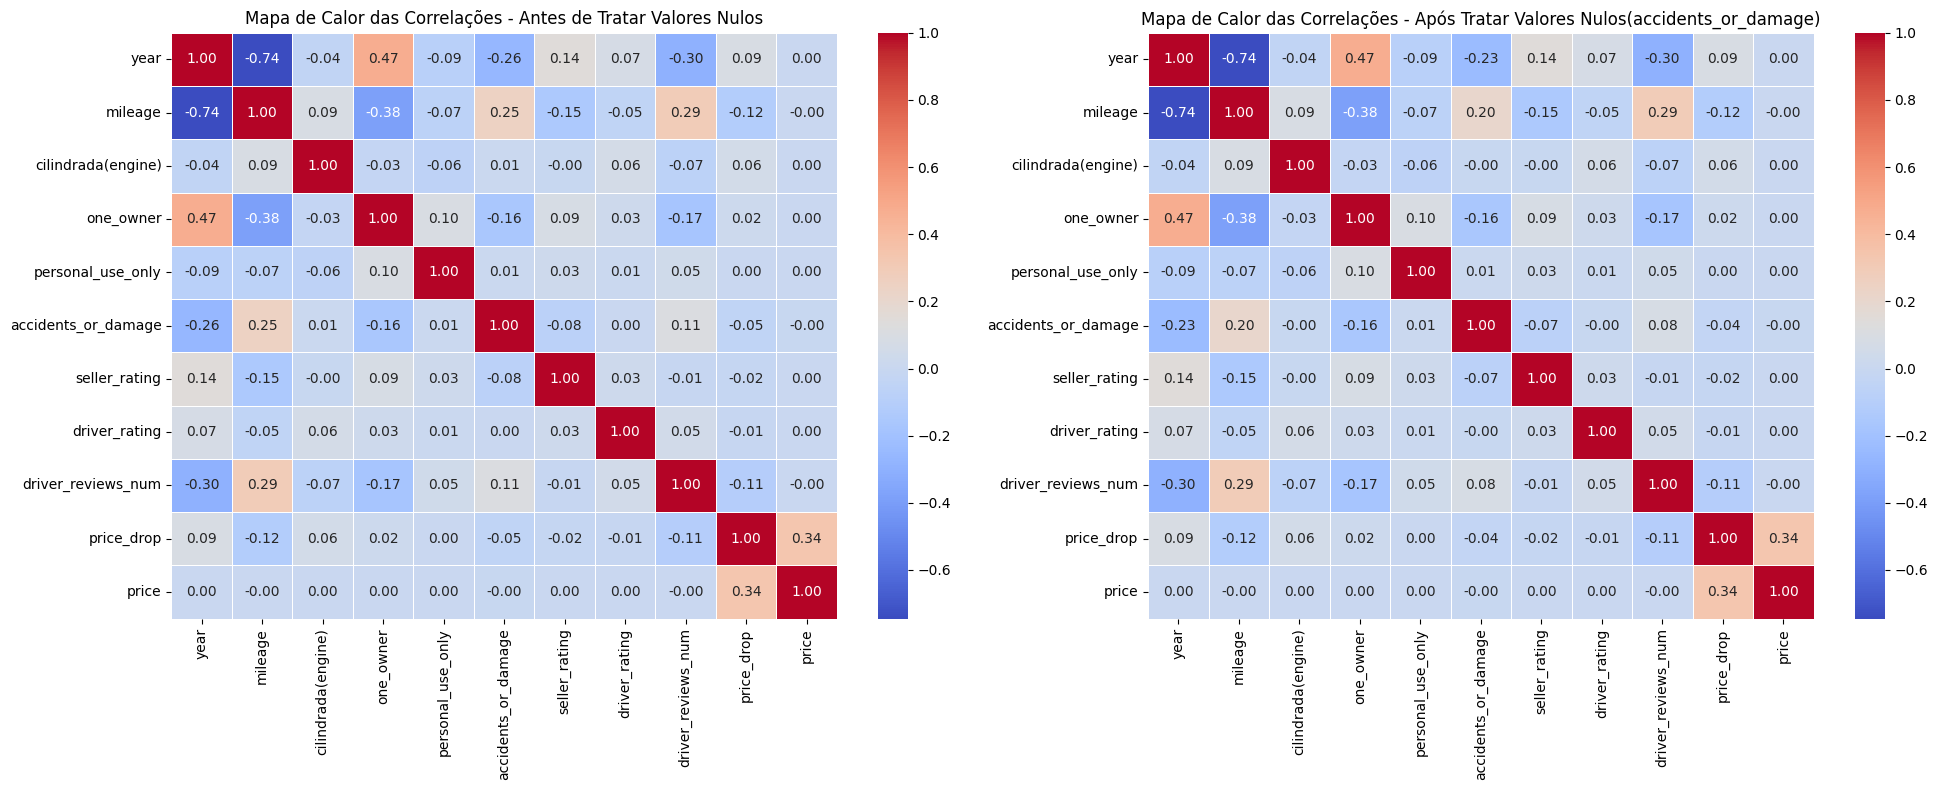

In [166]:
# Perdemos eficiência na correlação após substituição doa valores nulos por dois
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = accidents_null[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Valores Nulos')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Valores Nulos(accidents_or_damage)')

plt.tight_layout()
plt.show()

### Correlação Usando Mediana em Valores Nulos

In [167]:
# Criando um novo dataframe
median_accidents = cars_amos1.copy()

In [168]:
# Calculando a mediana da coluna "accidents_or_damage"
median_accidents_or_damage = cars_amos1['accidents_or_damage'].median()

# Substituindo os valores nulos pela mediana
median_accidents['accidents_or_damage'] = median_accidents['accidents_or_damage'].fillna(median_accidents_or_damage)


In [169]:
# Temos apenas valores 0 e 1
median_accidents.accidents_or_damage.unique()

array([0., 1.])

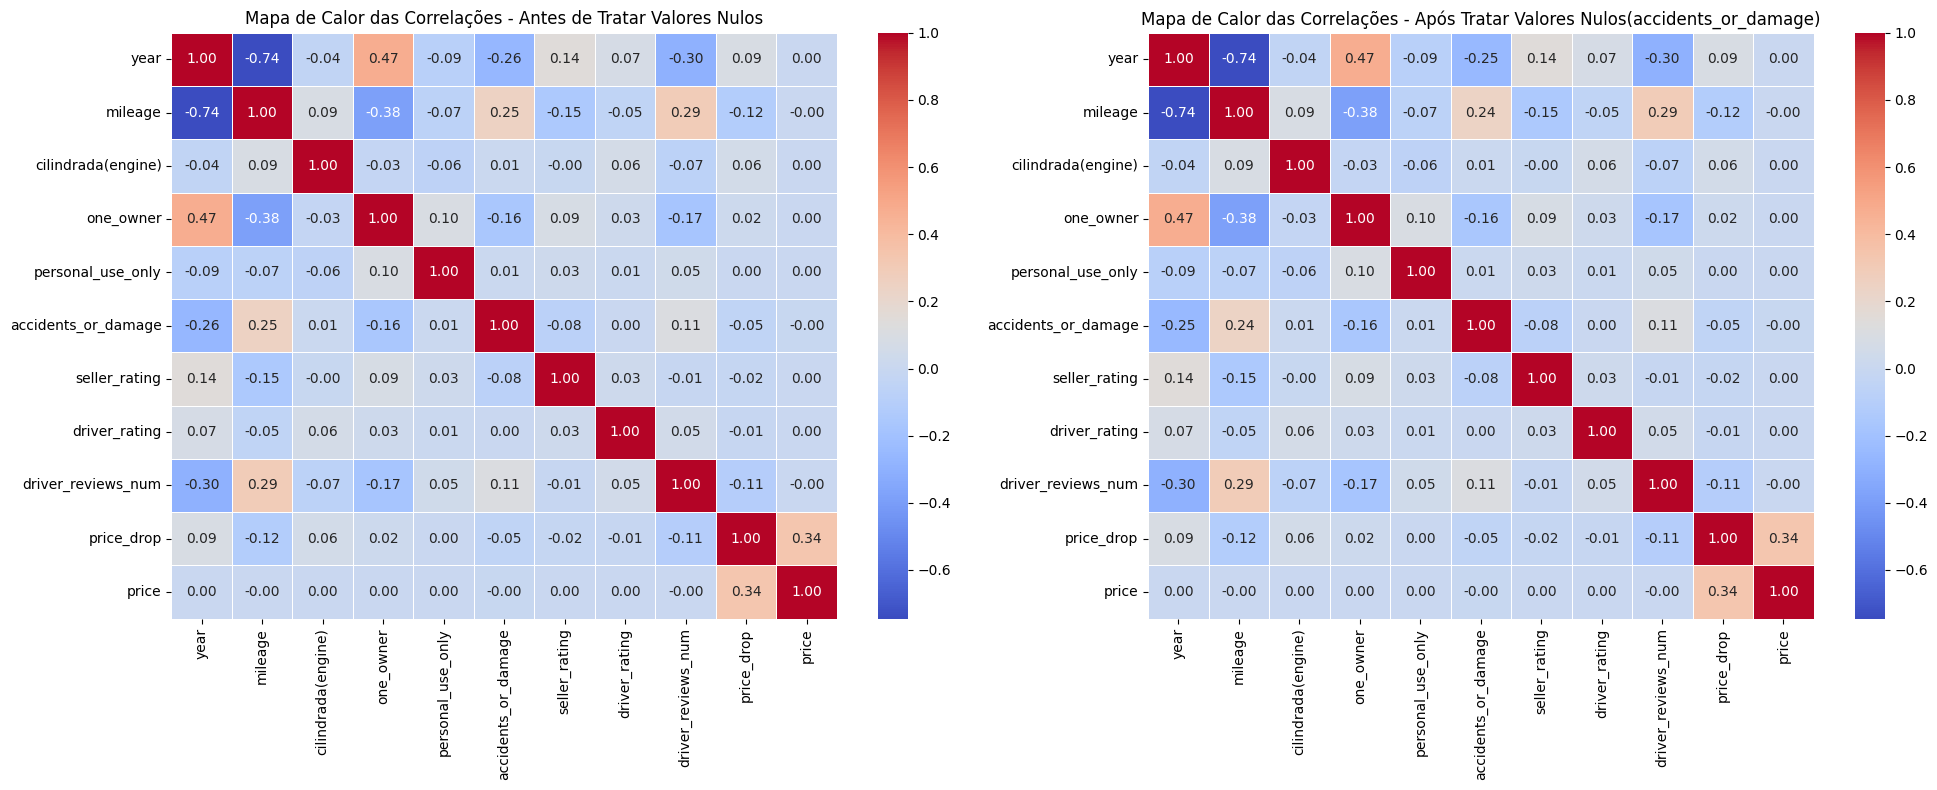

In [170]:
# Poucas mudanças, vou manter desse jeito
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = median_accidents[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Valores Nulos')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Valores Nulos(accidents_or_damage)')

plt.tight_layout()
plt.show()

In [171]:
# Substituindo valores nulos no dataframe original
# Escolha da mediana por ser um metodo mais robusto

# Substituindo os valores nulos pela mediana no dataframe original
cars_amos1['accidents_or_damage'] = cars_amos1['accidents_or_damage'].fillna(median_accidents_or_damage)


## Coluna 13 'one_owner' (Unico Dono)

One_owner (Variavel Categórica Nominal)

In [172]:
# Variavel Categórica Ordinal 1 = sim e 0 = não
# 71.881 registros com o valor 0 (indicando que o veículo não teve apenas um proprietário)
# 100.776 registros com o valor 1 (indicando que o veículo tem apenas um proprietário)
# 6.468 registros com valores nulos
np.unique(cars_amos1['one_owner'], return_counts=True)

(array([ 0.,  1., nan]), array([ 71881, 100776,   6468], dtype=int64))

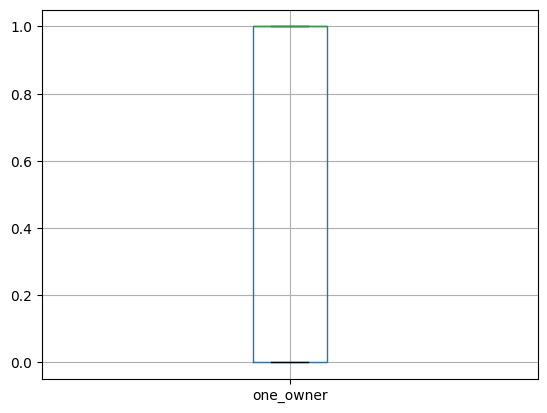

In [173]:
# Nenhum outilier, até certo ponto, os dados estão distribuídos de modo equilibrado
cars_amos1.boxplot(column=['one_owner'])
plt.show()

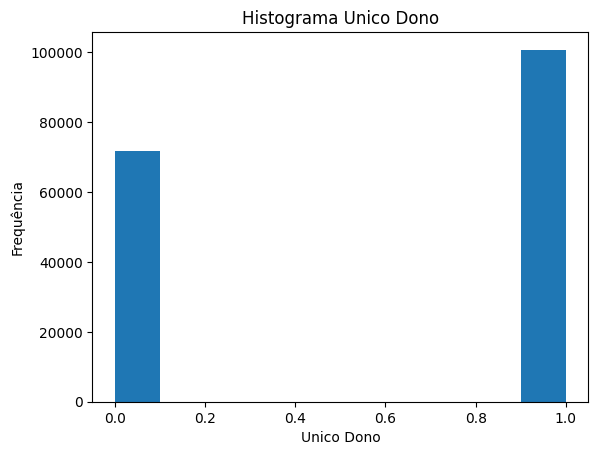

In [174]:
# Como vimos no gráfico anterior, os dados estão razoavelmente bem distrbuídos
# Maioria dos veículos tiveram um único dono, uma informação que contribui para o preço
plt.hist(x=cars_amos1['one_owner'])
plt.xlabel('Unico Dono')
plt.ylabel('Frequência')
plt.title('Histograma Unico Dono')
plt.show()

### Correlação com Tratamentos Nulos

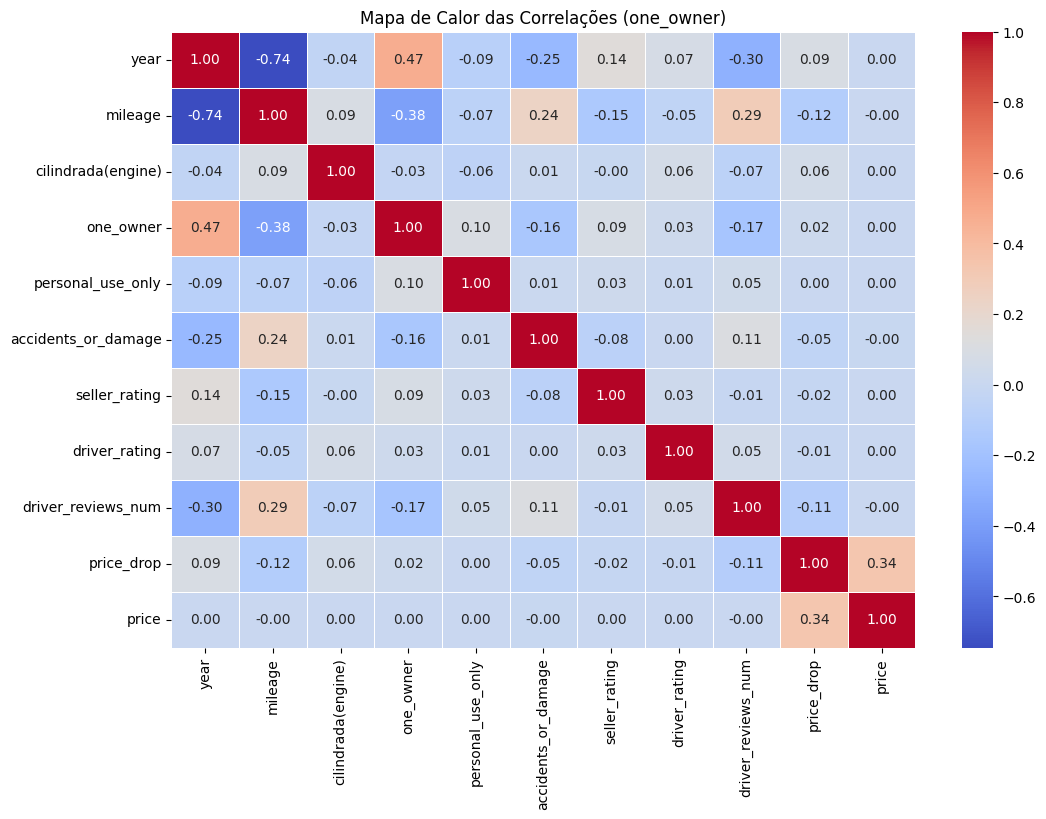

In [175]:
# Observamos que existe uma correlaçao positiva moderada entre a variavel one_ower e year
# Significa que carros com anos mais recentes possuem unico dono
# Calcular a matriz de correlação
correlation_matrix = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das Correlações (one_owner)')
plt.show()

### Correlação Tratando Valores Nulos pela Mediana

In [176]:
# Optei ir direto neste método devido a experiência da coluna anterior sobre acidentes
# Criando dataframe
one_owner = cars_amos1.copy()

In [177]:
# Calculando a mediana da coluna "accidents_or_damage"
median_one_owner = cars_amos1['one_owner'].median()

# Substituindo os valores nulos pela mediana
one_owner['one_owner'] = one_owner['one_owner'].fillna(median_one_owner)


In [178]:
# Não temos mais valores nulos
one_owner.one_owner.unique()

array([1., 0.])

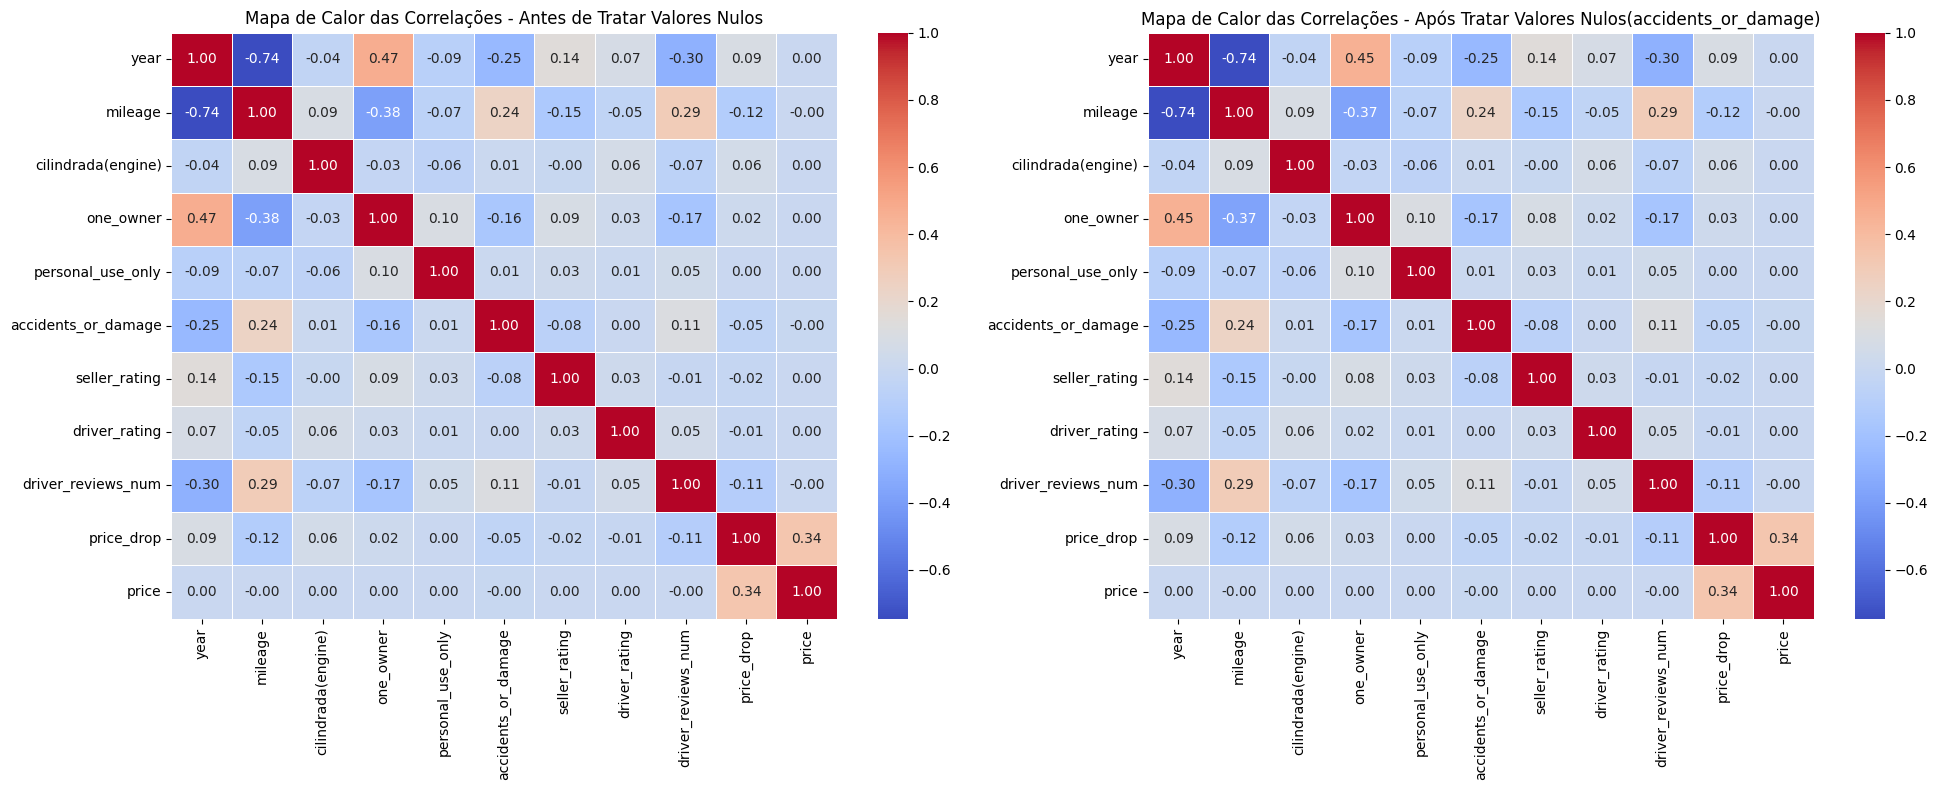

In [179]:
# Poucas mudanças, vou manter desse jeito
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = one_owner[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Valores Nulos')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Valores Nulos(accidents_or_damage)')

plt.tight_layout()
plt.show()

In [180]:
# Substituindo valores nulos no dataframe original
# Escolha da mediana por ser um metodo mais robusto

# Substituindo os valores nulos pela mediana no dataframe original
cars_amos1['one_owner'] = cars_amos1['one_owner'].fillna(median_one_owner)


## Coluna 14 'personal_use_only' (Apenas Uso Pessoal)

Personal_use_only (Variavel Categórica Ordinal)

In [181]:
# Variavel Categórica Ordinal 1 = sim e 0 = não
# Veículos de uso pessoal são quase 2 vezes maior que não uso pessoal
# Alguns dados nulos 
np.unique(cars_amos1['personal_use_only'], return_counts=True)

(array([ 0.,  1., nan]), array([ 60655, 113231,   5239], dtype=int64))

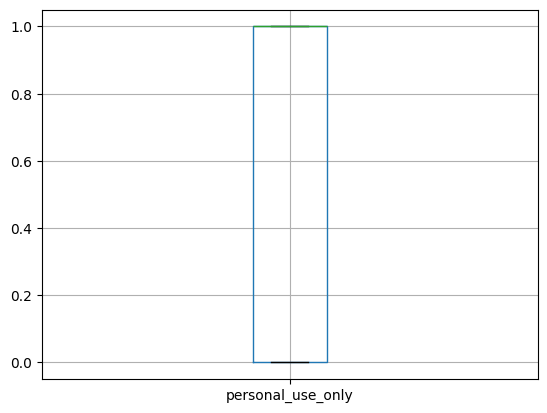

In [182]:
# Nenhum outilier, até certo ponto, os dados estão distribuídos de modo equilibrado
cars_amos1.boxplot(column=['personal_use_only'])
plt.show()

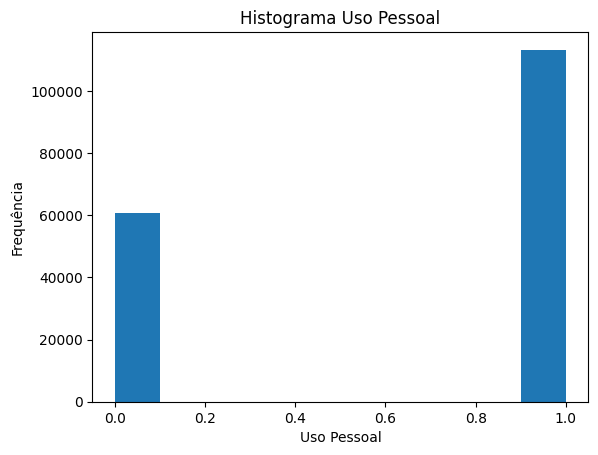

In [183]:
# Como vimos no gráfico anterior, os dados estão razoavelmente bem distrbuídos
# Praticamente, metade dos veículos foram de uso pessoal, uma informação que contribui para o preço
plt.hist(x=cars_amos1['personal_use_only'])
plt.xlabel('Uso Pessoal')
plt.ylabel('Frequência')
plt.title('Histograma Uso Pessoal')
plt.show()

### Correlação com Tratamento de Valores Nulos com a Mediana

In [184]:
personal = cars_amos1.copy()

In [185]:
# Calculando a mediana da coluna "accidents_or_damage"
median_personal = cars_amos1['personal_use_only'].median()

# Substituindo os valores nulos pela mediana
personal['personal_use_only'] = personal['personal_use_only'].fillna(median_personal)


In [186]:
# Sem dados nulos
personal.personal_use_only.unique()

array([0., 1.])

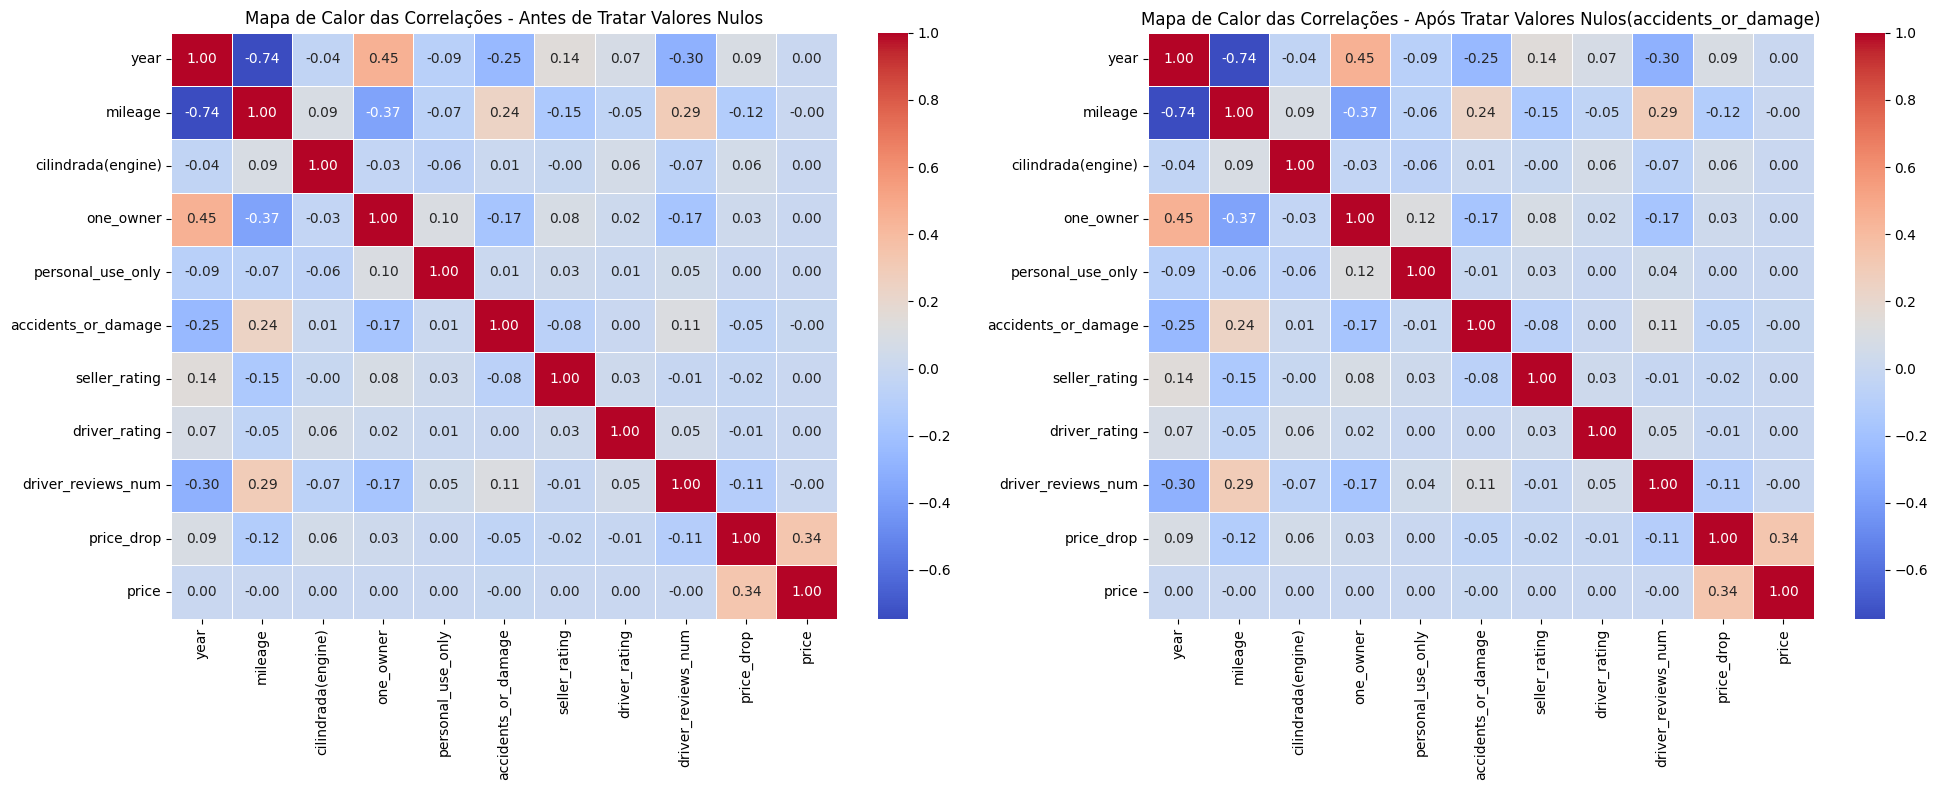

In [187]:
# Pouca coisa mudou
# Relação entre essa variavel e as demais é fraca, compensa deixa-la?
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = personal[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Valores Nulos')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Valores Nulos(accidents_or_damage)')

plt.tight_layout()
plt.show()

In [188]:
# Alterando o valor no dataframe original usando mediana
# Substituindo os valores nulos pela mediana
cars_amos1['personal_use_only'] = cars_amos1['personal_use_only'].fillna(median_personal)

## Coluna 15 'seller_name' (Nome do Vendedor)

Seller_name (Variavel Categorica Nominal)

In [189]:
# Variavel Categórica Nominal - Dados não mensuráveis e sem ordem
cars_amos1.seller_name.unique()

array(['schaumburg ford', 'world auto inc.', 'cal cars', ..., 'rel cars',
       'premier motors', 'lester glenn ford'], dtype=object)

In [190]:
# Dados nulos
cars_amos1['seller_name'].isnull().value_counts()

seller_name
False    177527
True       1598
Name: count, dtype: int64

In [191]:
# São nomes de lojas?
# Possivelmente, esta coluna não vai interferir no objetivo de previsão
# Não vejo nenhum padrão de nomes 
cars_amos1['seller_name'].value_counts().head(60)

seller_name
auto boutique                        189
east coast auto source               169
adams north charlotte                161
automotive avenues                   150
off lease only orlando               136
pacific auto center - fontana        135
merchants automotive group           131
a better way wholesale               124
shelor motor mile                    120
westgate chrysler jeep dodge ram     112
hgreg.com orlando                    111
sundance chevrolet                   110
anchor auto group - subaru nissan    110
auto boutique texas                  109
car revolution                       107
impex auto sales                     107
peterson auto group                  103
donohooauto llc                      102
the sharpest rides                   102
auto express                          95
auto spot llc                         95
carsquad                              95
maximum auto outlet                   95
victory mitsubishi                    94
echo

In [192]:
# Optei por excluir a coluna seller_name
# Motivo: Acredito que esta coluna é irrelevante para minha previsão de preços
cars_amos1 = cars_amos1.drop('seller_name', axis=1)

In [193]:
# Agora temos 18 colunas
cars_amos1.shape

(179125, 18)

## Coluna 16 'seller_rating' (Avaliação do Vendedor)

Seller_rating (Variavel Categórica Ordinal)

In [194]:
# Variável Categórica Ordinal - Avaliação vai de 1 a 5
cars_amos1.seller_rating.unique()

array([4.1, 2.3, 4.4, 4.7, 4.5, 2.4, nan, 3.6, 4.8, 1.9, 4.6, 4.3, 3.2,
       3.8, 3.7, 3.4, 4.2, 4. , 4.9, 2.6, 5. , 3.9, 2.8, 1.6, 1.8, 2.5,
       2.9, 3.1, 3. , 2.7, 3.3, 3.5, 2.1, 1.3, 2.2, 1.4, 2. , 1.5, 1.2,
       1.7, 1. , 1.1])

In [195]:
# Confirmando, a avaliação vai de 1 à 5
cars_amos1.seller_rating.describe()

count    130893.000000
mean          4.181311
std           0.786626
min           1.000000
25%           3.900000
50%           4.500000
75%           4.700000
max           5.000000
Name: seller_rating, dtype: float64

In [196]:
# A grande maioria dos veículos tem boa avaliação
cars_amos1['seller_rating'].value_counts()

seller_rating
4.8    15622
4.7    13732
4.9    12644
4.6    11917
4.5     9784
4.4     7340
4.3     6425
4.2     5203
4.1     4400
5.0     4028
3.9     3833
4.0     3825
3.8     2897
3.7     2698
3.6     2691
3.3     2390
3.4     2182
3.5     2163
3.1     1827
3.0     1502
3.2     1442
2.8     1395
2.7     1141
2.6     1128
2.9     1124
2.4      970
2.5      949
1.8      835
2.2      778
2.1      674
1.9      668
2.3      668
1.7      406
2.0      345
1.5      300
1.6      274
1.2      189
1.3      181
1.4      149
1.0      133
1.1       41
Name: count, dtype: int64

In [197]:
# Muitos veículos sem avaliação, dependendo da analise, a avaliação pode perder credibilidade
cars_amos1['seller_rating'].isnull().value_counts()

seller_rating
False    130893
True      48232
Name: count, dtype: int64

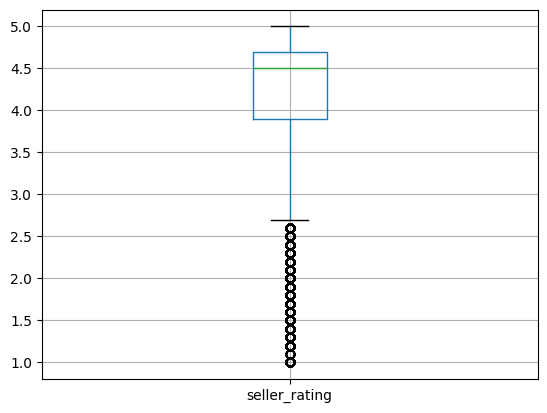

In [198]:
# Alguns outiliers, avaliações abaixo de 2.5 estão ocasionando outilers
# A minoria dos dados têm avaliações ruins
cars_amos1.boxplot(column=['seller_rating'])
plt.show()

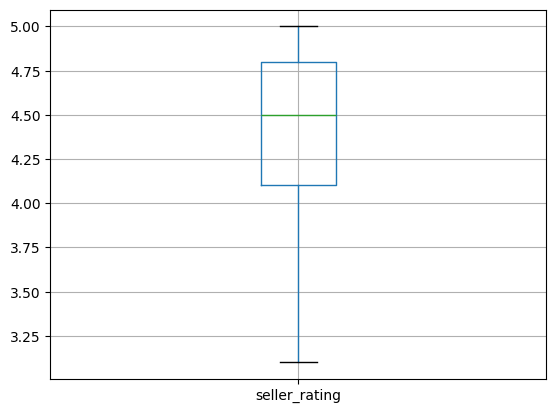

In [199]:
# A grande quantidade encontra-se entre 3 a 5, uma boa avaliação
cars_amos1[cars_amos1['seller_rating'] > 3].boxplot(column='seller_rating')
plt.show()

### Correlação com Dados Nulos

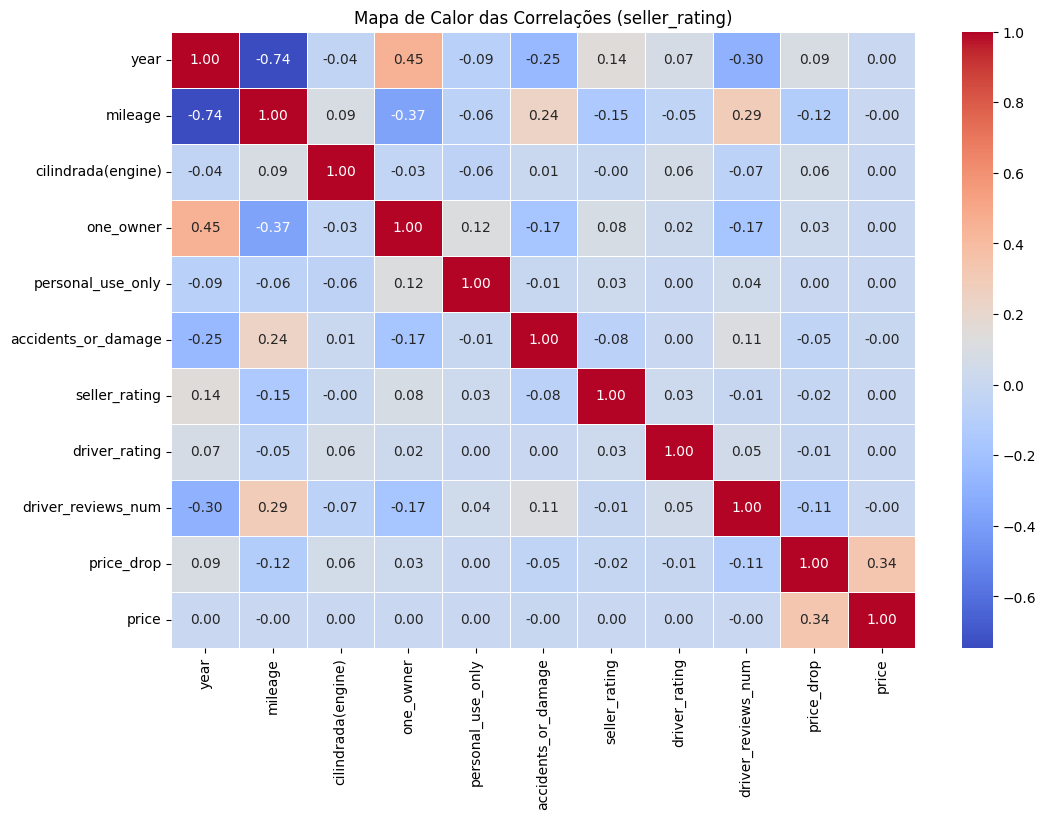

In [200]:
# Observamos que existe uma correlaçao da variavel seller_rating com as demais variaveis fraca
# Calcular a matriz de correlação
correlation_matrix = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das Correlações (seller_rating)')
plt.show()

### Correlação com Valores Nulos sendo Substituidos por Zero

In [201]:
# Para não afetar o Dataframe original, criei um novo
zero_seller_rating = cars_amos1.copy()

In [202]:
# Substituir valores nulos por zero
zero_seller_rating.fillna({'seller_rating': 0}, inplace=True)

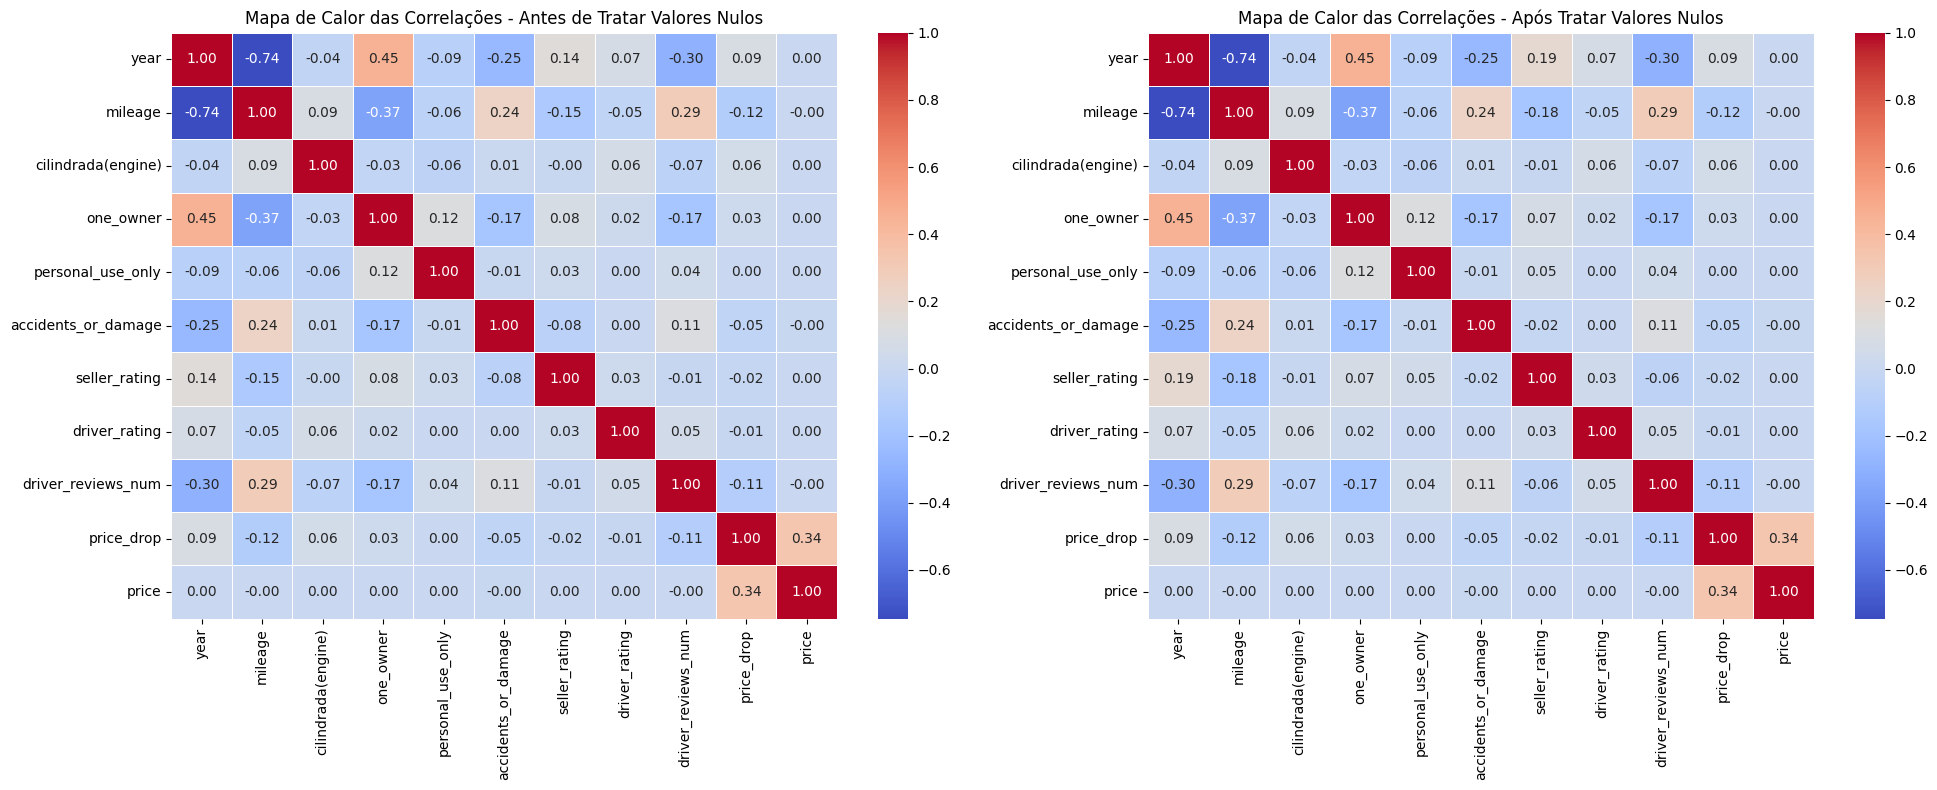

In [203]:
# Obtivemos uma leve melhoria de desempenho na correlação
# A avaliação do vendedor teve uma relação positiva de fraca para moderada com as colunas year e mileage
# Acredito que essa correlação não é o suficiente para uma regressão precisa
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = zero_seller_rating[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Valores Nulos')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Valores Nulos')

plt.tight_layout()
plt.show()

In [204]:
# Não há muito o que fazer quanto a substituição dos valores nulos a não ser por 0
# Substituir nulos por qualquer outro numero influenciará muito a precisão dos dados devido a serem muitos
# Substituir valores nulos por zero
cars_amos1.fillna({'seller_rating': 0}, inplace=True)

### Análise Minusciosa para exclusão ou não da coluna 'seller_rating'

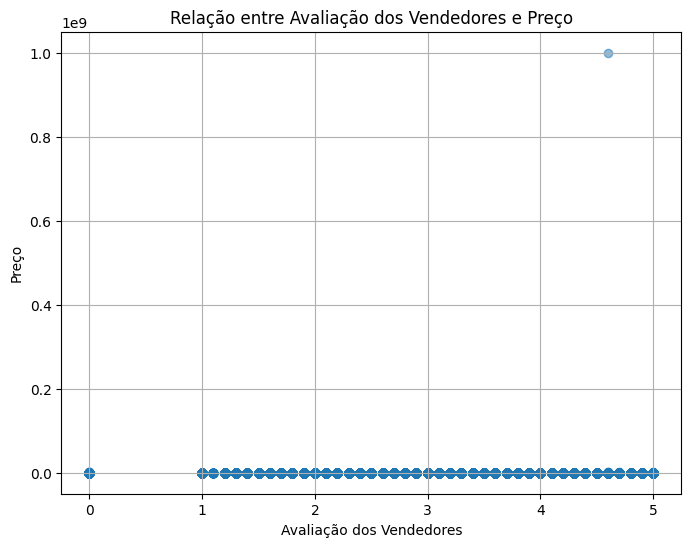

In [205]:
# Todos os valores estão próximos de zero, indicando uma correlação entre as variaveis fraca
# O resultado indica que a coluna seller_rating não influencia os preços ou sua influência é muito fraca
# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(cars_amos1['seller_rating'], cars_amos1['price'], alpha=0.5)
plt.title('Relação entre Avaliação dos Vendedores e Preço')
plt.xlabel('Avaliação dos Vendedores')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

In [206]:
# Adicionando uma constante ao conjunto de dados para ajustar o modelo
X = sm.add_constant(cars_amos1['seller_rating'])
y = cars_amos1['price']

# Ajuste o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Imprima um resumo do modelo para obter os resultados do teste t
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.259
Date:                Mon, 10 Jun 2024   Prob (F-statistic):              0.262
Time:                        20:43:50   Log-Likelihood:            -2.8829e+06
No. Observations:              179125   AIC:                         5.766e+06
Df Residuals:                  179123   BIC:                         5.766e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.937e+04   1.03e+04      2.854

O valor de R-squared é zero, o que indica que a variável "seller_rating" não explica nenhuma variação nos preços dos carros neste modelo. Isso sugere que, neste modelo específico, a variável "seller_rating" não está contribuindo para a explicação dos preços dos carros. Coeficiente associado à variável "seller_rating" é de aproximadamente 3174.59. No entanto, dado que o valor p associado a esta variável é 0.262, não podemos afirmar com confiança que este coeficiente é estatisticamente significativo. O valor p para "seller_rating" é de 0.262, o que é maior que o nível de significância típico de 0.05. Isso indica que não há uma relação estatisticamente significativa entre "seller_rating" e o preço do carro neste modelo.

In [207]:
# O teste de correlação diz que a coluna mpg influencia o valor do veiculo muito pouco
# A regressão indica que influencia consideravelmente
# Vamos fazer um teste t para chegar em um consenso

# Definindo os dados
seller_rating_data = cars_amos1['seller_rating']
price_data = cars_amos1['price']

# Realizando o teste t
t_stat, p_value = stats.ttest_ind(seller_rating_data, price_data)

# Imprimindo o resultado
print("Estatística t:", t_stat)
print("Valor p:", p_value)


Estatística t: -6.9975886832299
Valor p: 2.608589410590397e-12


A estatística t de -6.997 e um valor p de aproximadamente 2.61e-12 indicam que há uma relação estatisticamente significativa entre a variável seller_rating e o preço do carro.

In [208]:
# Com base nas análises, conclusão: Excluir coluna seller_rating
# Fatores que levam a esta atitude
# Fator 1: Muitos dados nulos (48 mil registros), afeta a credibilidade dos dados
# Fator 2: Como conseguir uma precisão eficiente tendo tantos dados nulos, pode prejudicar a análise
# Fator 3: Esta variavel se trata de avaliações de vendedores, elas são reais? Não podem facimente ser manipuladas?
# Fator 4: Gráficos, regressão e correlação, obtiveram uma fraca evidência de relação entre price e seller_rating
cars_amos1 = cars_amos1.drop('seller_rating', axis=1)

## Coluna 17 'driver_rating' (Avaliação do Carro Pelos Motoristas)

Driver_rating (Variavel Categórica Ordinal)

In [209]:
# Variável Categórica Ordinal - Avaliação vai de 1 a 5 - Possui ordenação
cars_amos1.driver_rating.unique()

array([4. , 4.7, 4.8, nan, 4.5, 4.6, 4.4, 4.9, 5. , 4.3, 4.2, 3.8, 3.9,
       3.4, 4.1, 2.8, 3.7, 2.6, 3.6, 3.5, 1. , 2.2, 2.9, 3.3, 3. , 3.2,
       2.5, 2. , 2.1, 2.7, 1.7])

In [210]:
# Novamente obtivemos boas avaliações dos veículos conforme avaliação dos motoristas
cars_amos1['driver_rating'].value_counts()

driver_rating
4.8    38239
4.7    38011
4.6    27382
4.5    17016
4.9    15700
4.4     9067
5.0     7594
4.3     6273
4.2     3627
4.1     2968
4.0     1474
3.8     1251
3.9      786
3.7      656
3.6      385
3.4      317
3.5      217
2.8      209
2.9      154
3.0       87
2.6       83
1.0       72
3.2       40
3.3       28
2.5       20
2.2        8
2.7        4
2.1        3
1.7        2
2.0        1
Name: count, dtype: int64

In [211]:
# A grande maioria dos motoristas fizeram avaliações
cars_amos1.driver_rating.isnull().value_counts()

driver_rating
False    171674
True       7451
Name: count, dtype: int64

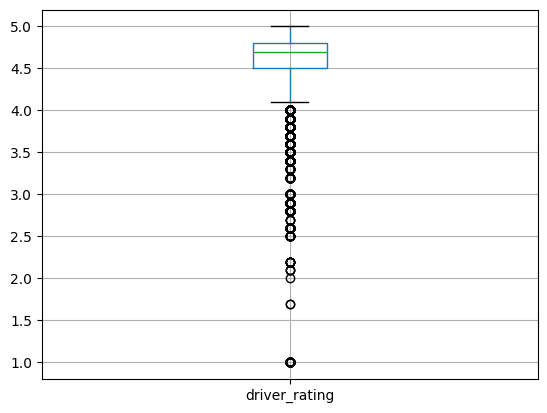

In [212]:
# Outiliers abaixo da avaliação 4
# Boas avaliações, maior confiabilidade
cars_amos1.boxplot(column=['driver_rating'])
plt.show()

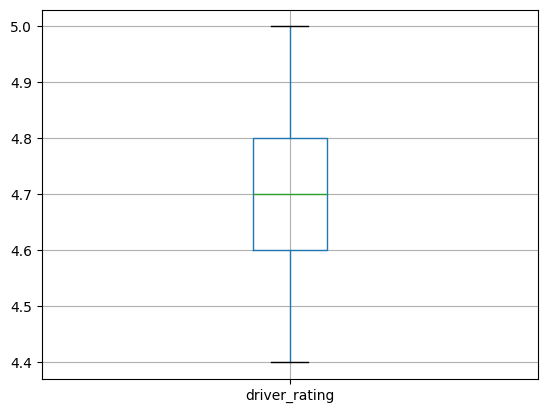

In [213]:
# A maioria das avaliações estão entre 4 a 5
# Segundo os motoristas, os veículos obtiveram uma boa avaliação
cars_amos1[cars_amos1['driver_rating'] > 4.3].boxplot(column='driver_rating')
plt.show()

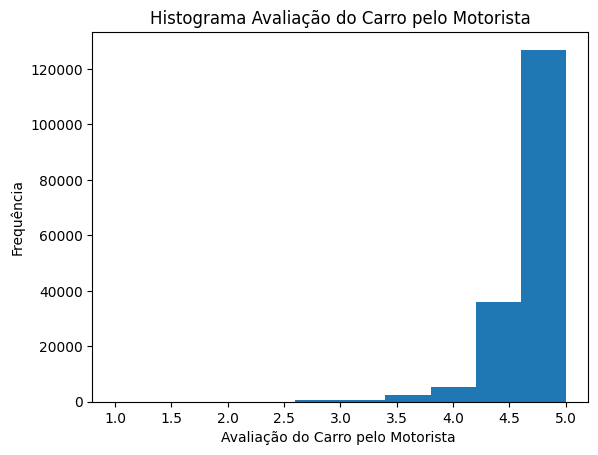

In [214]:
# A maioria deu notas de 4.5 a 5
# Boas Avaliações
plt.hist(x=cars_amos1['driver_rating'])
plt.xlabel('Avaliação do Carro pelo Motorista ')
plt.ylabel('Frequência')
plt.title('Histograma Avaliação do Carro pelo Motorista')
plt.show()

### Correlação Com Dados Nulos (driver_rating)

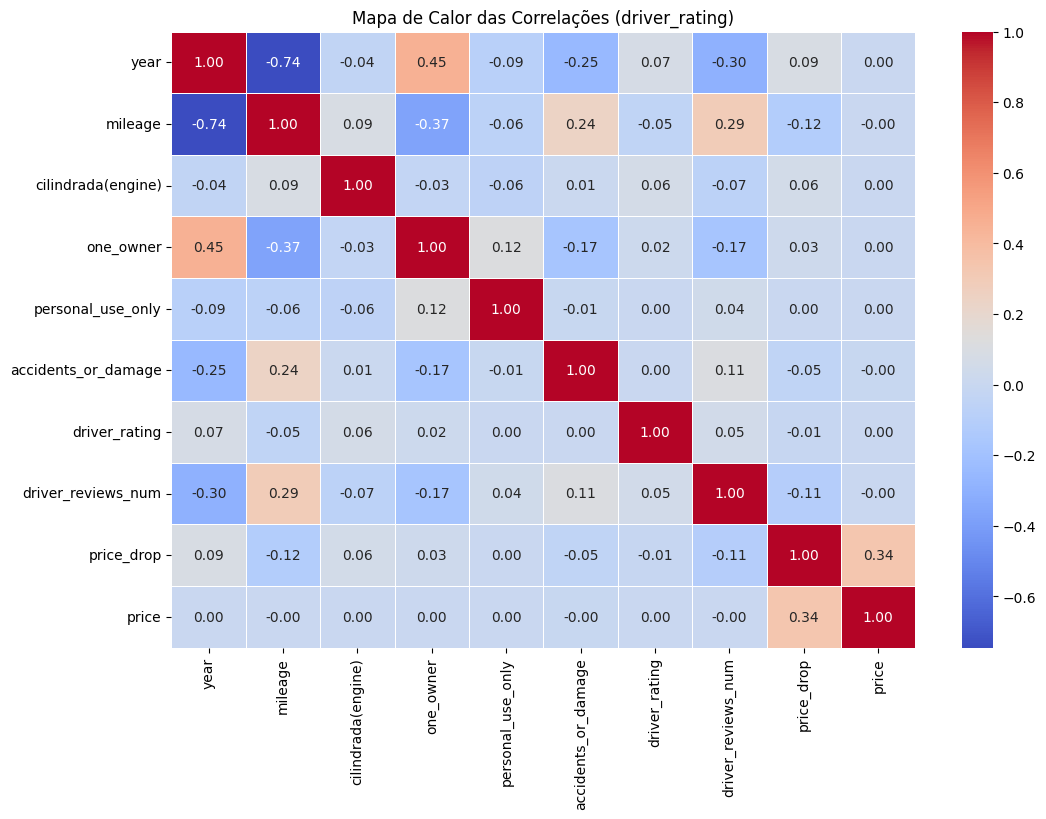

In [215]:
# Correlação com o variaveis fraca
# Calcular a matriz de correlação
correlation_matrix = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das Correlações (driver_rating)')
plt.show()

### Correlação Valores Nulos sendo Substituidos por Zero 

In [216]:
# Criando um dataframe
driver_rating = cars_amos1.copy()

In [217]:
driver_rating['driver_rating'] = driver_rating['driver_rating'].fillna(0)

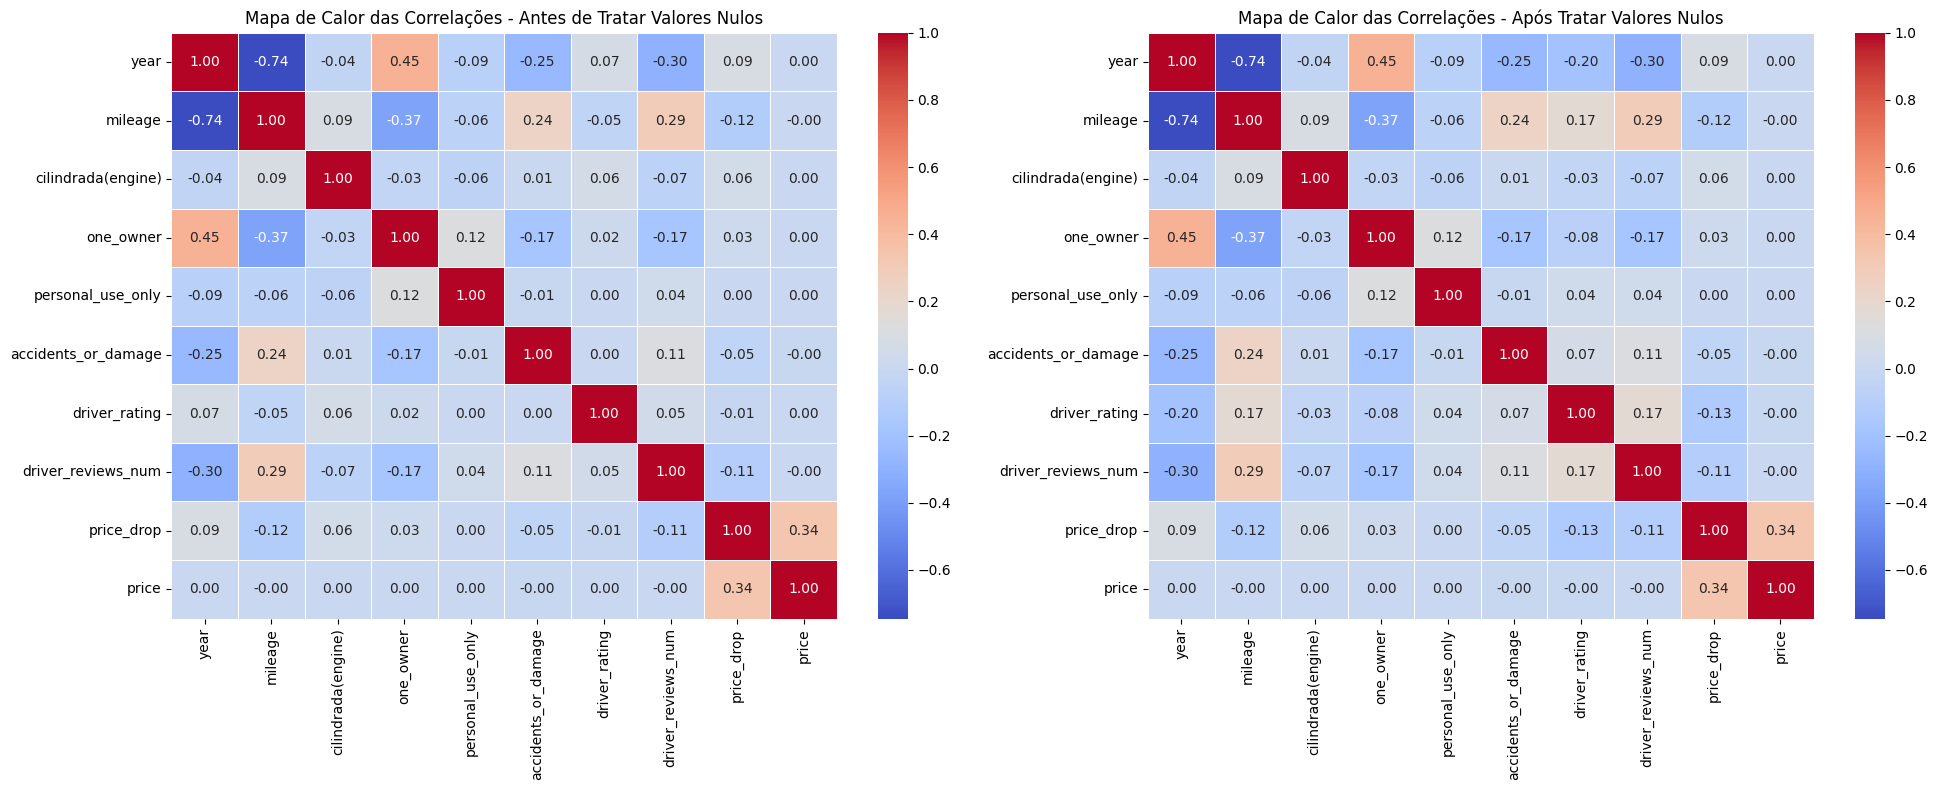

In [218]:
# Podemos observar que a correlação aumentou entre a variaver driver_rating e as demais após a substituição por zero
# É o suficiente esses resultados para regressão? Ainda são fracas
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = driver_rating[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Valores Nulos')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Valores Nulos')

plt.tight_layout()
plt.show()

In [219]:
# Como o resultado é positivo, vou substituir no dataframe original os valores nulos
cars_amos1['driver_rating'] = cars_amos1['driver_rating'].fillna(0)

### Correlação com Tratamento de Outliears

In [220]:
# Muitos registros que causam outliears
cars_amos1[cars_amos1['driver_rating'] < 4].shape

(11774, 17)

In [221]:
# Criando um dataframe com as avaliações dos motoristas acima de 4 
outliears_driver = cars_amos1[cars_amos1['driver_rating'] > 4]

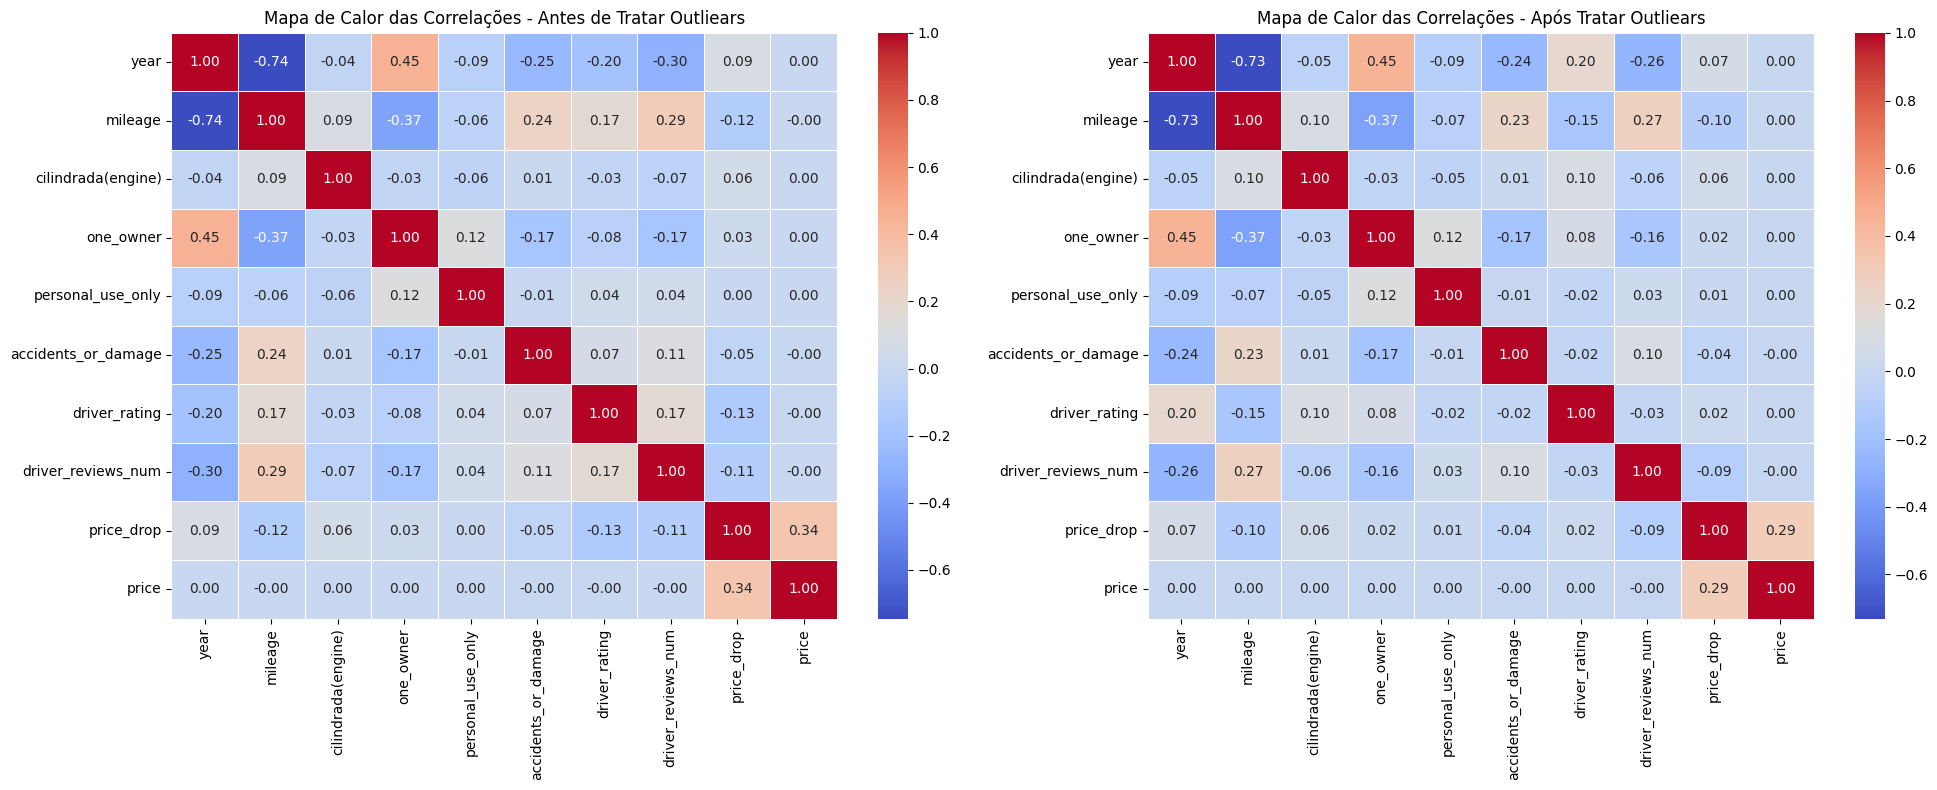

In [222]:
# Houve uma queda na correlação 
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = driver_rating[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = outliears_driver[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'driver_rating', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Outliears')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Outliears')

plt.tight_layout()
plt.show()

### Análise Minusciosa para Exclusão ou Não da Coluna driver_rating¶

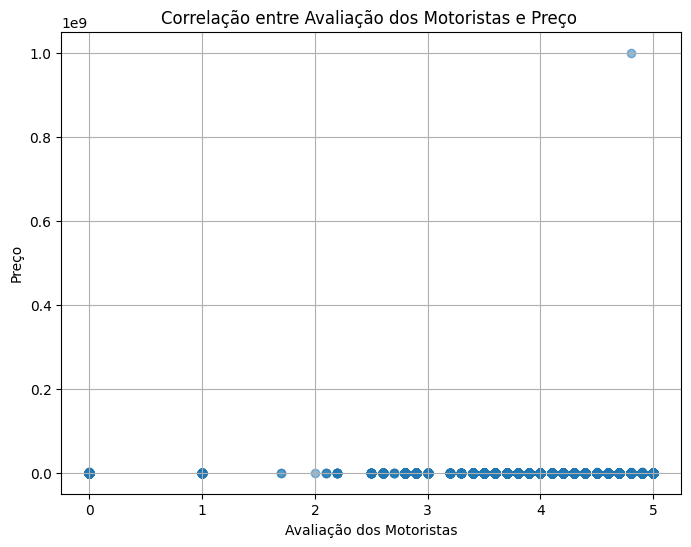

In [223]:
# Todos os valores estão próximos de zero, indicando uma correlação entre as variaveis fraca
# O resultado indica que a coluna driver_rating não influencia os preços ou sua influência é muito fraca
# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(cars_amos1['driver_rating'], cars_amos1['price'], alpha=0.5)
plt.title('Correlação entre Avaliação dos Motoristas e Preço ')
plt.xlabel('Avaliação dos Motoristas')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

In [224]:
# Adicionando uma constante ao conjunto de dados para ajustar o modelo
X = sm.add_constant(cars_amos1['driver_rating'])
y = cars_amos1['price']

# Ajuste o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Imprima um resumo do modelo para obter os resultados
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7641
Date:                Mon, 10 Jun 2024   Prob (F-statistic):              0.382
Time:                        20:43:56   Log-Likelihood:            -2.8829e+06
No. Observations:              179125   AIC:                         5.766e+06
Df Residuals:                  179123   BIC:                         5.766e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.155e+04   2.63e+04      2.338

A variável driver_rating não apresenta um impacto estatisticamente significativo no preço do carro, como indicado pelo coeficiente (-5065.23) e pelo p-valor elevado (0.382). O modelo como um todo também não é significativo para prever o preço do carro, conforme indicado pelo baixo R-squared (0.000) e pelo F-statistic não significativo (0.7641). Portanto, de acordo com este modelo, driver_rating não é uma variável importante para prever o preço do carro.

 Conclusão: Excluir a coluna driver_rating

Fatores que me levam a esta decisão:
- Fator 1: Correlação de Pearson e regressão linear mostraram resultados negativos sobre a correlação entre driver_rating e as demais variáveis.
   - A análise de correlação de Pearson revelou que a correlação entre driver_rating e as outras variáveis é baixa ou negativa, indicando que driver_rating tem pouca influência sobre a variável target ou sobre as outras características do veículo. Além disso, os coeficientes de regressão em modelos lineares sugerem que driver_rating não é um bom preditor para o preço do veículo.
  
- Fator 2: Simplificação do modelo removendo variáveis pouco importantes colabora com um modelo mais preciso e consistente.
   - Simplificar o modelo, removendo variáveis com baixa importância ou relevância para o problema em questão, pode resultar em modelos mais precisos e consistentes. Ao remover driver_rating, reduzimos a complexidade do modelo e eliminamos uma variável que não contribui significativamente para a previsão do preço do veículo. Isso pode facilitar a interpretação do modelo e melhorar sua capacidade de generalização para novos dados.


In [225]:
# Conclusão: Excluir a coluna driver_rating
cars_amos1 = cars_amos1.drop('driver_rating', axis=1)

## Coluna 18 'driver_reviews_num' (Número de Avaliações Pelos Motoristas)

Driver_reviews_num (Variavel Continua Discreta)

In [226]:
# Variável Contínua Discreta - Embora esteja em float, os dados analisam a quantidade de avaliações que os motoristas fizeram
cars_amos1.driver_reviews_num.unique()

array([4.500e+01, 7.800e+01, 1.990e+02, 7.400e+01, 0.000e+00, 1.330e+02,
       8.000e+00, 2.000e+00, 6.100e+01, 1.180e+02, 2.020e+02, 3.100e+01,
       5.200e+01, 3.900e+01, 4.000e+00, 5.100e+01, 1.790e+02, 1.070e+02,
       3.300e+01, 1.920e+02, 1.010e+02, 3.500e+01, 1.580e+02, 2.600e+01,
       6.800e+01, 1.200e+01, 1.020e+02, 1.520e+02, 2.540e+02, 7.700e+01,
       1.300e+01, 6.900e+01, 1.840e+02, 2.710e+02, 2.290e+02, 3.130e+02,
       4.780e+02, 2.500e+01, 6.000e+00, 7.000e+01, 9.000e+00, 5.600e+01,
       4.400e+02, 7.300e+01, 1.390e+02, 8.600e+01, 7.500e+01, 8.100e+01,
       1.190e+02, 4.100e+01, 2.200e+01, 2.070e+02, 5.900e+01, 2.000e+01,
       1.100e+01, 2.100e+01, 1.700e+01, 2.740e+02, 3.400e+01, 1.250e+02,
       1.400e+02, 1.320e+02, 4.600e+01, 1.600e+01, 5.400e+01, 2.590e+02,
       5.000e+00, 1.400e+01, 8.200e+01, 3.000e+01, 4.800e+01, 1.220e+02,
       6.300e+01, 2.230e+02, 8.900e+01, 1.800e+01, 8.800e+01, 9.700e+01,
       8.400e+01, 2.700e+01, 1.380e+02, 1.630e+02, 

In [227]:
# Dados em Float, talvez tenha a necessidade de mudança para números inteiros
cars_amos1['driver_reviews_num'].dtype

dtype('float64')

In [228]:
# Nenhum dado nulo
cars_amos1.driver_reviews_num.isnull().value_counts()

driver_reviews_num
False    179125
Name: count, dtype: int64

In [229]:
# A grande maioria não avaliou nenhuma vez
# Esse valor refletiu como dados nulos na coluna driver_rating, portanto, confirma valores nulos na coluna driver_rating iguais a zero
# Dados com certa discrepância, poderão compremeter as avaliações?
cars_amos1['driver_reviews_num'].value_counts()

driver_reviews_num
0.0      7451
2.0      5150
3.0      4020
4.0      3862
1.0      3278
         ... 
180.0      22
221.0      19
240.0      16
232.0      12
369.0       8
Name: count, Length: 365, dtype: int64

In [230]:
# Oscilação desta coluna muito alta, porém comum para avaliações de veículos
cars_amos1.driver_reviews_num.describe()

count    179125.000000
mean         91.505340
std         117.529999
min           0.000000
25%          13.000000
50%          51.000000
75%         125.000000
max        1025.000000
Name: driver_reviews_num, dtype: float64

In [231]:
# 138 veículos que receberam mais avaliações
cars_amos1[cars_amos1['driver_reviews_num'] >= 1000].shape

(138, 16)

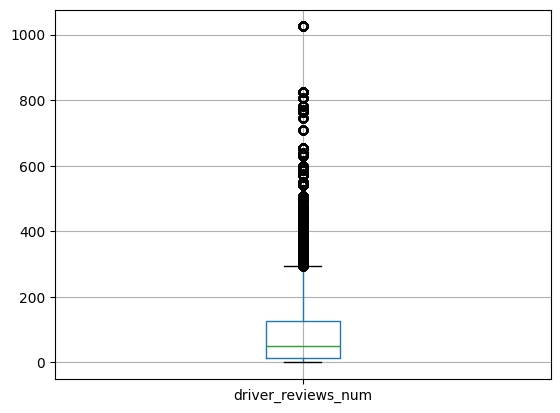

In [232]:
# Alguns outilears com dados discrepantes
cars_amos1.boxplot(column=['driver_reviews_num'])
plt.show()

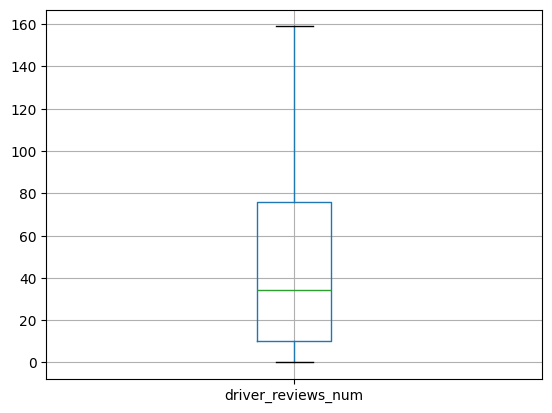

In [233]:
# Dados acima de 160 são outilears 
cars_amos1[cars_amos1['driver_reviews_num'] < 160].boxplot(column='driver_reviews_num')
plt.show()

In [234]:
# Muitos outliears para simplesmente exclui-los
cars_amos1[cars_amos1['driver_reviews_num'] > 160].shape

(31812, 16)

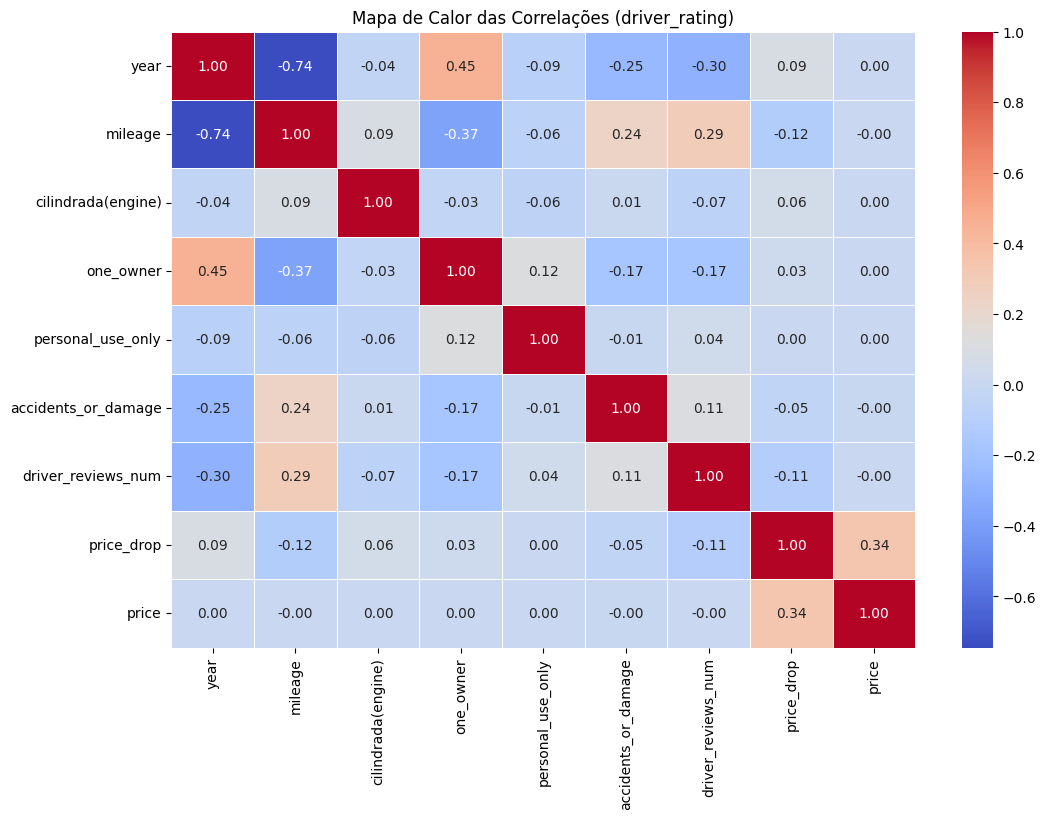

In [235]:
# A correlação da variavel driver_reviews_num com year é negativa e  mileage é positiva
# Calcular a matriz de correlação
correlation_matrix = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'driver_reviews_num', 'price_drop', 'price']].corr()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das Correlações (driver_rating)')
plt.show()

### Correlação sem Outliears

In [236]:
outliears_reviews = cars_amos1.copy()

In [237]:
# Limitar os valores dos outliers diretamente na coluna 'driver_reviews_num'
outliears_reviews['driver_reviews_num'] = outliears_reviews['driver_reviews_num'].apply(lambda x: 160 if x > 160 else x)


# Identificamos que todos os registros acima de 160 são outliers, totalizando 31.811 registros, ou 17.76% do total.
# Decidimos limitar os valores dos outliers diretamente na coluna existente, substituindo valores acima de 160 por 160.
# Essa abordagem preserva a variabilidade dos dados enquanto reduz o impacto dos valores extremos.
outliears_reviews.driver_reviews_num.describe()

count    179125.000000
mean         67.914166
std          58.704551
min           0.000000
25%          13.000000
50%          51.000000
75%         125.000000
max         160.000000
Name: driver_reviews_num, dtype: float64

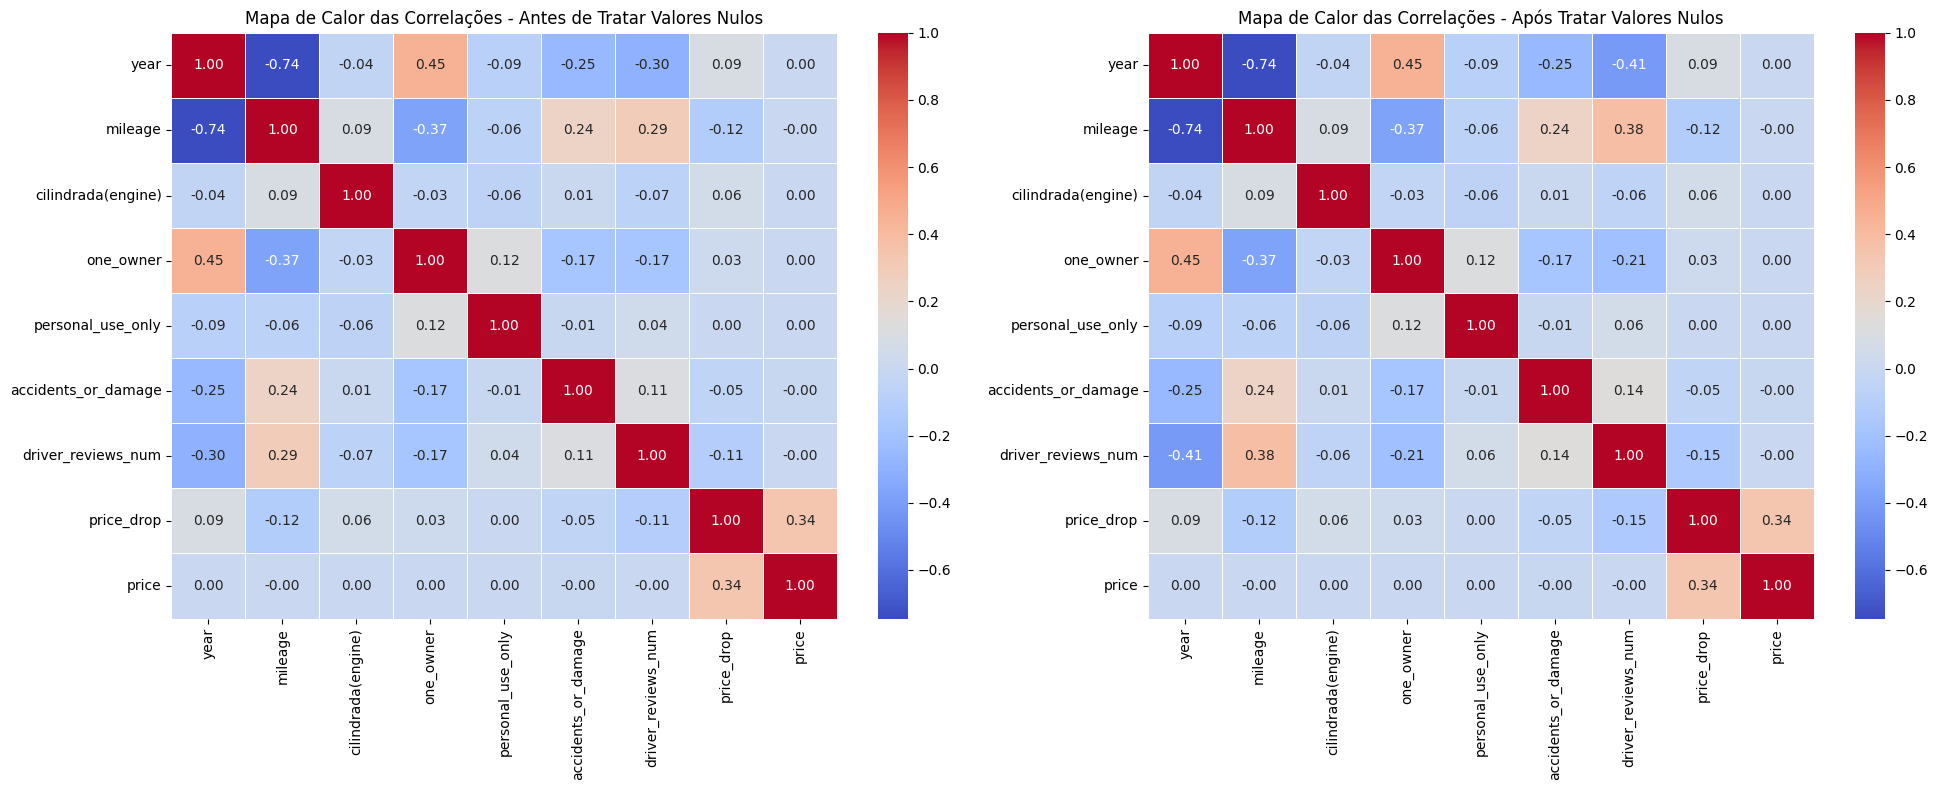

In [238]:
# Valores nulos afetaram muito a correlação, como podemos observar com o tratamento dos dados
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = outliears_reviews[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Valores Nulos')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Valores Nulos')

plt.tight_layout()
plt.show()

In [239]:
# Aplicar no dataframe original
# Limitar os valores dos outliers diretamente na coluna 'driver_reviews_num'
cars_amos1['driver_reviews_num'] = cars_amos1['driver_reviews_num'].apply(lambda x: 160 if x > 160 else x)


## Coluna 19 'price_drop' (Redução do Preço em Relação ao Preço Inicial)

Price_drop (Variavel Numérica Contínua)

In [240]:
# Variavel Numérica Contínua - Preços
cars_amos1.price_drop.unique()

array([ 500.,   nan, 1000., ..., 7049., 9970., 2388.])

In [241]:
# Aparentemente dados normais, observando que é uma coluna de valores monetários
cars_amos1.price_drop.value_counts()

price_drop
1000.0    12696
500.0      8482
200.0      3769
100.0      3556
2000.0     3145
          ...  
2765.0        1
4894.0        1
2554.0        1
3918.0        1
2388.0        1
Name: count, Length: 4489, dtype: int64

In [242]:
# Quase 80 mil de desconto? Isso é possível?
cars_amos1.price_drop.describe()

count    98269.000000
mean      1006.339202
std       1301.099346
min        100.000000
25%        380.000000
50%        644.000000
75%       1010.000000
max      79909.000000
Name: price_drop, dtype: float64

In [243]:
# Qual é o critério de desconto?
# Podemos afirmar que são dados consistentes?
# É desconto? Atualização de preços? O que esta coluna significa? 
# Coluna com necessidade maior de ser trabalhada
cars_amos1[cars_amos1['price_drop'] >= 10000].head(2)

manufacturer    model  year  mileage  cilindrada(engine)  \
88923      cadillac  compact  2021  23998.0                 2.0   
460537   land rover   luxury  2023   6273.0                 6.0   

              transmission                     drivetrain fuel_type  \
88923   10-speed automatic  AWD (Tração nas quatro rodas)  gasoline   
460537           automatic  AWD (Tração nas quatro rodas)  gasoline   

       exterior_color interior_color  accidents_or_damage  one_owner  \
88923            grey          black                  0.0        1.0   
460537          white    unspecified                  0.0        1.0   

        personal_use_only  driver_reviews_num  price_drop     price  
88923                 1.0                13.0     11940.0   43490.0  
460537                1.0                 0.0     12000.0  145900.0

In [244]:
# Embora tenha muitos dados nulos, a coluna é uma coluna de preços considerado queda ou desconto, ainda indefinido pra mim
# Podemos substituir dados nulos por 0
cars_amos1['price_drop'].isnull().value_counts()

price_drop
False    98269
True     80856
Name: count, dtype: int64

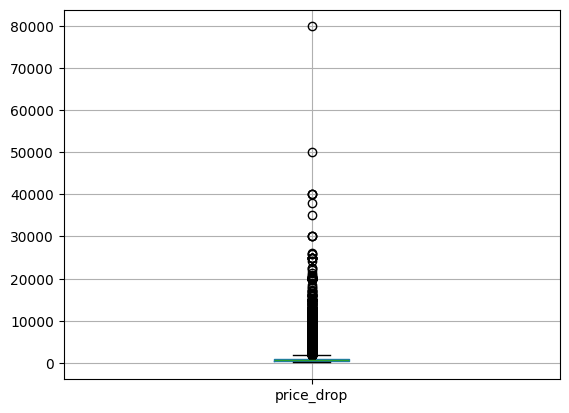

In [245]:
# Gráfico aponta muitos outiliers
# Existe um padrão nessa atualização de preços?
# Embora tenha muitos outliears, a caracteristica dessa variavel permite, pois é uma variação de preços
# Precisamos analisar com mais detalhes
cars_amos1.boxplot(column=['price_drop'])
plt.show()

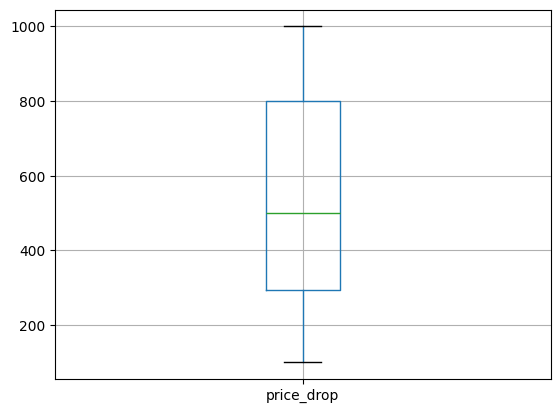

In [246]:
# Sem outliers até 1000
# A maioria dos valores estão entre 100 a 1000
cars_amos1[cars_amos1['price_drop'] <= 1000].boxplot(column='price_drop')
plt.show()

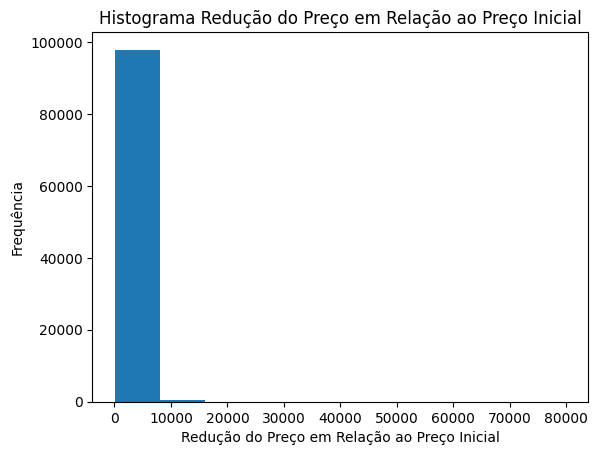

In [247]:
# Histograma evidencia que a maior frequência e valores está entre os valores mínimos
plt.hist(x=cars_amos1['price_drop'])
plt.xlabel('Redução do Preço em Relação ao Preço Inicial')
plt.ylabel('Frequência')
plt.title('Histograma Redução do Preço em Relação ao Preço Inicial')
plt.show()

### Correlação com Substituição de Valores Nulos por Zero

In [248]:
# Criando um dataframe
price_drop = cars_amos1.copy()

In [249]:
# Substituindo valores nulos por 0, significa que não tiveram redução de preços
price_drop['price_drop'] = price_drop['price_drop'].fillna(0)

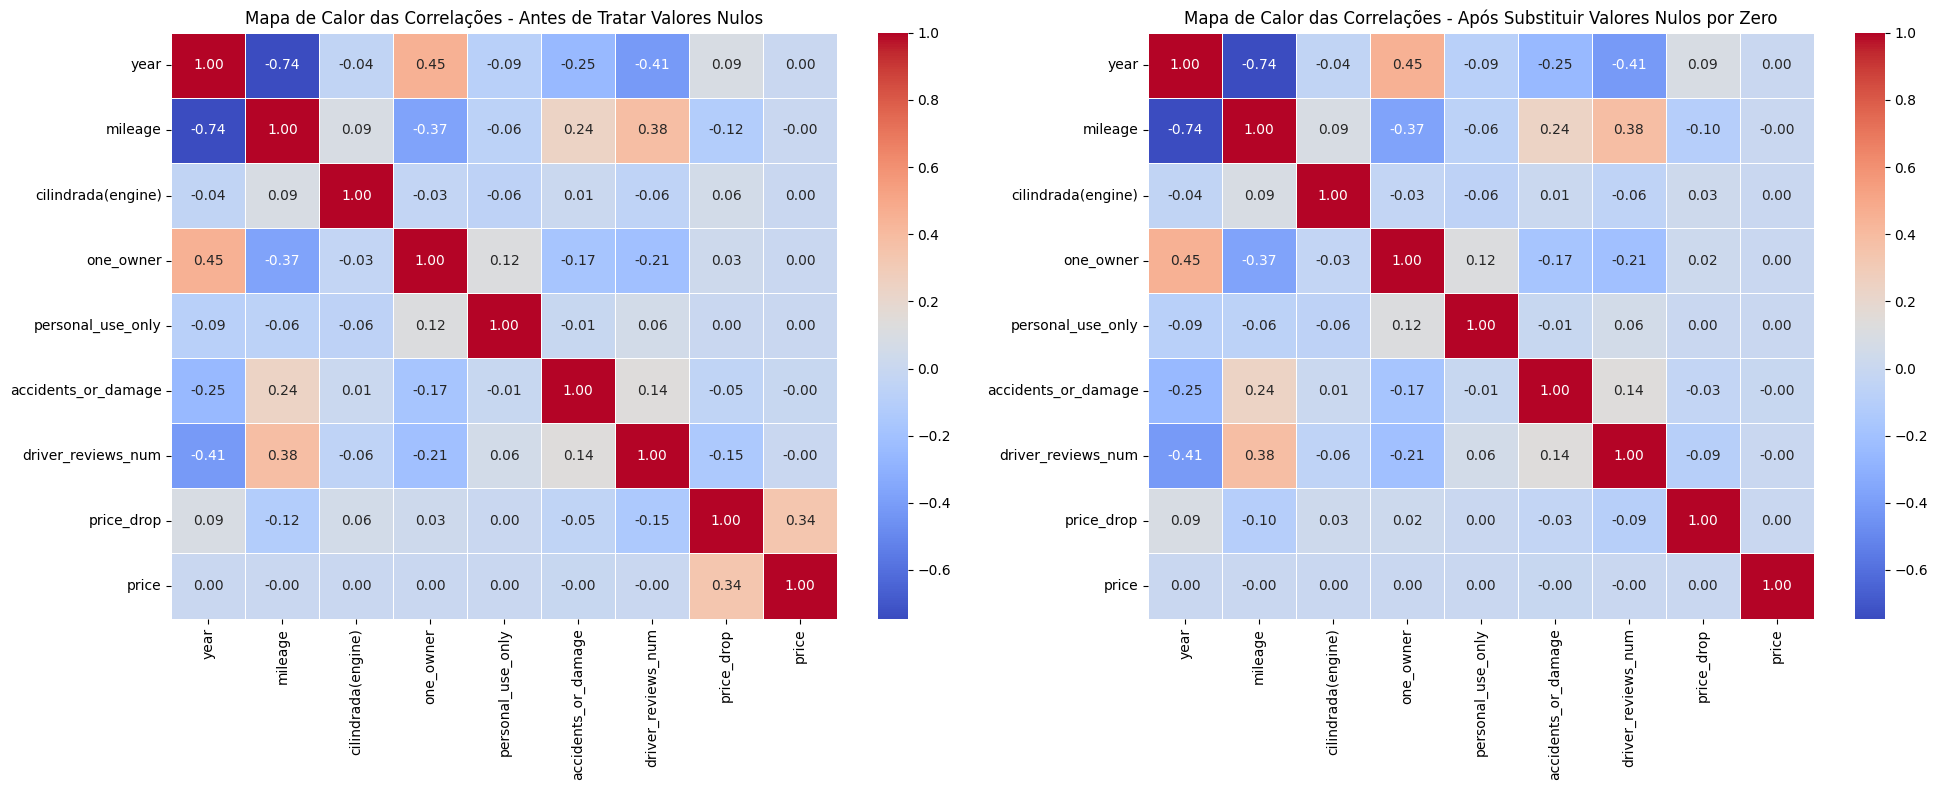

In [250]:
# Correlação Muito fraca com as demais variaveis
# Após a substituição de dados nulos por zero a correlação da coluna price com price_drop chegou a zero
# Observando sem a mudança, a correlação entre price e price drop é igual, ou seja, price_drop é um reflexo da coluna price
# Calcular a matriz de correlação antes e depois
correlation_matrix_before = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'driver_reviews_num', 'price_drop', 'price']].corr()


correlation_matrix_after = price_drop[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'driver_reviews_num', 'price_drop', 'price']].corr()


# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Valores Nulos')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Substituir Valores Nulos por Zero')

plt.tight_layout()
plt.show()

In [251]:
# Análises feitas mostram que essa variável price_drop não tem correlação com a variavel principal price
# Outro motivo, é a explicação do orientador sobre essa variável, no caso uma data leakage (vazamento de dados)

# Excluindo price_drop
cars_amos1 = cars_amos1.drop('price_drop', axis=1)

## Coluna 20 'price' (Preço do Carro)

Price (Variavel Numérica Contínua)

In [252]:
# Variável Numérica Contínua - Preços
cars_amos1.price.unique()

array([53950., 27885., 46995., ..., 69457., 24631.,  7812.])

In [253]:
# Nenhum dado nulo
cars_amos1.price.isnull().value_counts()

price
False    179125
Name: count, dtype: int64

In [254]:
# Alguns valores inconsistentes
cars_amos1.price.describe()

count    1.791250e+05
mean     3.906889e+04
std      2.362799e+06
min      3.190000e+02
25%      2.058400e+04
50%      2.893900e+04
75%      3.999500e+04
max      1.000000e+09
Name: price, dtype: float64

In [255]:
# Menor veículo de um carro é de 319, está correto?
cars_amos1.price.min()

319.0

In [256]:
# Existe veículo no valor de 1 bilhão?
# Extremamente raro e improvável
cars_amos1.price.max()

1000000000.0

In [257]:
# Alguns veículos acima de 500 mil reais
cars_amos1[cars_amos1['price'] >= 500000].price.value_counts()

price
5.070000e+05    1
5.150000e+05    1
5.491120e+05    1
1.200888e+06    1
1.000000e+09    1
5.590000e+05    1
7.400000e+05    1
7.950000e+05    1
1.190000e+06    1
1.275000e+06    1
Name: count, dtype: int64

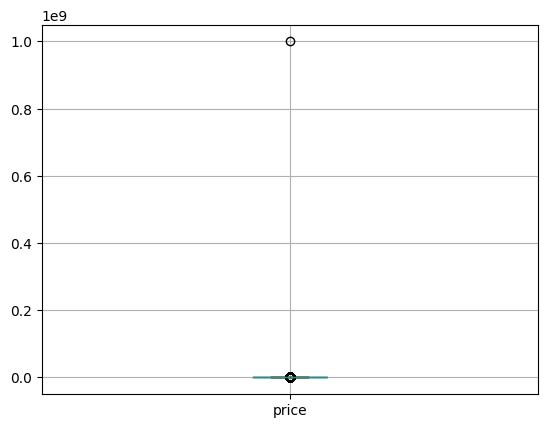

In [258]:
# Observamos que o veículo no valor de 1 bilhão é a maior inconsistência
cars_amos1.boxplot(column=['price'])
plt.show()

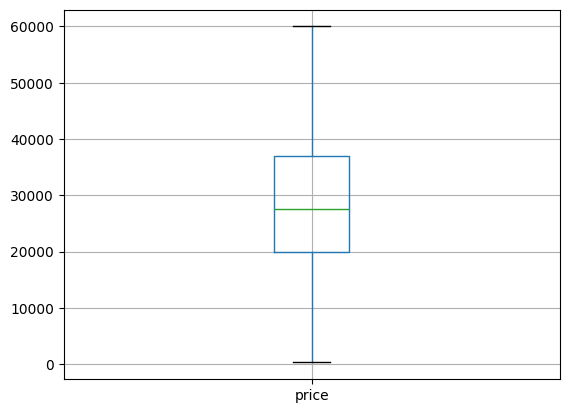

In [259]:
# Os valores sem outiliers em média estão até 60000
cars_amos1[cars_amos1['price'] <= 60000].boxplot(column='price')
plt.show()

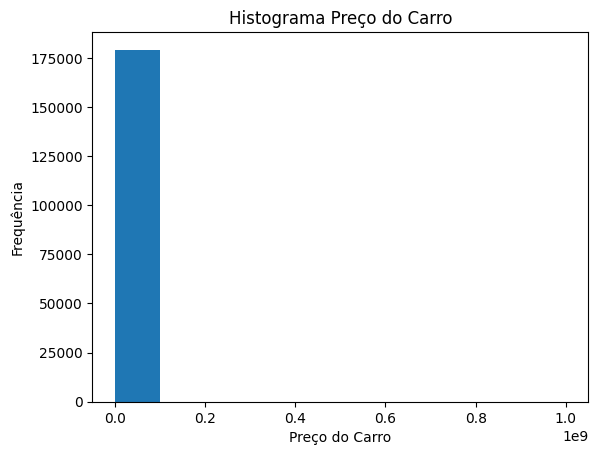

In [260]:
# Histograma ajuda a confirmar outliears
plt.hist(x=cars_amos1['price'])
plt.xlabel('Preço do Carro')
plt.ylabel('Frequência')
plt.title('Histograma Preço do Carro')
plt.show()

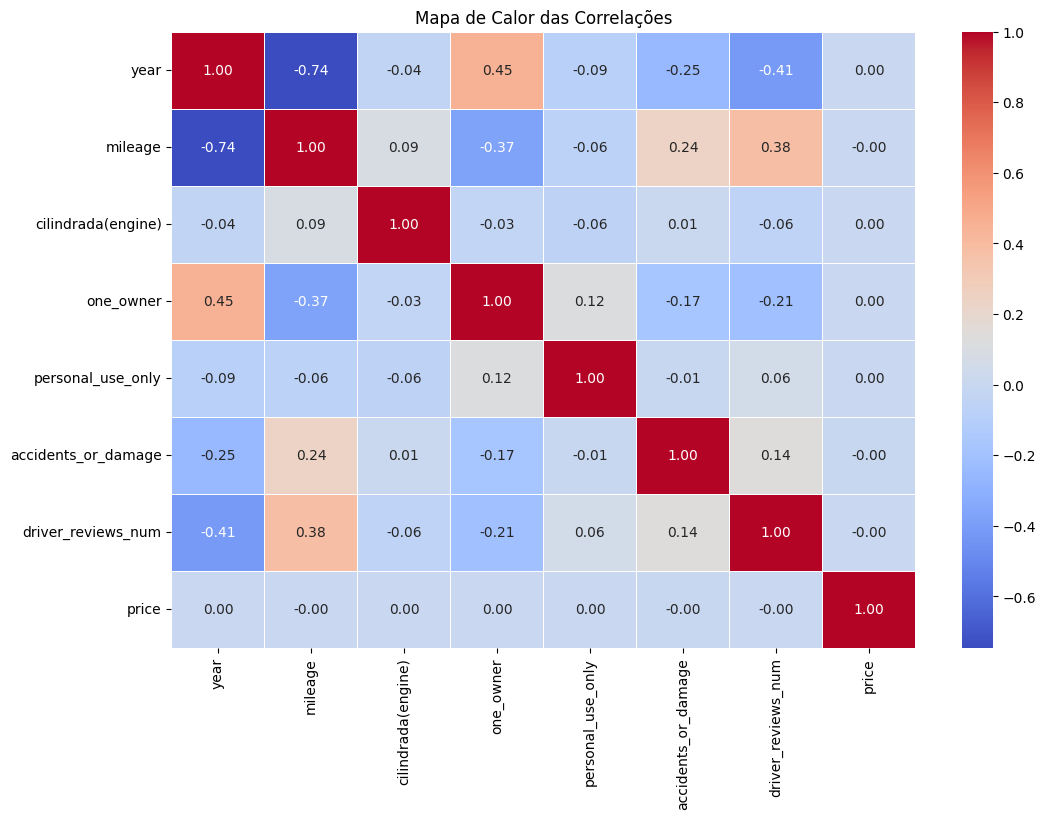

In [261]:
# Calcular a matriz de correlação
correlation_matrix = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'driver_reviews_num', 'price']].corr()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das Correlações')
plt.show()

In [262]:
# Este veículo é um outliear extremo
cars_amos1[cars_amos1['price'] == 1000000000]

manufacturer model  year   mileage  cilindrada(engine)  \
188260        dodge   suv  2018  113207.0                 3.0   

             transmission                     drivetrain fuel_type  \
188260  8-speed automatic  AWD (Tração nas quatro rodas)  gasoline   

       exterior_color interior_color  accidents_or_damage  one_owner  \
188260          black          black                  0.0        1.0   

        personal_use_only  driver_reviews_num         price  
188260                1.0               146.0  1.000000e+09

In [263]:
# Vou eliminar o outliear extremos de 1 bilhão 
# Criando um dataframe
price = cars_amos1[cars_amos1['price'] != 1000000000]

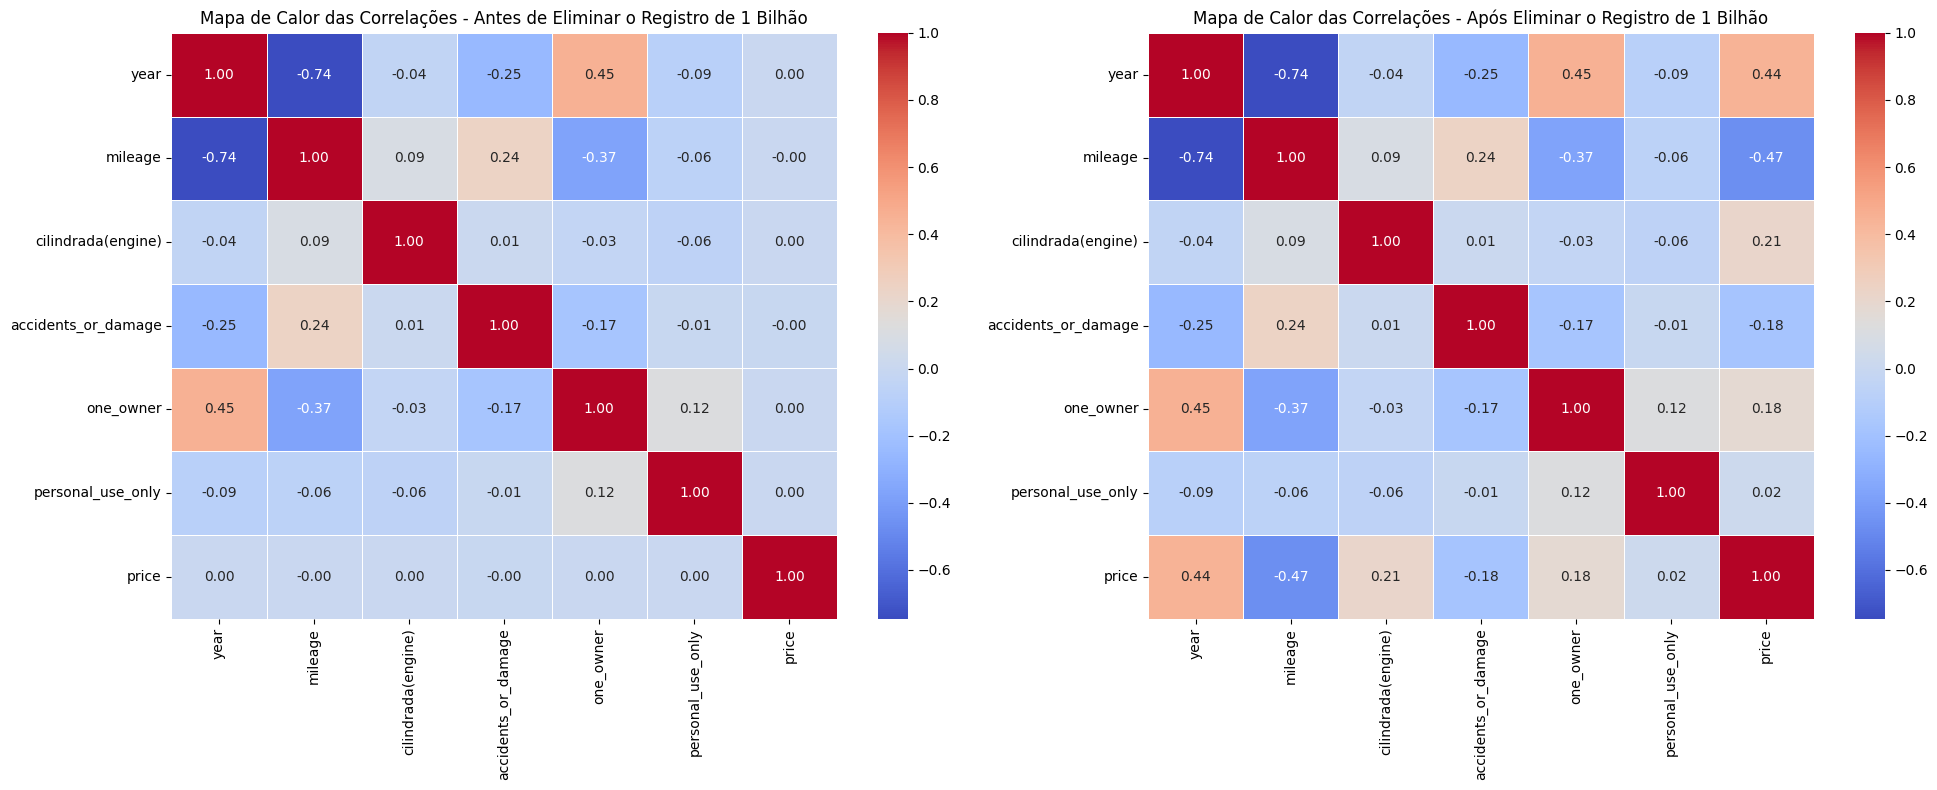

In [264]:
# A correlação com outliears trabalhado na coluna price aumentou significativamente depois de eliminar o registro de 1 bilhão
# Calcular a matriz de correlação antes e depois

correlation_matrix_before = cars_amos1[['year', 'mileage', 'cilindrada(engine)', 'accidents_or_damage', 
                                        'one_owner', 'personal_use_only', 'price']].corr()

correlation_matrix_after = price[['year', 'mileage', 'cilindrada(engine)', 'accidents_or_damage', 
                                           'one_owner', 'personal_use_only', 'price']].corr()
# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Eliminar o Registro de 1 Bilhão')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Eliminar o Registro de 1 Bilhão')

plt.tight_layout()
plt.show()

### Análise Tratamento de Outliears com Quartis

In [265]:
# Eliminando os extremos através do quartis
Q1 = cars_amos1['price'].quantile(0.25)
Q3 = cars_amos1['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

price_quartil = cars_amos1[(cars_amos1['price'] >= lower_bound) & (cars_amos1['price'] <= upper_bound)]

In [266]:
# Temos menos 10 mil registros agora
price_quartil.shape

(170144, 15)

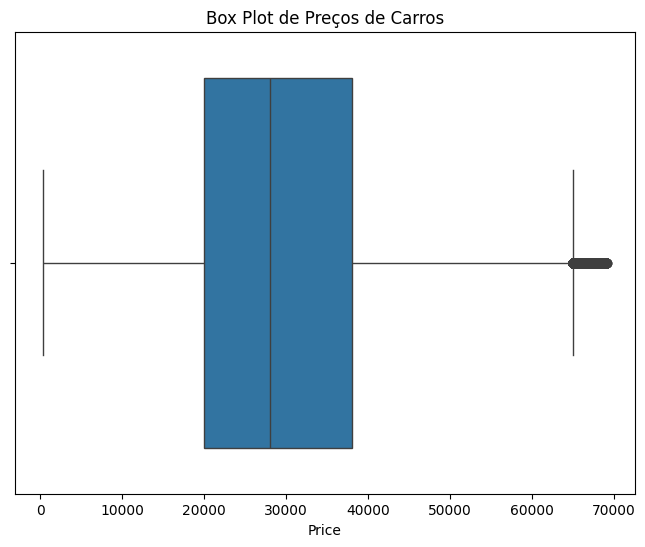

In [267]:
# Mesmo assim, ainda temos outliears
# Plotar o boxplot utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=price_quartil['price'])
plt.title('Box Plot de Preços de Carros')
plt.xlabel('Price')
plt.show()

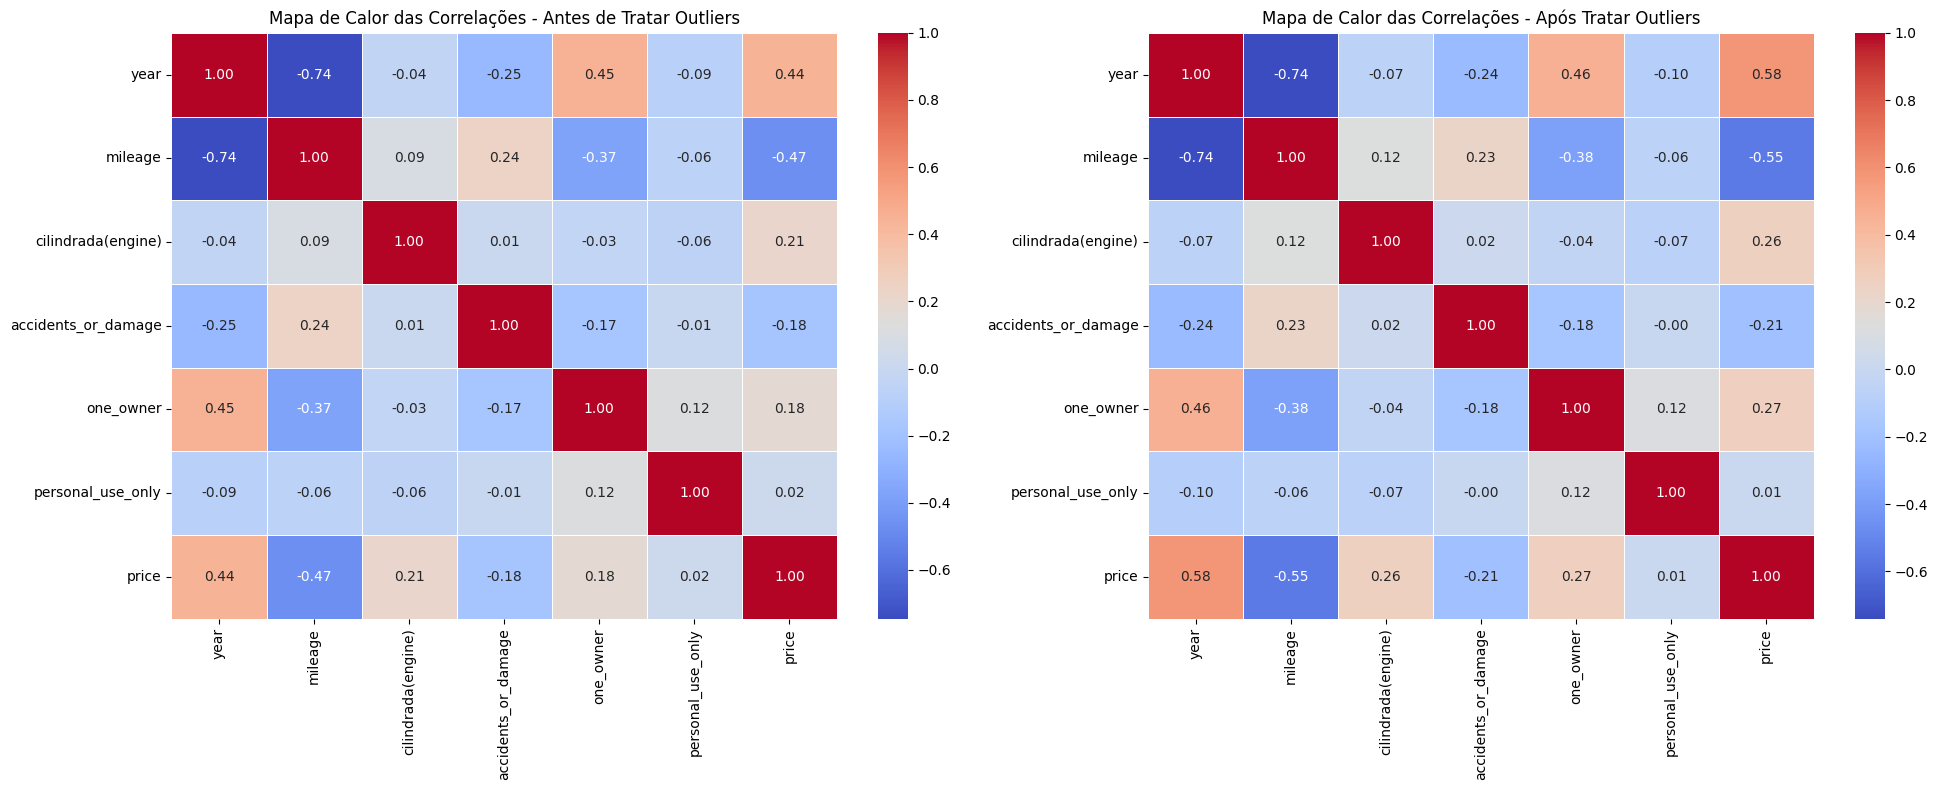

In [268]:
# A correlação com outliears trabalhado na coluna price aumentou um pouco mais após a eliminação de alguns outliears
# Calcular a matriz de correlação antes e depois

correlation_matrix_before = price[['year', 'mileage', 'cilindrada(engine)', 'accidents_or_damage', 
                                        'one_owner', 'personal_use_only', 'price']].corr()

correlation_matrix_after = price_quartil[['year', 'mileage', 'cilindrada(engine)', 'accidents_or_damage', 
                                           'one_owner', 'personal_use_only', 'price']].corr()
# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Outliers')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Outliers')

plt.tight_layout()
plt.show()

### Análise com Transformação Logarítmica

In [269]:
# Criar novo DataFrame com transformação logarítmica nos preços
# Utilizei o dataframe price por não conter o valor de 1 bilhão
df_cars = price.copy()
df_cars['price'] = np.log(price['price'])

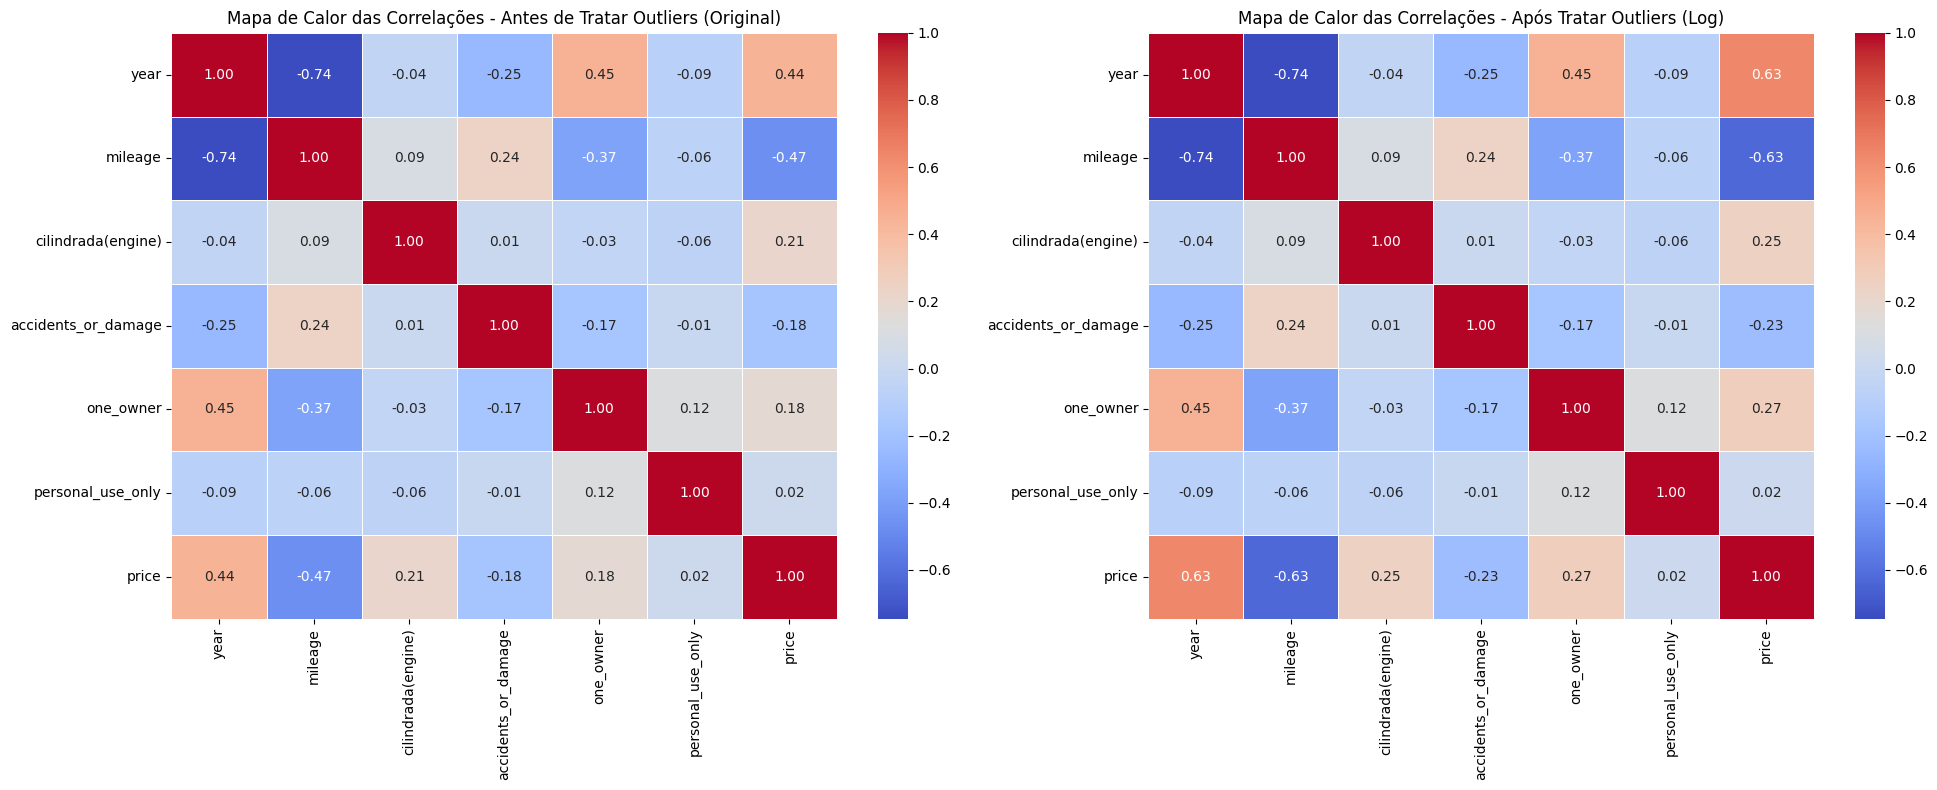

In [270]:
# Calcular a matriz de correlação antes e depois da transformação logarítmica
correlation_matrix_before = price[['year', 'mileage', 'cilindrada(engine)', 'accidents_or_damage', 
                                        'one_owner', 'personal_use_only', 'price']].corr()

correlation_matrix_after = df_cars[['year', 'mileage', 'cilindrada(engine)', 'accidents_or_damage', 
                                           'one_owner', 'personal_use_only', 'price']].corr()

# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes da transformação logarítmica
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Outliers (Original)')

# Plotar mapa de calor depois da transformação logarítmica
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Outliers (Log)')

plt.tight_layout()
plt.show()

Conclusão: Ao analisar a matriz de correlação entre as variáveis 'year', 'mileage', 'cilindrada(engine)', 'accidents_or_damage', 'one_owner', 'personal_use_only' e 'price', observamos algumas correlações importantes. 
- Existe uma forte correlação negativa entre 'year' e 'mileage', sugerindo que veículos mais antigos tendem a ter uma quilometragem mais alta.
- Variavel 'year' apresenta uma correlação moderada com 'price', indicando que veículos mais novos tendem a ter preços mais altos
- Variavel 'mileage' mostra uma forte correlação negativa com 'price', o que significa que veículos com maior quilometragem tendem a ter preços mais baixos.

## Testando Variáveis seller_rating/driver_rating/driver_reviews usando Média Ponderada

In [271]:
# Pensei nesse procedimento depois de ter realizado todas as alterações
# Vamos separar o melhor resultado de correlação dessas variaveis e concatenar com o ultimo dataframe
driver_rating = driver_rating[['driver_rating']]
seller_rating = zero_seller_rating[['seller_rating']]
test_rating = df_cars.copy()

In [272]:
# Concatenar os dataframes ao longo das colunas (axis=1)
combined_df = pd.concat([driver_rating, seller_rating, test_rating], axis=1)

In [273]:
# Surgiu alguns valores nulos 
combined_df.isnull().sum()

driver_rating          0
seller_rating          0
manufacturer           1
model                  1
year                   1
mileage                1
cilindrada(engine)     1
transmission           1
drivetrain             1
fuel_type              1
exterior_color         1
interior_color         1
accidents_or_damage    1
one_owner              1
personal_use_only      1
driver_reviews_num     1
price                  1
dtype: int64

In [274]:
# Vamos excluir esse index
combined_df[pd.isna(combined_df['manufacturer'])]

driver_rating  seller_rating manufacturer model  year  mileage  \
188260            4.8            4.6          NaN   NaN   NaN      NaN   

        cilindrada(engine) transmission drivetrain fuel_type exterior_color  \
188260                 NaN          NaN        NaN       NaN            NaN   

       interior_color  accidents_or_damage  one_owner  personal_use_only  \
188260            NaN                  NaN        NaN                NaN   

        driver_reviews_num  price  
188260                 NaN    NaN

In [275]:
# Excluindo a linha
combined_df = combined_df.dropna(subset=['manufacturer'])
# Não temos valores nulos
combined_df.isnull().sum()

driver_rating          0
seller_rating          0
manufacturer           0
model                  0
year                   0
mileage                0
cilindrada(engine)     0
transmission           0
drivetrain             0
fuel_type              0
exterior_color         0
interior_color         0
accidents_or_damage    0
one_owner              0
personal_use_only      0
driver_reviews_num     0
price                  0
dtype: int64

In [276]:
# Vamos criar um novo dataframe para comparar as correlações
cars = combined_df.copy()

# Definindo os pesos para cada coluna
weight_seller = 1
weight_driver = 1
weight_reviews = 1

# Calculando a média ponderada
cars['combined_rating'] = (cars['seller_rating'] * weight_seller +
                           cars['driver_rating'] * weight_driver +
                           cars['driver_reviews_num'] * weight_reviews) / (weight_seller + weight_driver + weight_reviews)


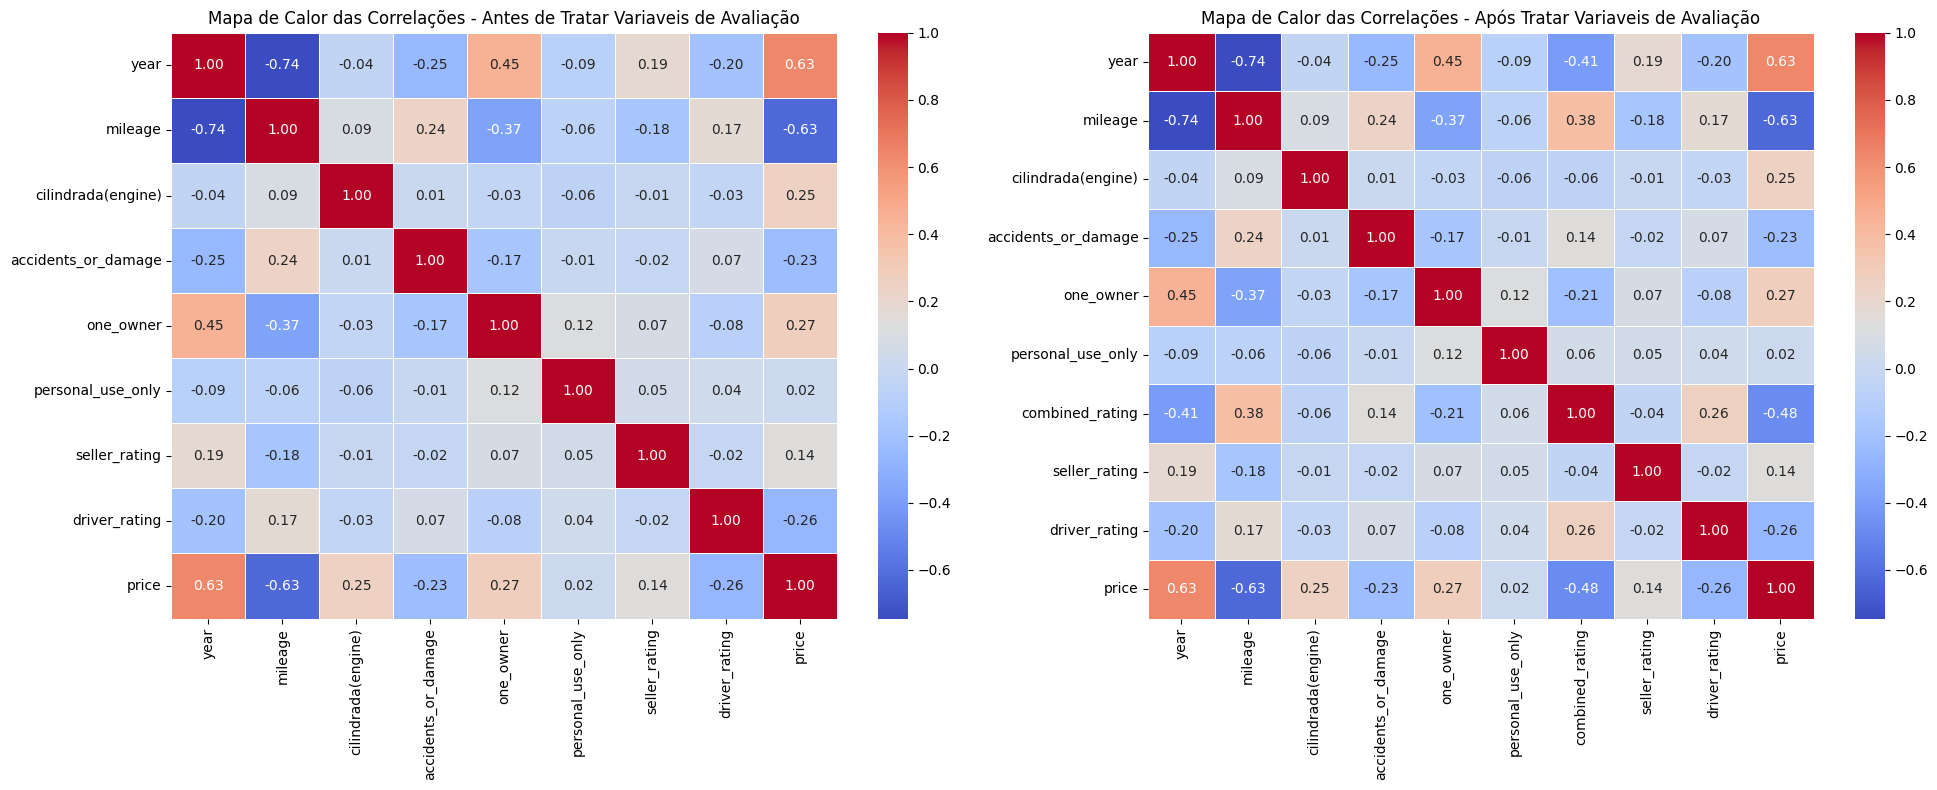

In [277]:
# A variavel criada tem uma boa correlação com as demais variaveis, podemos mantê-la e excluir as outras
# Calcular a matriz de correlação antes e depois

correlation_matrix_before = combined_df[['year', 'mileage', 'cilindrada(engine)', 'accidents_or_damage', 
                                        'one_owner', 'personal_use_only', 'seller_rating',
                                        'driver_rating', 'price']].corr()

correlation_matrix_after = cars[['year', 'mileage', 'cilindrada(engine)', 'accidents_or_damage', 
                                        'one_owner', 'personal_use_only', 'combined_rating', 'seller_rating',
                                        'driver_rating', 'price']].corr()
# Configurar a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotar mapa de calor antes
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Mapa de Calor das Correlações - Antes de Tratar Variaveis de Avaliação')

# Plotar mapa de calor depois
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Mapa de Calor das Correlações - Após Tratar Variaveis de Avaliação')

plt.tight_layout()
plt.show()

Conclusão:
- Embora a média ponderada com essas variaveis tenha obtido uma correlação melhor, existe a possibilidade de multicolinearidade entre as colunas year, mileage e combined_rating por possuirem uma correlação boa entre elas e a variavel price, portanto, vou manter o dataframe anterior, sem essas variaveis.

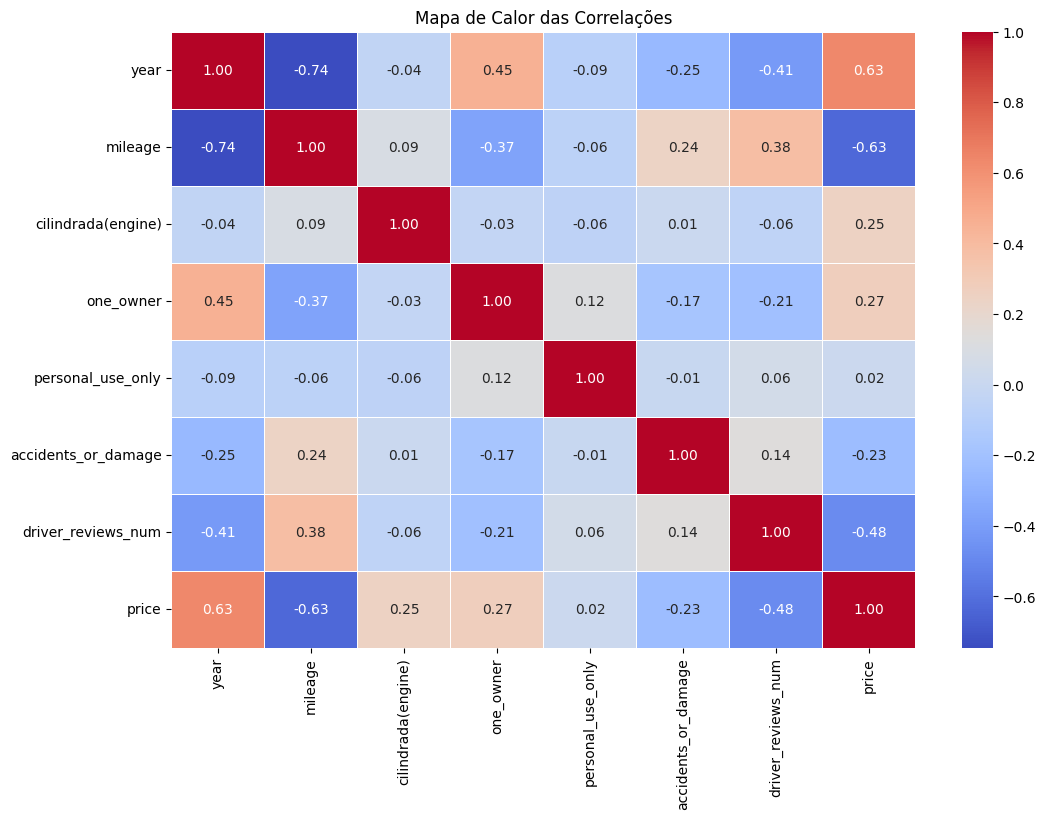

In [278]:
# Calcular a matriz de correlação
correlation_matrix = df_cars[['year', 'mileage', 'cilindrada(engine)', 'one_owner', 'personal_use_only',
                                 'accidents_or_damage', 'driver_reviews_num', 'price']].corr()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das Correlações')
plt.show()

In [279]:
# Vamos excluir a coluna personal_use_only, pois tem uma correlação fraca com as demais avariaveis 
df_cars = df_cars.drop('personal_use_only', axis=1)

In [280]:
# Teremos que dividir esse notebook em duas partes, a próxima parte será com a regressão
# O motivo é que esse notebook excedeu o limite dos dados do GIT
df_cars.to_csv('cars_analisado.csv', index=False)  # index=False para não salvar o índice do DataFrame